In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from datetime import datetime
import collections
import csv
import os.path
import json
import mplcyberpunk

In [2]:
with open('../data_processing/yearsTopKDO.json', 'r', encoding='utf8') as dejanjaVObcinah:
    dejanjaVObcinahPoLetih = json.load(dejanjaVObcinah)

with open('../data_processing/yearsTopKDPU.json', 'r', encoding='utf8') as dejanjaVPU:
    dejanjaVPUPoLetih = json.load(dejanjaVPU)

with open('../data/kazni_dict.json', 'r', encoding='utf8') as kazni:
    kazni_dict = json.load(kazni)


In [3]:
kds = []
for kd in kazni_dict:
    kds.append(kd)


In [4]:
mostDangerousObcine50 = ['Novo mesto', 'Ljubljana', 'Grosuplje', 'Murska sobota', 'Domžale',
'Trebnje', 'Mozirje', 'Pesnica', 'Lenart', 'Kočevje', 'Piran', 'Ptuj', 'Maribor', 'Nova gorica',
'Sežana', 'Gornja radgona', 'Celje', 'Radovljica', 'Šmarje pri jelšah', 'Žalec', 'Črnomelj',
'Postojna', 'Koper', 'Lendava', 'Krško', 'Kranj', 'Slovenske konjice', 'Velenje', 'Jesenice',
'Slovenska bistrica', 'Kamnik', 'Vrhnika', 'Metlika', 'Logatec', 'Ravne na koroškem', 'Laško',
'Izola', 'Ribnica', 'Tolmin', 'Litija', 'Ruše', 'Radlje ob dravi', 'Brežice', 'Ajdovščina', 'Ljutomer',
'Škofja loka', 'Trbovlje', 'Idrija', 'Slovenj gradec', 'Cerknica', 'Sevnica', 'Šentjur', 'Hrastnik',
'Zagorje ob savi', 'Ormož', 'Tržič', 'Dravograd', 'Ilirska bistrica', 'Radenci', 'Mislinja', 'Kanal ob soči',
'Šmartno ob paki', 'Prevalje', 'Ivančna gorica', 'Kuzma', 'Ig', 'Rečica ob savinji', 'Hrpelje - kozina',
'Šentrupert', 'Juršinci', 'Jezersko', 'Šmartno pri litiji', 'Žiri', 'Šentjernej', 'Sveti tomaž', 'Šmarješke toplice',
'Bovec', 'Hodoš', 'Hoče - slivnica', 'Horjul', 'Kidričevo', 'Šoštanj', 'Gornji grad', 'Žetale', 'Škocjan', 'Vodice',
'Kostel', 'Kranjska gora', 'Škofljica', 'Odranci', 'Komen', 'Šenčur', 'Kobarid', 'Grad', 'Kozje', 'Borovnica',
'Brezovica', 'Kostanjevica na krki', 'Komenda', 'Šentilj', 'Bohinj', 'Kobilje', 'Brda', 'Križevci', 'Gorje',
'Hajdina', 'Gornji petrovci', 'Braslovče', 'Žužemberk', 'Beltinci', 'Apače', 'Ankaran', 'Cerklje na gorenjskem',
'Cerkno', 'Cerkvenjak', 'Cirkulane', 'Šalovci', 'Gorišnica', 'Gorenja vas - poljane', 'Duplek', 'Dornava', 'Železniki',
'Dolenjske toplice', 'Dol pri ljubljani', 'Dobrovnik', 'Dobrova - polhov gradec', 'Dobrna', 'Dobrepolje', 'Dobje',
'Divača', 'Destrnik', 'Prebold', 'Bistrica ob sotli', 'Preddvor', 'Sveta ana', 'Črenšovci', 'Renče - vogrsko',
'Rače - fram', 'Razkrižje', 'Velika polana', 'Velike lašče', 'Radeče', 'Puconci', 'Ribnica na pohorju',
'Veržej', 'Benedikt', 'Šempeter - vrtojba', 'Sveta trojica v slovenskih goricah', 'Videm', 'Polzela',
'Poljčane', 'Turnišče', 'Rogatec', 'Podvelka', 'Solčava', 'Sveti jurij ob ščavnici',
'Sveti andraž v slovenskih goricah', 'Črna na koroškem', 'Štore', 'Bloke', 'Kungota', 'Lovrenc na pohorju',
'Sodražica', 'Rogaška slatina', 'Tabor', 'Tišina', 'Trnovska vas', 'Trzin', 'Semič', 'Selnica ob dravi',
'Rogašovci', 'Podčetrtek', 'Podlehnik', 'Ljubno', 'Majšperk', 'Mežica', 'Vuzenica', 'Mengeš', 'Medvode', 'Markovci',
'Zavrč', 'Makole', 'Luče', 'Miren - kostanjevica', 'Bled', 'Oplotnica', 'Starše', 'Zreče', 'Loški potok', 'Log - dragomer',
'Sveti jurij v slovenskih goricah', 'Miklavž na dravskem polju', 'Mirna', 'Pivka', 'Nazarje', 'Vipava', 'Vitanje',
'Osilnica', 'Središče ob dravi', 'Lukovica', 'Straža', 'Vojnik', 'Naklo', 'Mirna peč', 'Muta', 'Vransko', 'Žirovnica',
'Moravče', 'Moravske toplice', 'Mokronog - trebelno', 'Loška dolina', 'Cankova']

dangerousnessOfObcine50  = [1.04449, 1.04184, 0.88313, 0.85427, 0.81167, 0.74026, 0.72999, 0.71907, 0.71296,
0.70621, 0.69713, 0.69058, 0.68047, 0.67319, 0.66395, 0.65817, 0.65036, 0.59059, 0.58357, 0.57562, 0.55813,
0.53335, 0.52574, 0.50779, 0.50155, 0.49197, 0.47033, 0.4676, 0.4328, 0.41581, 0.41446, 0.41018, 0.38797,
0.38191, 0.37735, 0.37406, 0.36101, 0.35038, 0.34655, 0.33513, 0.3343, 0.32756, 0.31358, 0.30791, 0.27966,
0.25228, 0.24677, 0.24641, 0.23637, 0.23162, 0.22747, 0.22485, 0.18332, 0.18123, 0.17378, 0.16699, 0.16387,
0.15777, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
0.0, 0.0]

mostDangerousObcine50lower = [x.lower() for x in mostDangerousObcine50]

obc_prebivalci = {'ajdovščina': 19418, 'ankaran': 3224, 'apače': 3533, 'beltinci': 8059, 'benedikt': 2615,
'bistrica ob sotli': 1336, 'bled': 7868, 'bloke': 1563, 'bohinj': 5145, 'borovnica': 4579, 'bovec': 3073,
'braslovče': 5629, 'brda': 5619, 'brezovica': 12671, 'brežice': 24051, 'cankova': 1734, 'celje': 49540,
'cerklje na gorenjskem': 7769, 'cerknica': 11580, 'cerkno': 4547, 'cerkvenjak': 2083, 'cirkulane': 2345,
'črenšovci': 3968, 'črna na koroškem': 3285, 'črnomelj': 14241, 'destrnik': 2643, 'divača': 4213, 'dobje': 949,
'dobrepolje': 3878, 'dobrna': 2234, 'dobrova - polhov gradec': 7800, 'dobrovnik': 1281, 'dol pri ljubljani': 6310,
'dolenjske toplice': 3553, 'domžale': 36675, 'dornava': 2902, 'dravograd': 8884, 'duplek': 6996,
'gorenja vas - poljane': 7557, 'gorišnica': 4112, 'gorje': 2738, 'gornja radgona': 8417, 'gornji grad': 2474,
'gornji petrovci': 1995, 'grad': 2042, 'grosuplje': 21314, 'hajdina': 3879, 'hoče - slivnica': 11753,
'hodoš': 353, 'horjul': 3024, 'hrastnik': 9113, 'hrpelje - kozina': 4604, 'idrija': 11811, 'ig': 7617,
'ilirska bistrica': 13297, 'ivančna gorica': 17008, 'izola': 16487, 'jesenice': 21340, 'jezersko': 625,
'juršinci': 2380, 'kamnik': 29925, 'kanal ob soči': 5291, 'kidričevo': 6619, 'kobarid': 4208, 'kobilje': 612,
'kočevje': 16627, 'komen': 3489, 'komenda': 5082, 'koper': 52630, 'kostanjevica na krki': 2413, 'kostel': 647,
'kozje': 3245, 'kranj': 54188, 'kranjska gora': 5309, 'križevci': 3750, 'krško': 25600, 'kungota': 4713,
'kuzma': 1571, 'laško': 13701, 'lenart': 7862, 'lendava': 11157, 'litija': 14529, 'ljubljana': 276091,
'ljubno': 2644, 'ljutomer': 11845, 'log - dragomer': 3538, 'logatec': 12757, 'loška dolina': 3809,
'loški potok': 1954, 'lovrenc na pohorju': 3120, 'luče': 1535, 'lukovica': 5365, 'majšperk': 4045,
'makole': 2089, 'maribor': 113113, 'markovci': 3973, 'medvode': 15068, 'mengeš': 7307, 'metlika': 8379,
'mežica': 3704, 'miklavž na dravskem polju': 6240, 'miren - kostanjevica': 4843, 'mirna': 2573,
'mirna peč': 2779, 'mislinja': 4703, 'mokronog - trebelno': 2892, 'moravče': 4832, 'moravske toplice': 6014,
'mozirje': 4063, 'murska sobota': 19433, 'muta': 3528, 'naklo': 5164, 'nazarje': 2567, 'nova gorica': 31911,
'novo mesto': 35570, 'odranci': 1674, 'oplotnica': 3918, 'ormož': 12519, 'osilnica': 404, 'pesnica': 7549,
'piran': 17338, 'pivka': 5966, 'podčetrtek': 3276, 'podlehnik': 1892, 'podvelka': 2604, 'poljčane': 4525,
'polzela': 5872, 'postojna': 15455, 'prebold': 4599, 'preddvor': 3477, 'prevalje': 6741, 'ptuj': 23699,
'puconci': 6128, 'rače - fram': 6528, 'radeče': 4522, 'radenci': 5196, 'radlje ob dravi': 6162,
'radovljica': 18698, 'ravne na koroškem': 11722, 'razkrižje': 1344, 'rečica ob savinji': 2287,
'renče - vogrsko': 4229, 'ribnica': 9305, 'ribnica na pohorju': 1228, 'rogaška slatina': 11093, 'rogašovci': 3240,
'rogatec': 3155, 'ruše': 7417, 'selnica ob dravi': 4563, 'semič': 3789, 'sevnica': 17649, 'sežana': 12682,
'slovenj gradec': 16662, 'slovenska bistrica': 24462, 'slovenske konjice': 14346, 'sodražica': 2148, 'solčava': 505,
'središče ob dravi': 2142, 'starše': 4093, 'straža': 3861, 'sveta ana': 2368,
'sveta trojica v slovenskih goricah': 2197, 'sveti andraž v slovenskih goricah': 1207,
'sveti jurij ob ščavnici': 2869, 'sveti jurij v slovenskih goricah': 2114, 'sveti tomaž': 2073,
'šalovci': 1602, 'šempeter - vrtojba': 6339, 'šenčur': 8250, 'šentilj': 8426, 'šentjernej': 6694,
'šentjur': 18787, 'šentrupert': 2807, 'škocjan': 3177, 'škofja loka': 22667, 'škofljica': 8413,
'šmarje pri jelšah': 9946, 'šmarješke toplice': 3164, 'šmartno pri litiji': 5419, 'šmartno ob paki': 3116,
'šoštanj': 8420, 'štore': 4060, 'tabor': 1510, 'tišina': 4143, 'tolmin': 11730, 'trbovlje': 17545,
'trebnje': 14371, 'trnovska vas': 1312, 'trzin': 3682, 'tržič': 15329, 'turnišče': 3380, 'velenje': 33226,
'velika polana': 1483, 'velike lašče': 4110, 'veržej': 1308, 'videm': 5565, 'vipava': 5282, 'vitanje': 2288,
'vodice': 4425, 'vojnik': 8287, 'vransko': 2546, 'vrhnika': 15870, 'vuzenica': 2748, 'zagorje ob savi': 17098,
'zavrč': 1519, 'zreče': 6492, 'žalec': 21210, 'železniki': 6773, 'žetale': 1326, 'žiri': 4904, 'žirovnica': 4071,
'žužemberk': 4579}

In [5]:
from itertools import product
def getCombinations(number):
    lst = ['č', 'š', 'ž']
    return [''.join(x) for x in product(lst, repeat = number)]


def correctWord(deformedWord, correctWords):
    i = 0
    options = []
    word = deformedWord.lower()
    n = word.count('�')
    if n > 0:
        for combination in getCombinations(n):
            cnt = 0
            newWord = ""
            for char in word:
                if char == '�':
                    char = combination[cnt]
                    cnt += 1
                newWord += char
            options.append(newWord)
        i += 1
    names = [name for name in options if name in correctWords]
    return names[0].capitalize() if len(names) > 0 else None

In [36]:
#correct the names for obcinas and kds
dejanjaVObcinahPoLetihC = []
for year in dejanjaVObcinahPoLetih:
    yearC = {}
    for obcina in year:
        newObcina = correctWord(obcina, mostDangerousObcine50lower)
        if newObcina is not None:
            np_dejanja = []
            cnt = 0
            for dejanje in year[obcina]:
                correctedDejanje = correctWord(dejanje[0], kds)
                deed =  correctedDejanje if correctedDejanje != None else dejanje[0].lower()
                if cnt < 11:
                    np_dejanja.append(np.array([deed , (dejanje[1]/obc_prebivalci[newObcina.lower()])]))
                    cnt += 1
            np_dejanja = np.array(np_dejanja)
            yearC[newObcina] = np_dejanja
    dejanjaVObcinahPoLetihC.append(yearC)
print(dejanjaVObcinahPoLetihC)

[{'Žalec': array([['Neupravičena proizvodnja in promet s prepovedanimi drogami, nedovoljenimi snovmi v športu in predhod',
        '0.002215935879302216'],
       ['ponarejanje listin', '0.0017916077322017916'],
       ['goljufija', '0.001272984441301273'],
       ['zanemarjanje mladoletne osebe in surovo ravnanje',
        '0.0012258368694012258'],
       ['Grožnja', '0.0010843941537010844'],
       ['Nasilje v družini', '0.000942951438000943'],
       ['Ponareditev ali uničenje poslovnih listin',
        '0.0007543611504007544'],
       ['velika tatvina', '0.0005657708628005657'],
       ['Lahka telesna poškodba', '0.0005657708628005657'],
       ['Kršitev temeljnih pravic delavcev', '0.0004243281471004243'],
       ['Poškodovanje tuje stvari', '0.00033003300330033004']],
      dtype='<U100'), 'Ravne na koroškem': array([['zanemarjanje mladoletne osebe in surovo ravnanje',
        '0.002218051527043167'],
       ['ponarejanje listin', '0.002047432178809077'],
       ['Nasilje v druži

In [63]:
from matplotlib.ticker import FormatStrFormatter
def plotDejanjaVObcinah(dejanjaVObcinah, obcina, year, title):
    plt.style.use("cyberpunk")
    dejanjaVObcinah = dejanjaVObcinah[np.argsort(dejanjaVObcinah[:, 1])[::-1]]

    x_axis = dejanjaVObcinah[:, 1]
    y_axis = dejanjaVObcinah[:, 0]


    # create graph of dangerousness of cities
    fig, ax = plt.subplots(figsize=(30, 15))
    string = title + " " + obcina + " leta " + str(year)

    plt.title(string, fontsize=20)
    plt.xlabel("Količina pojavitev kriminalnega dejanja", fontsize=15, labelpad=10)
    plt.ylabel("Občine", fontsize=15, labelpad=5)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(20)
    yticks = ax.yaxis.get_major_ticks()
    yticks[0].set_visible(False)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    plt.xlim(0, 10)
    plt.barh(y_axis[:20], x_axis[:20], color='#08F7FE')
    plt.show()

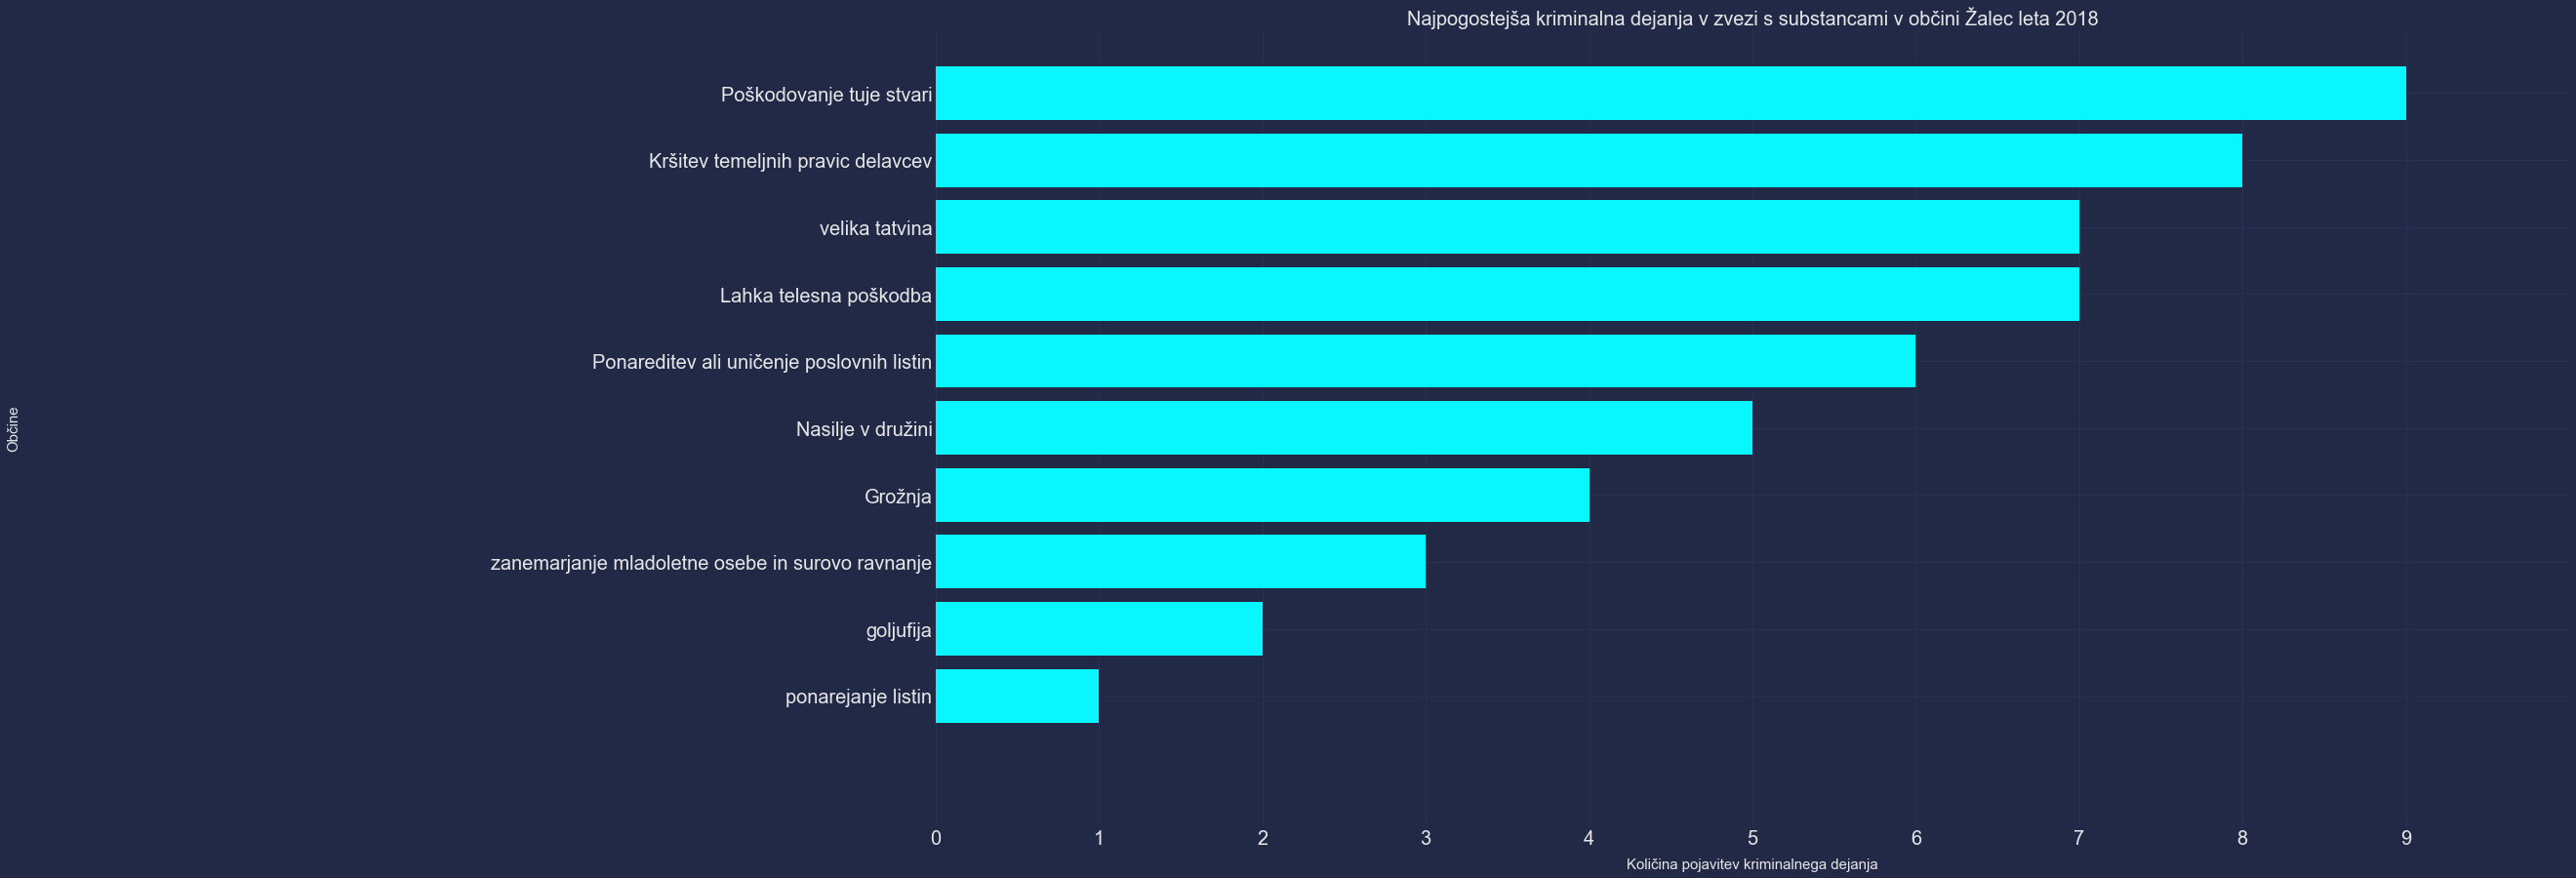

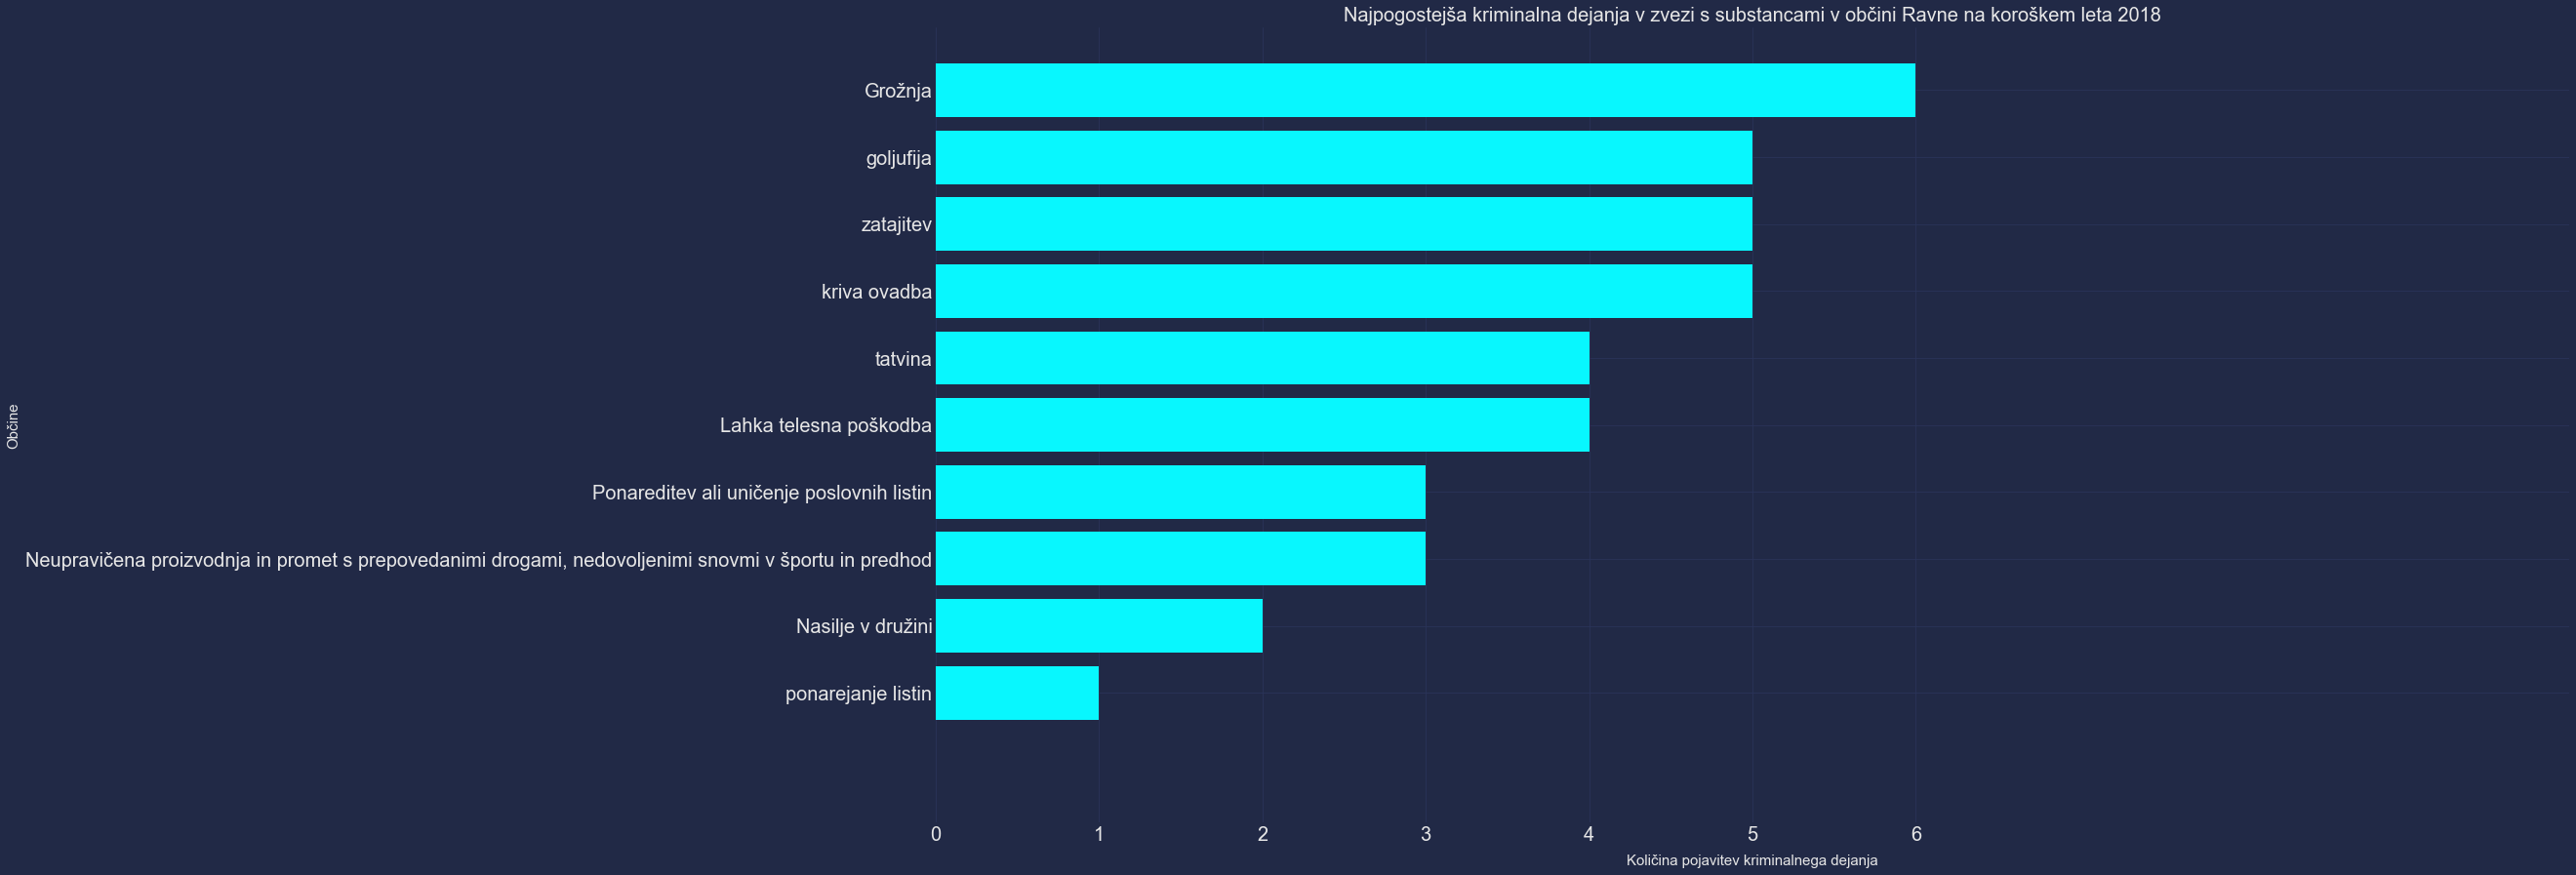

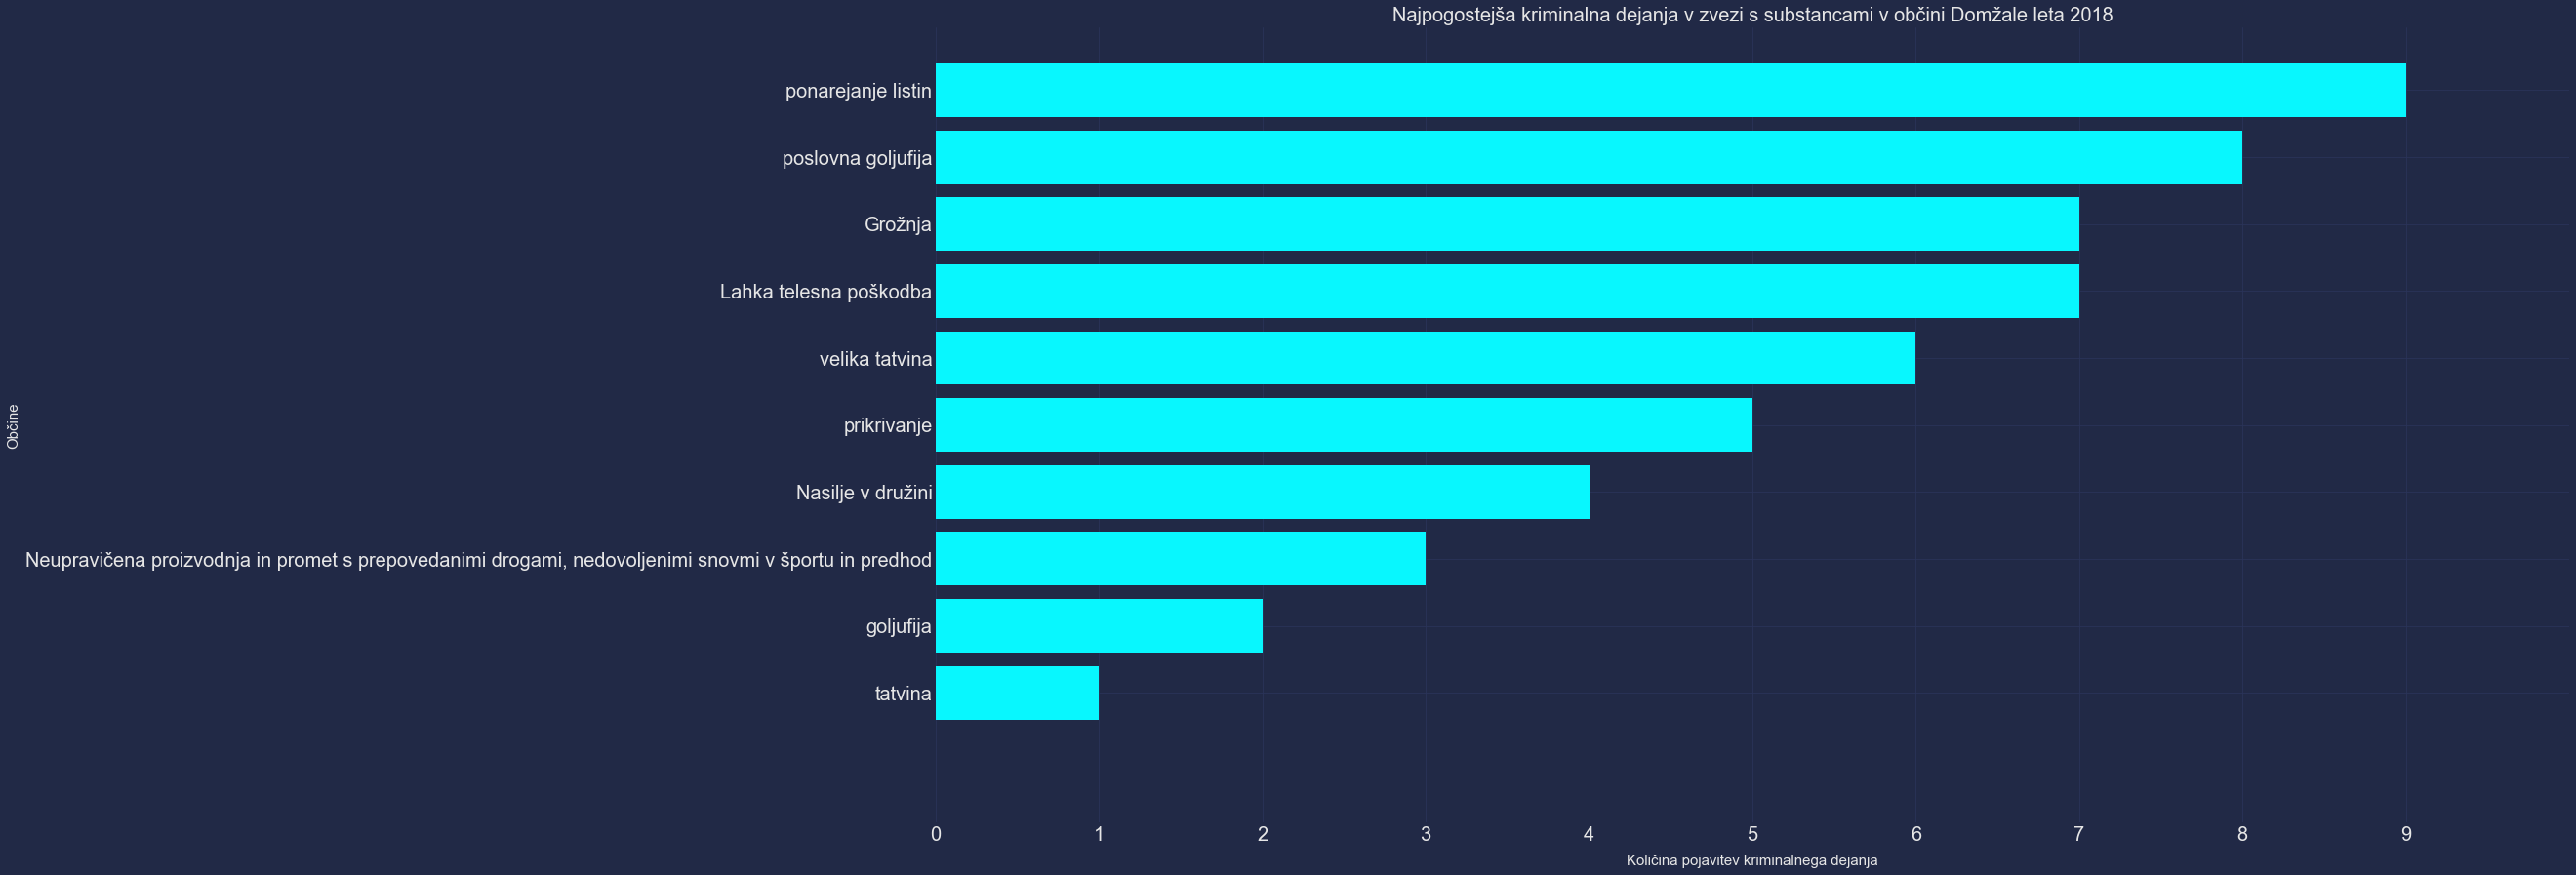

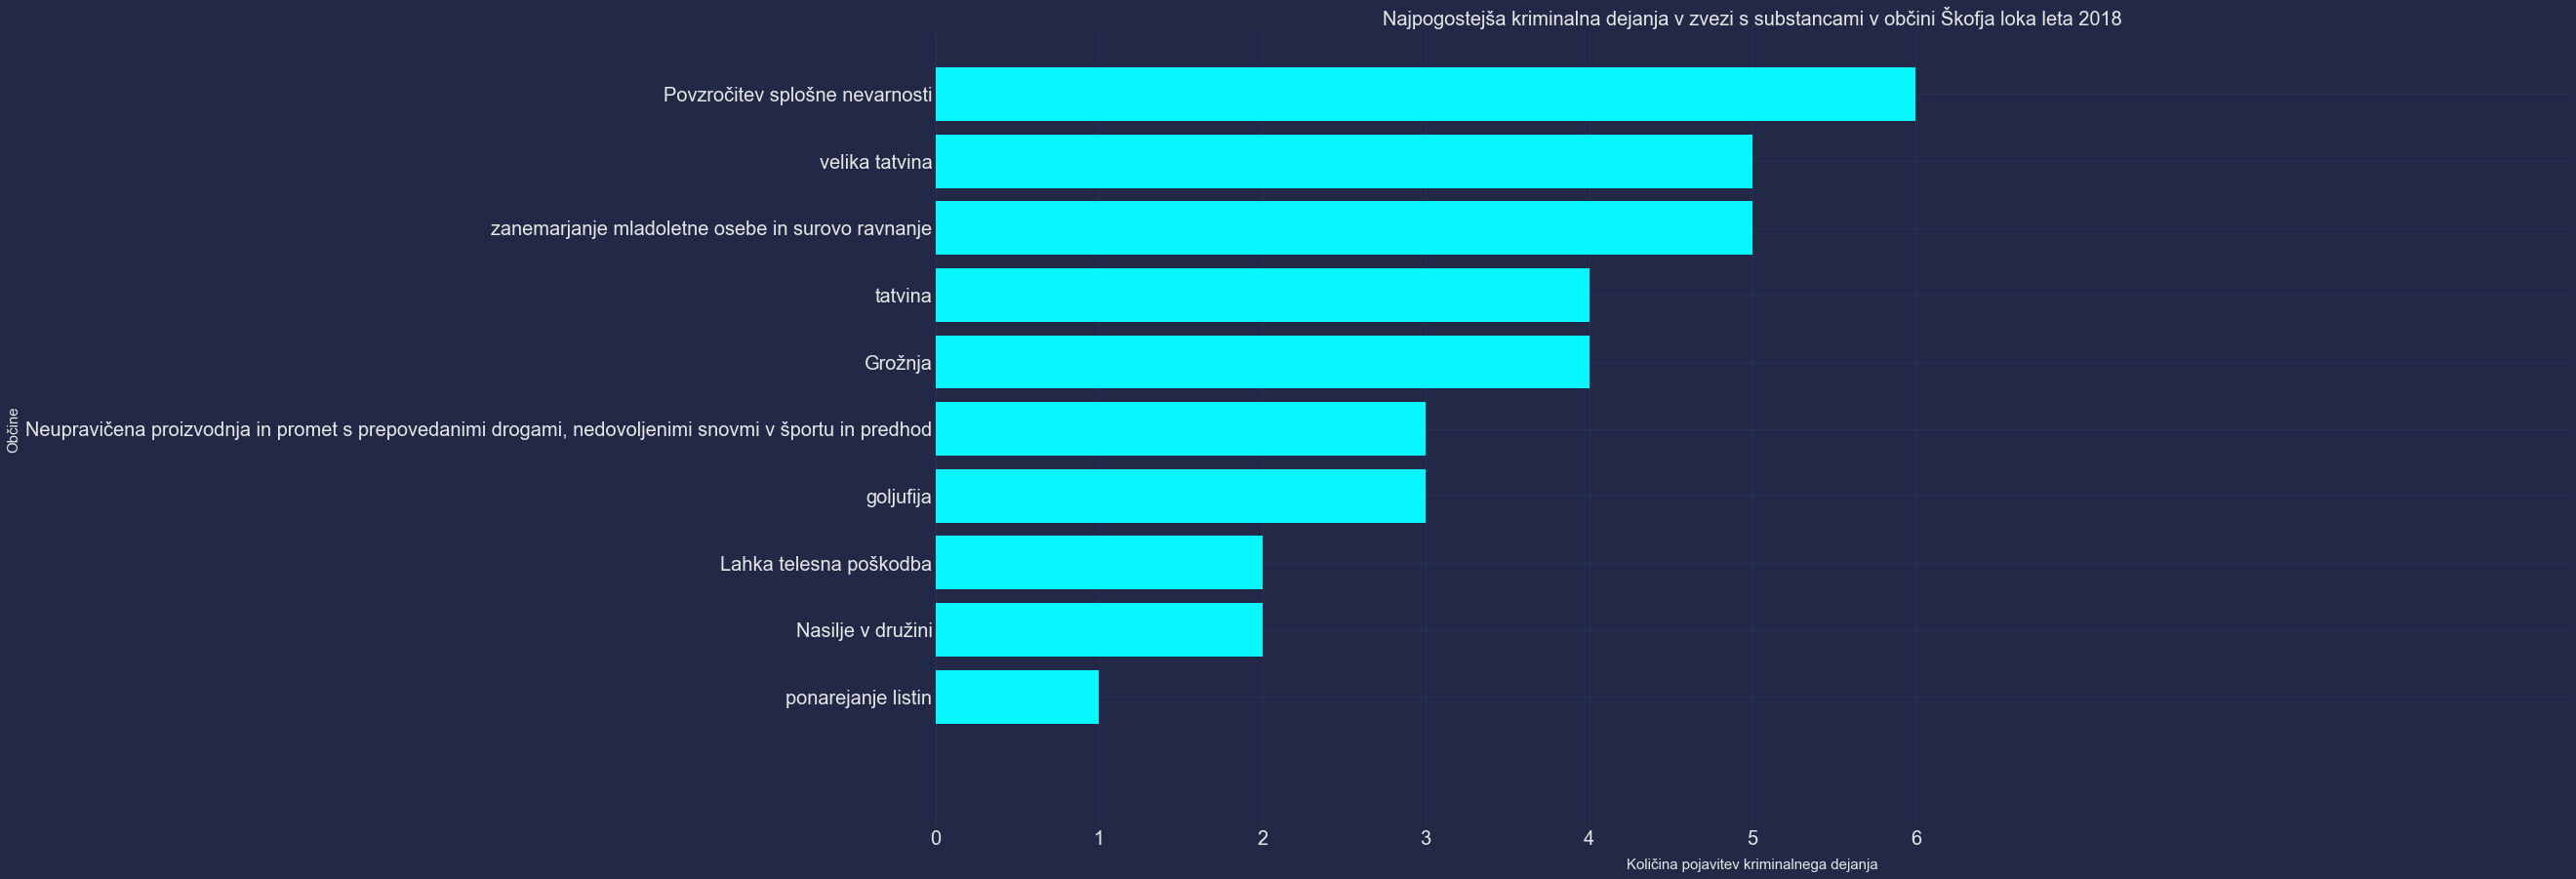

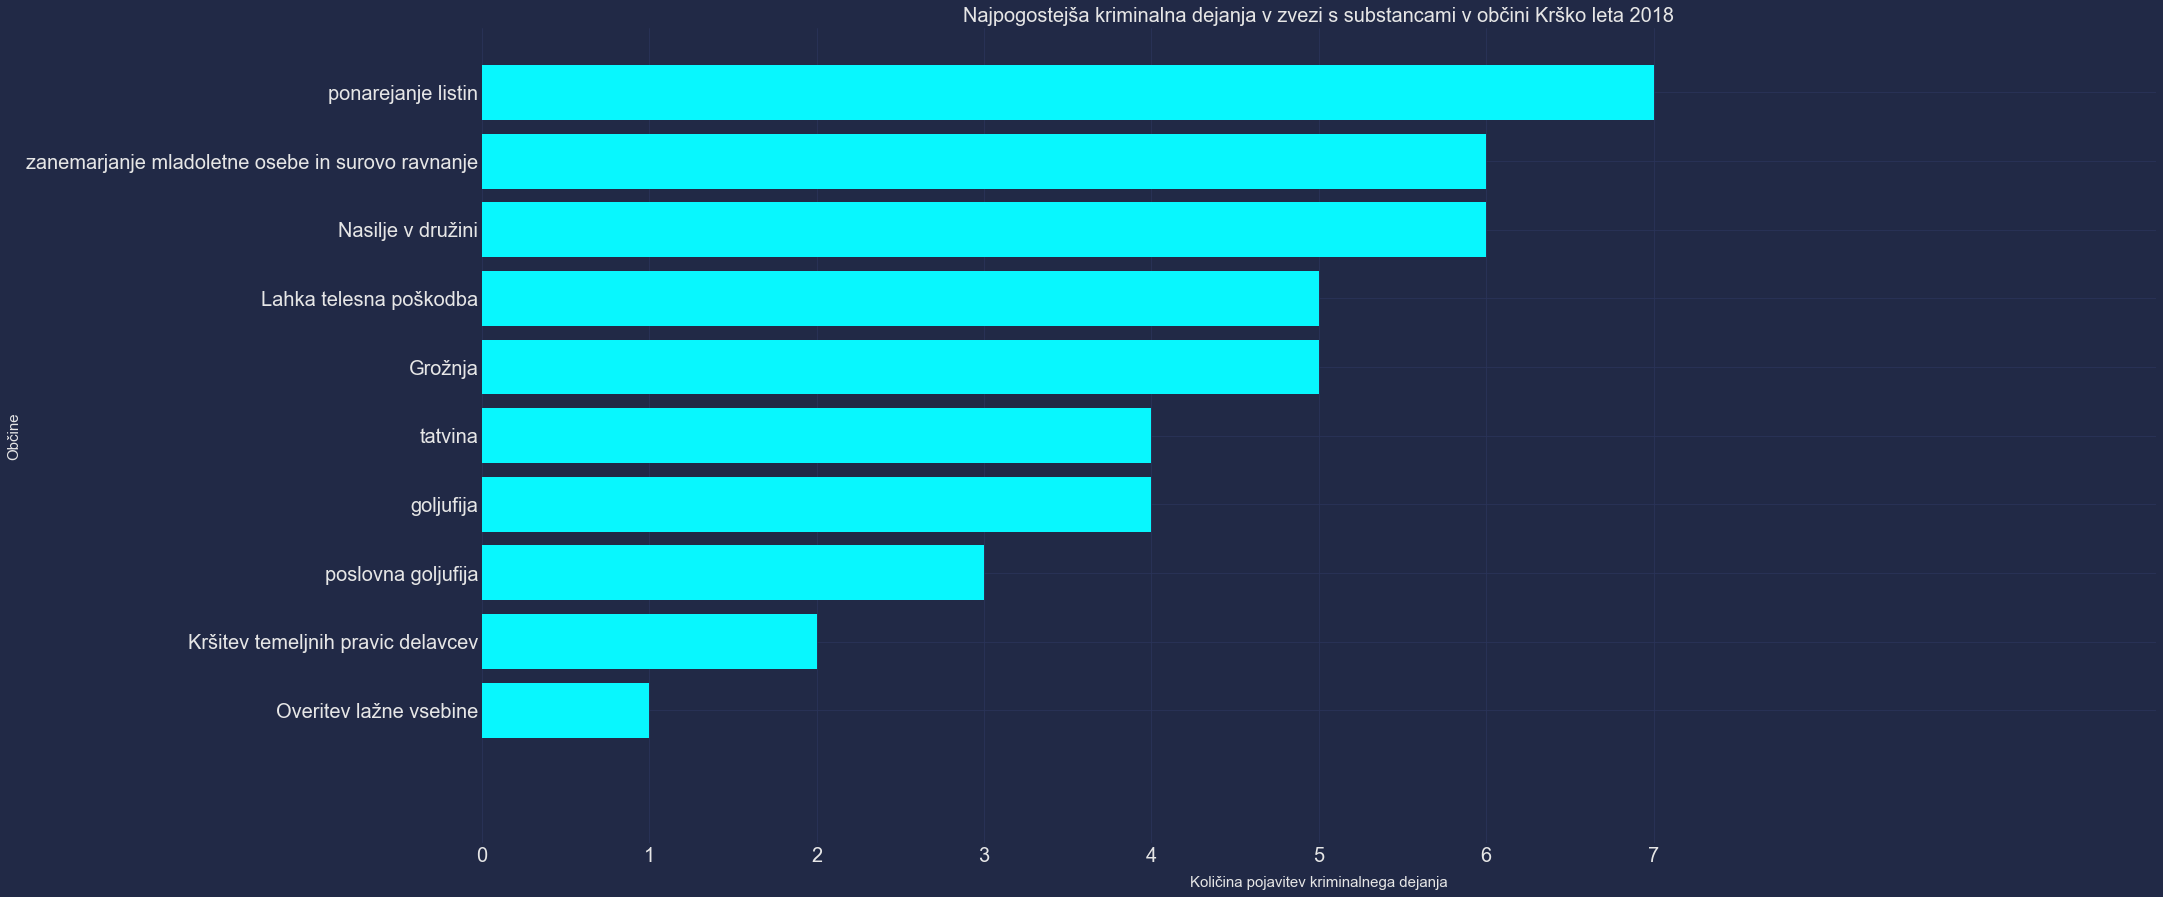

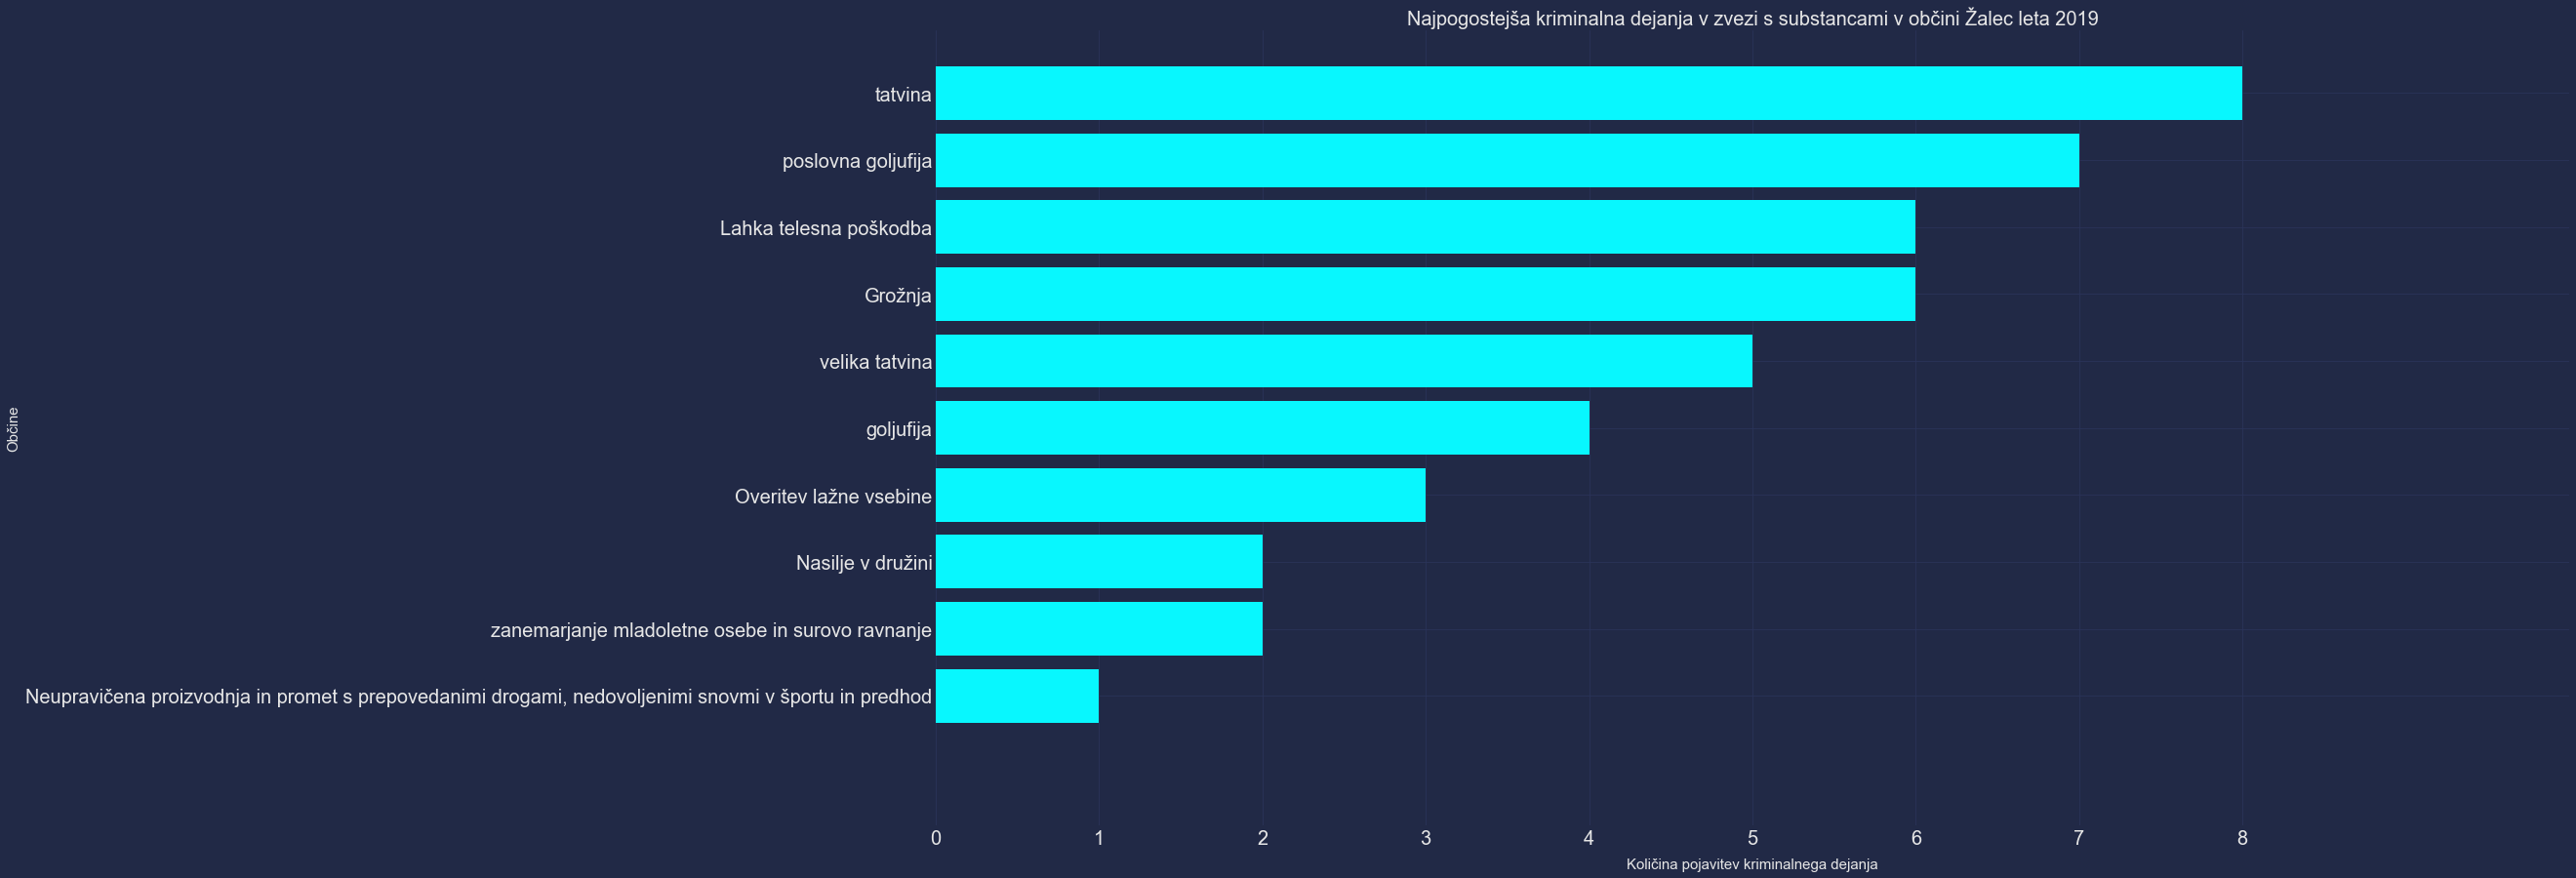

C:\Users\Irinej\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


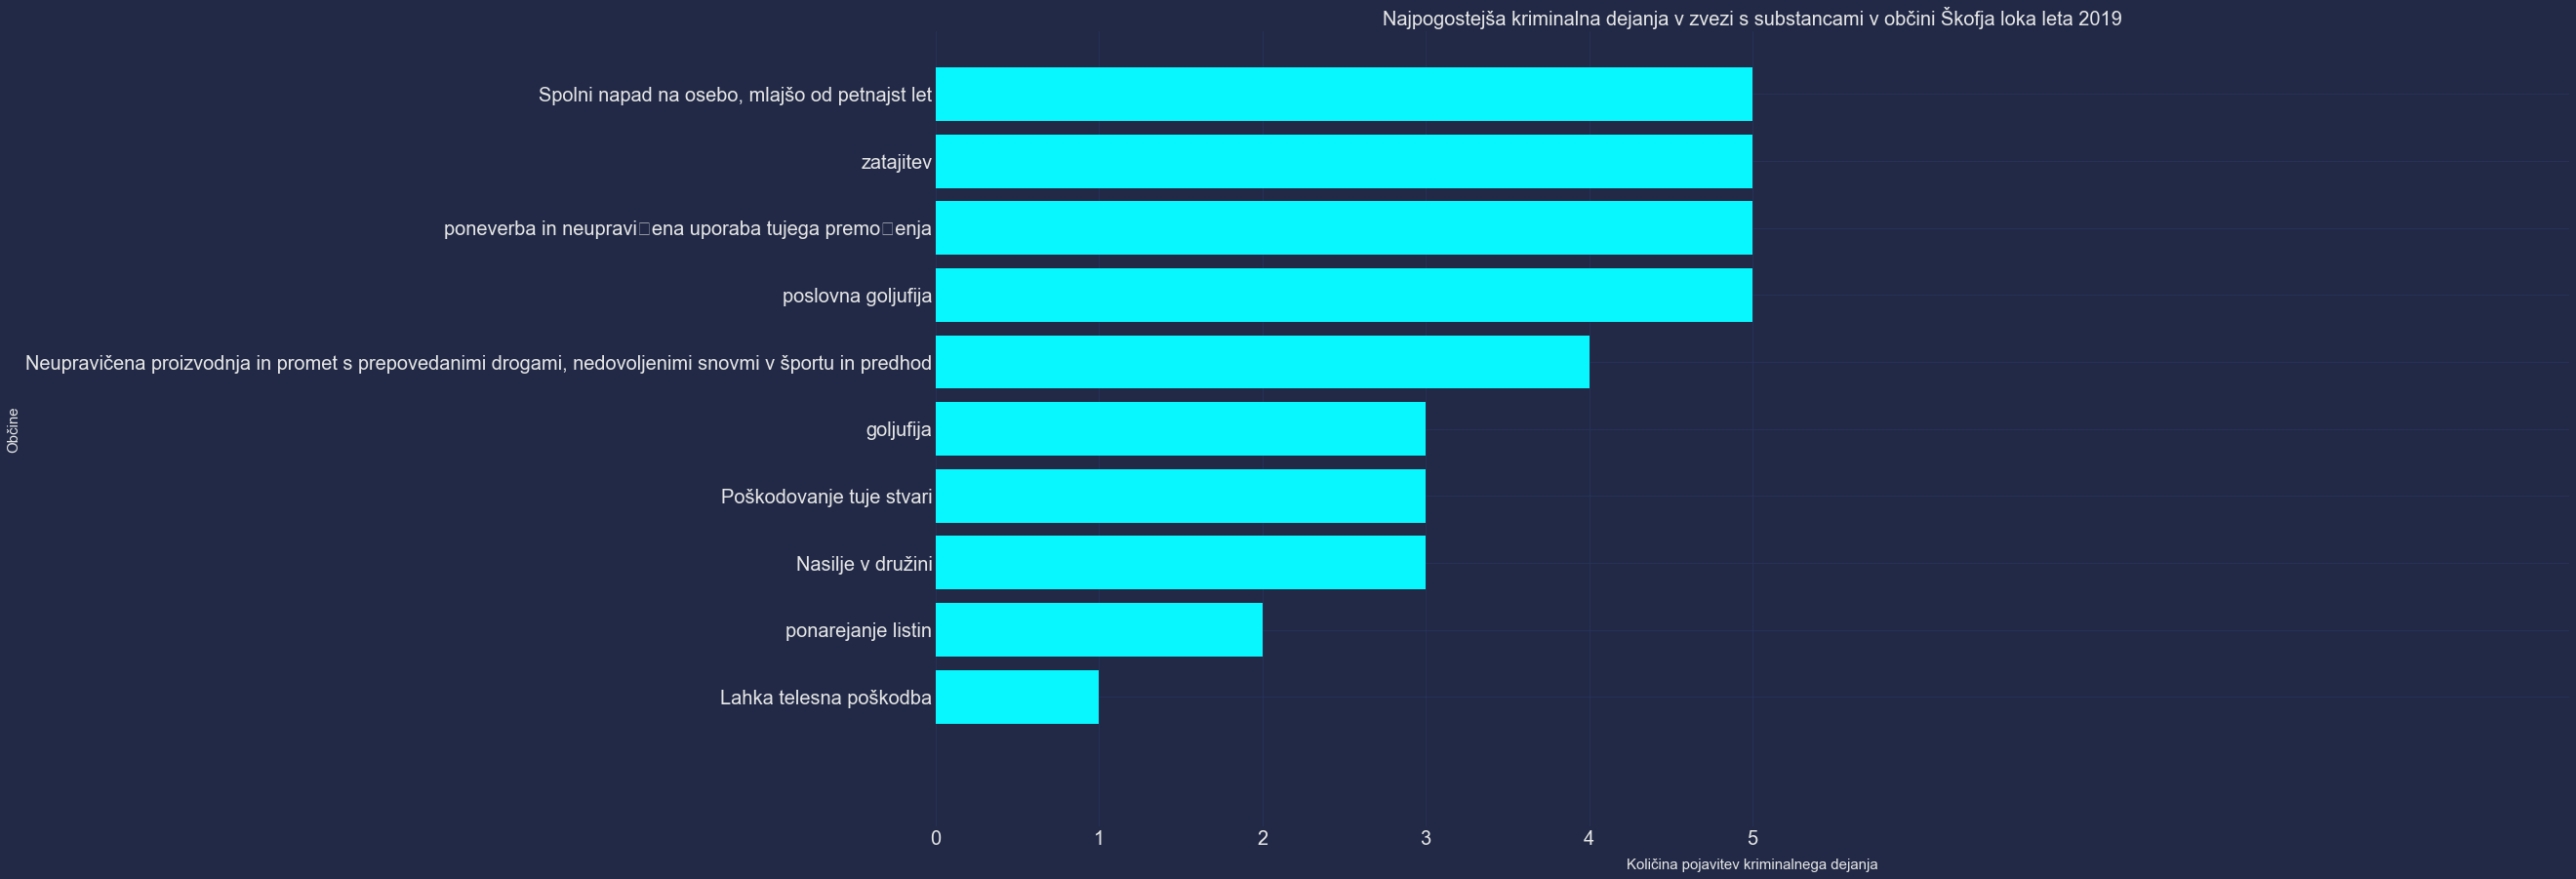

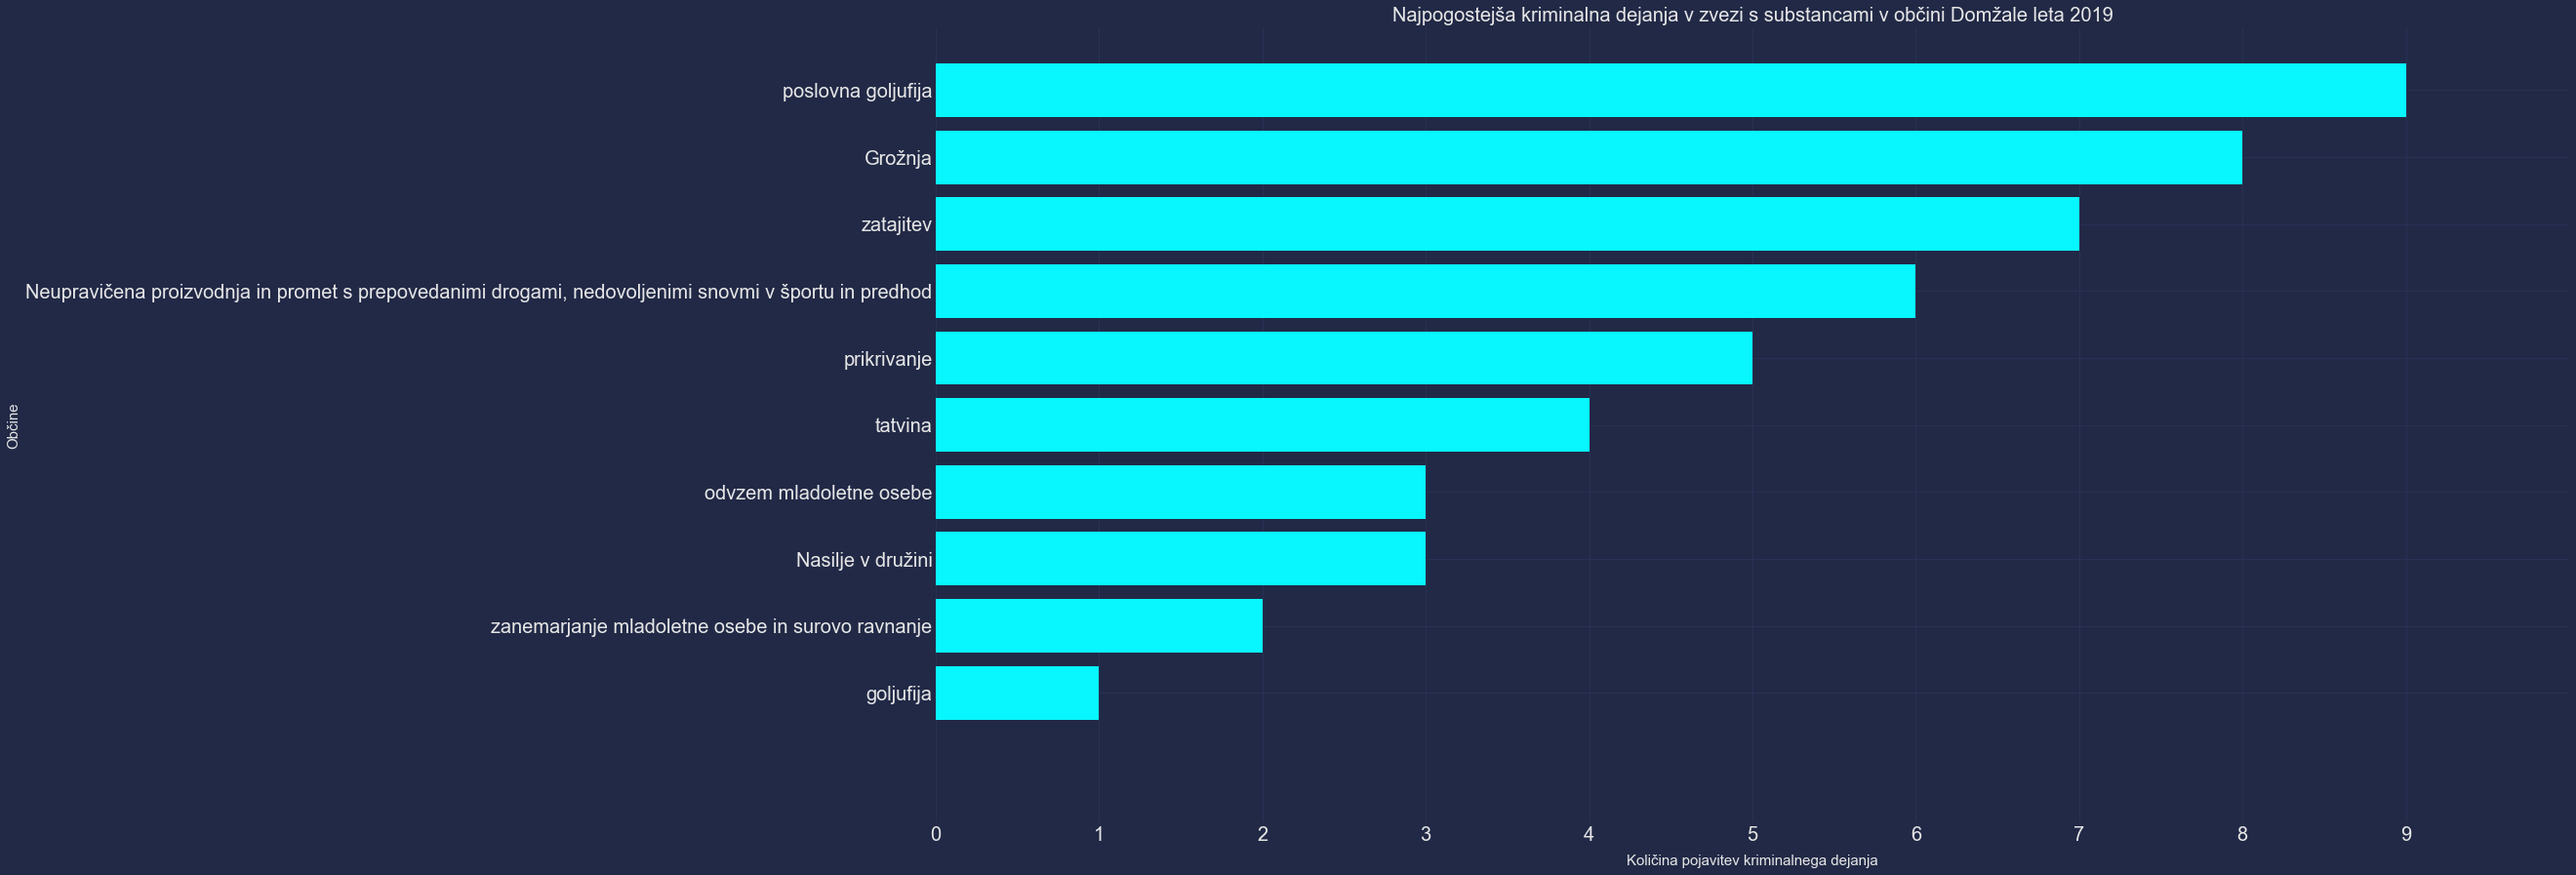

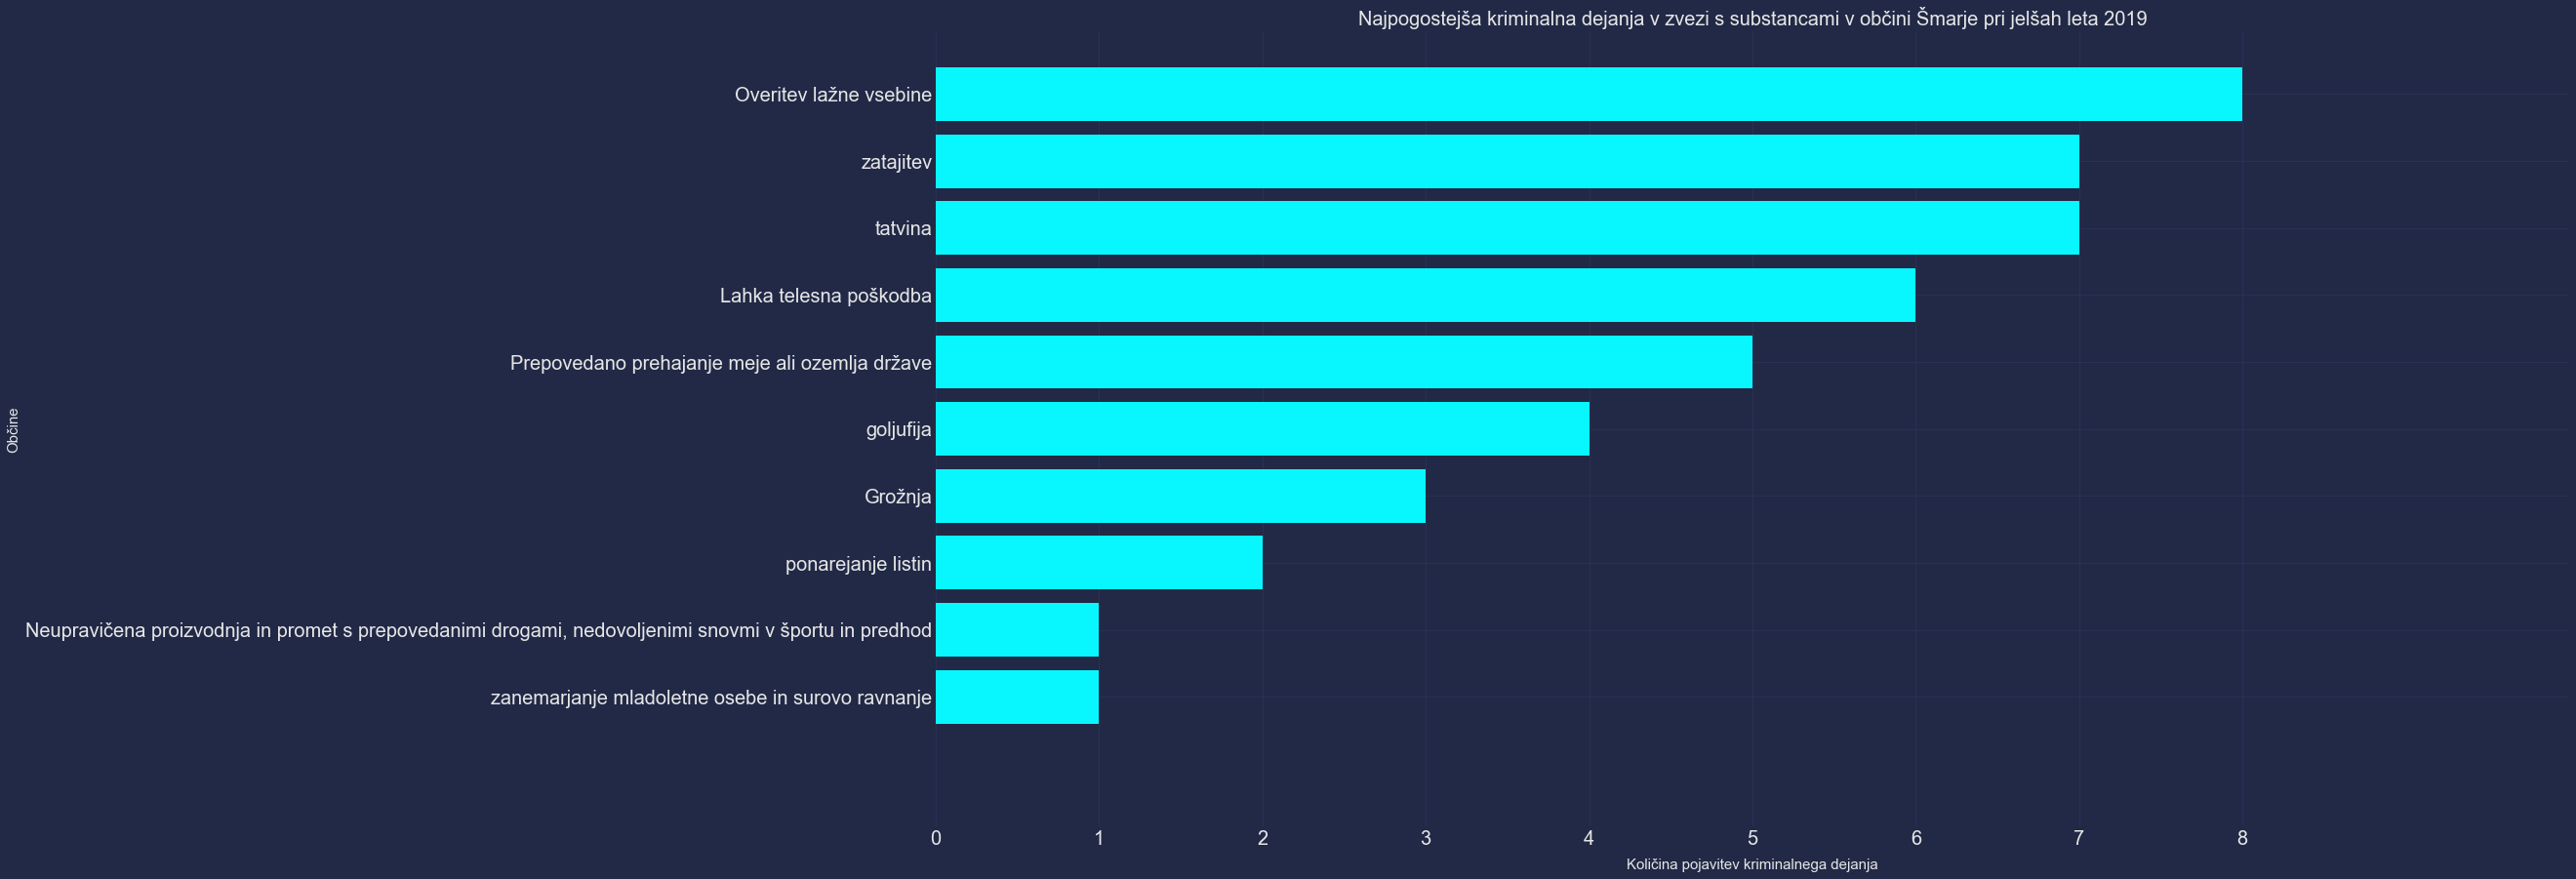

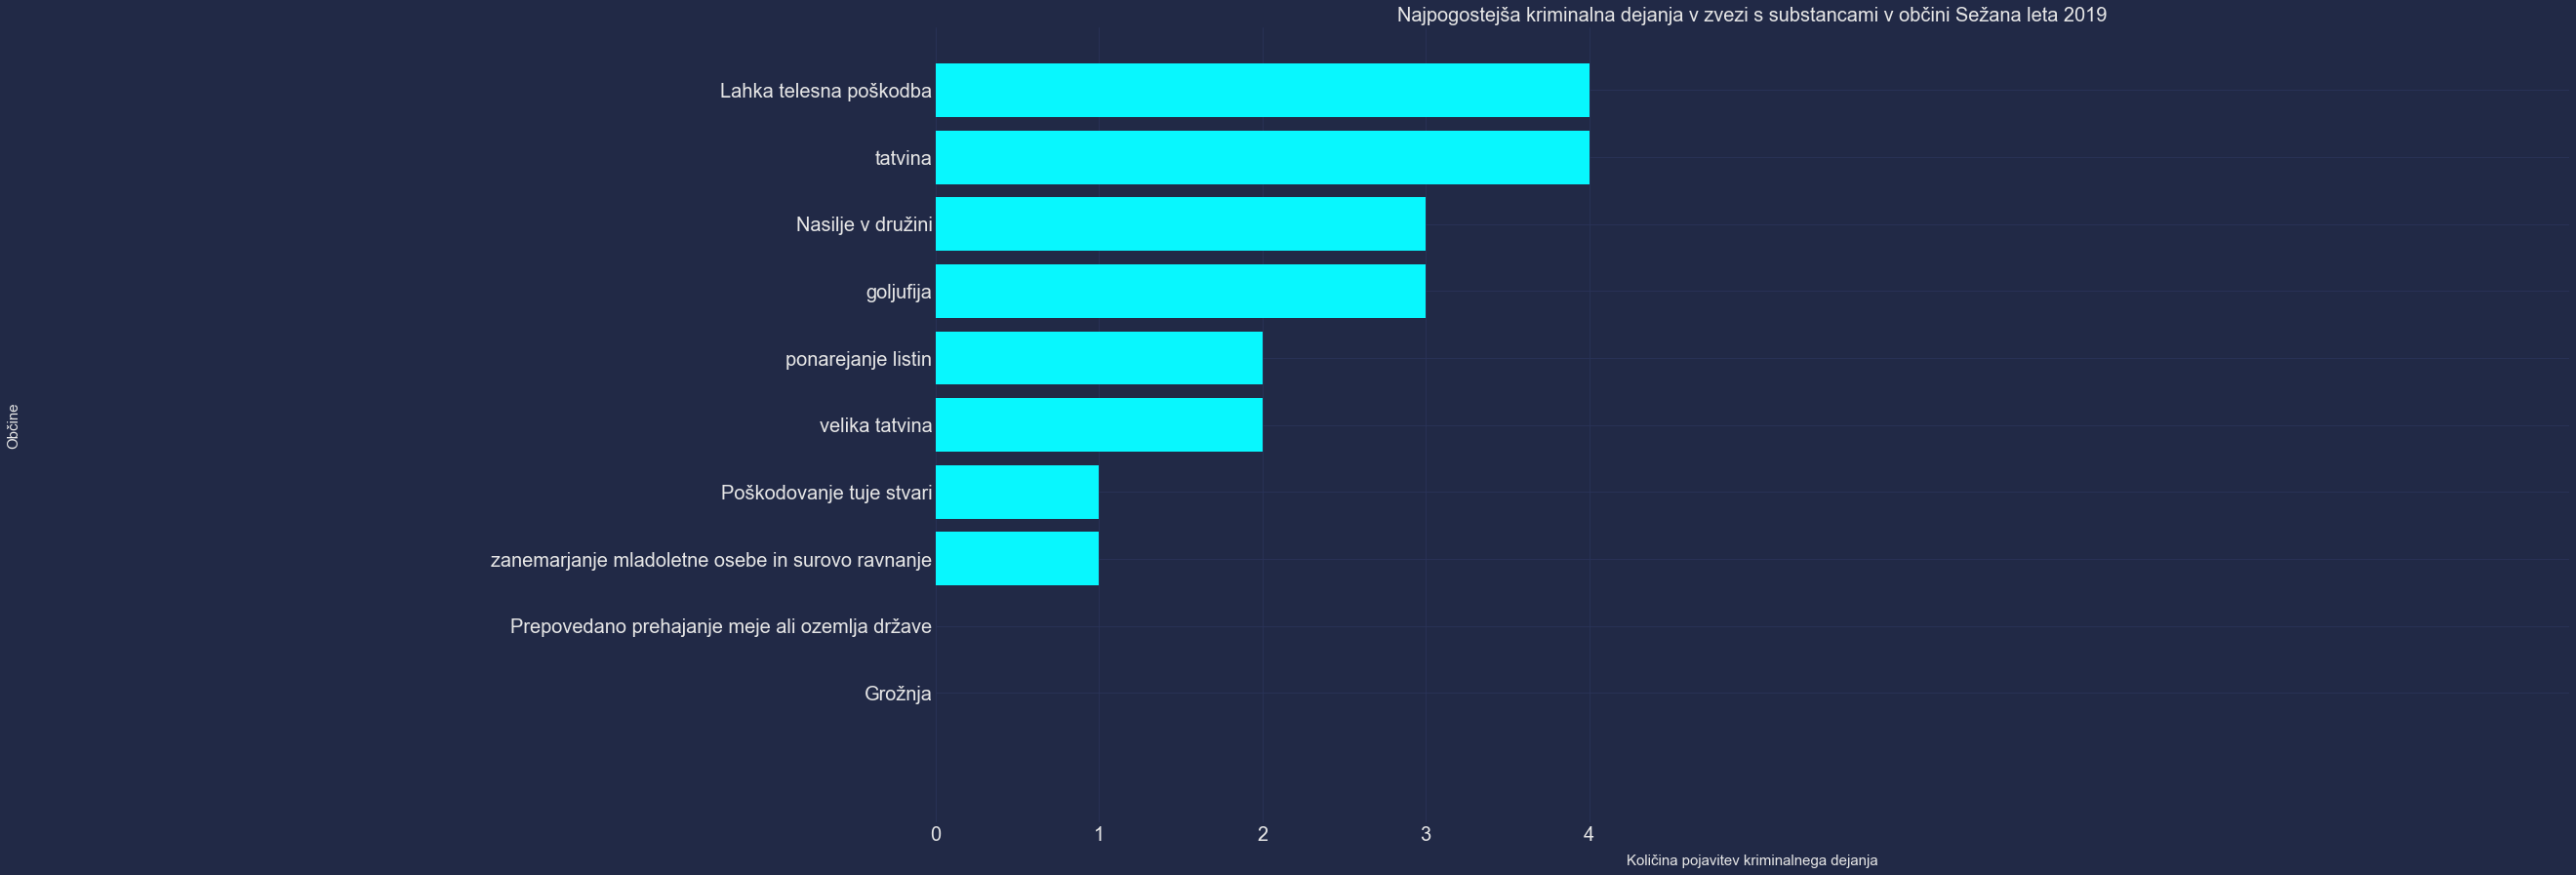

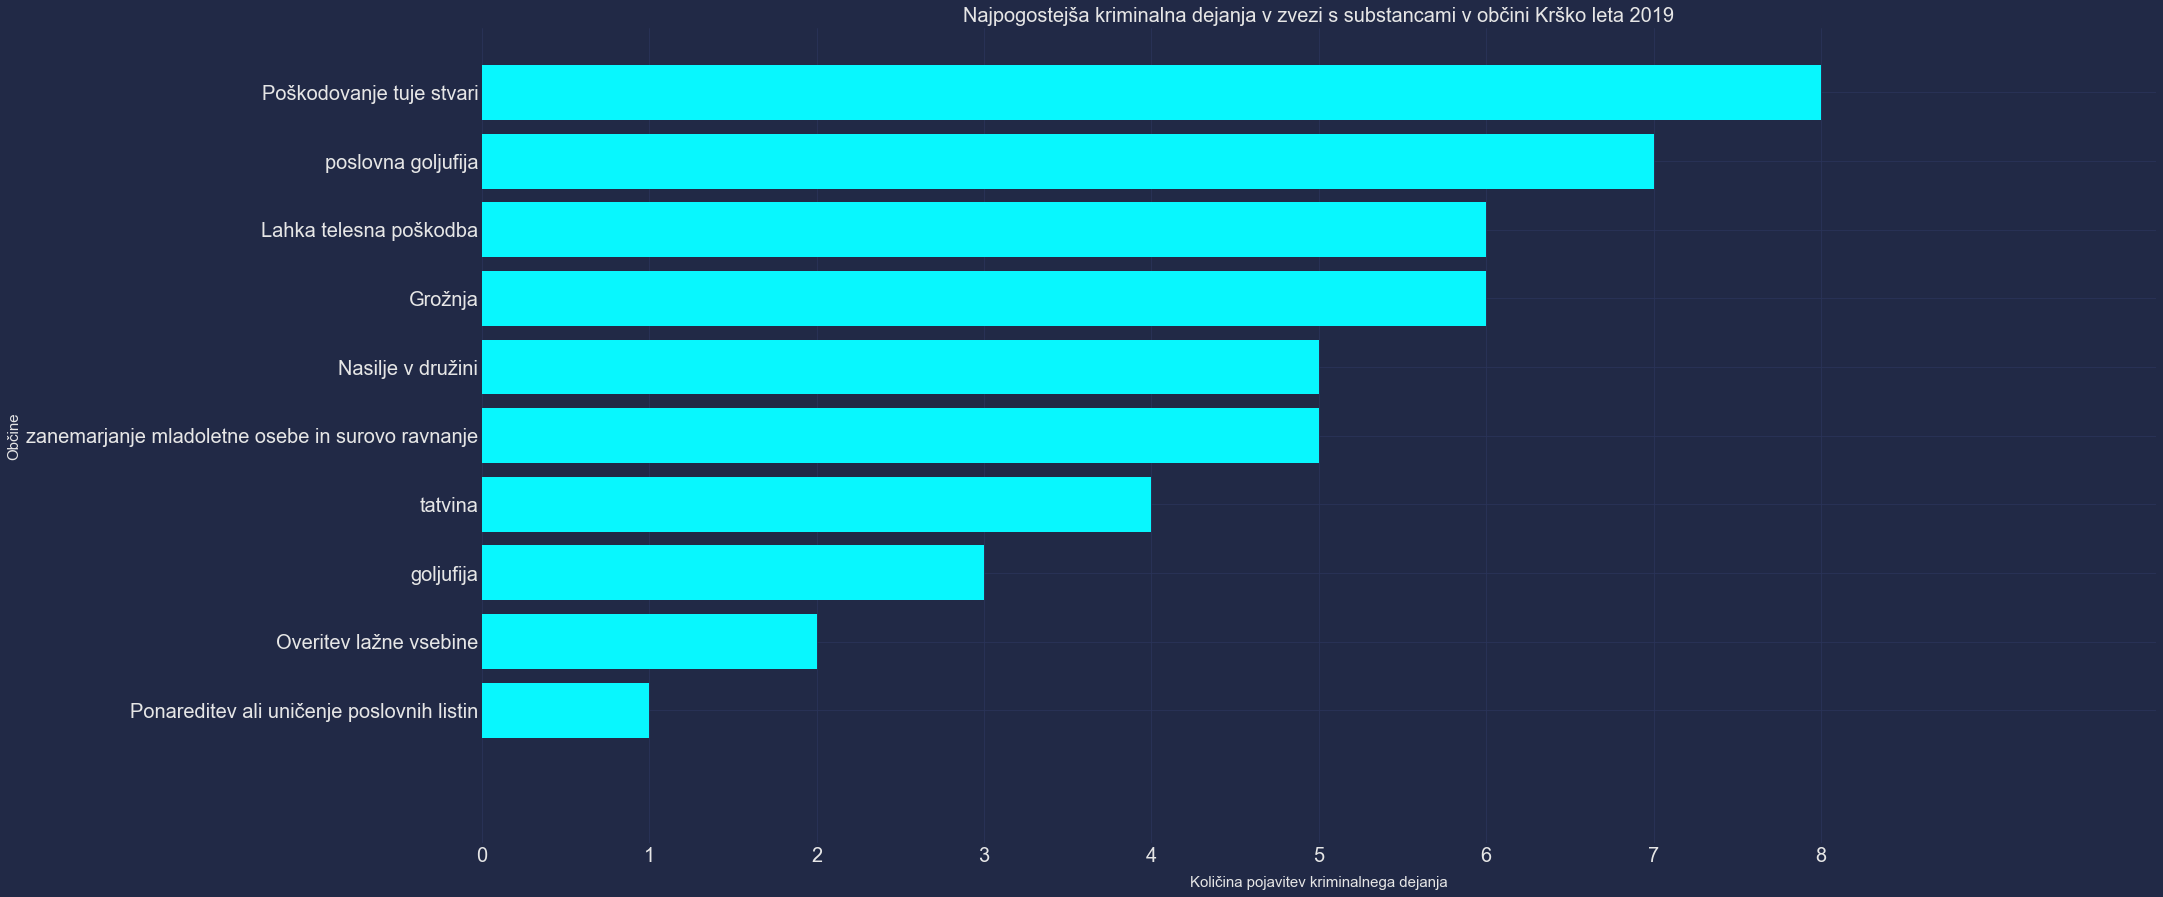

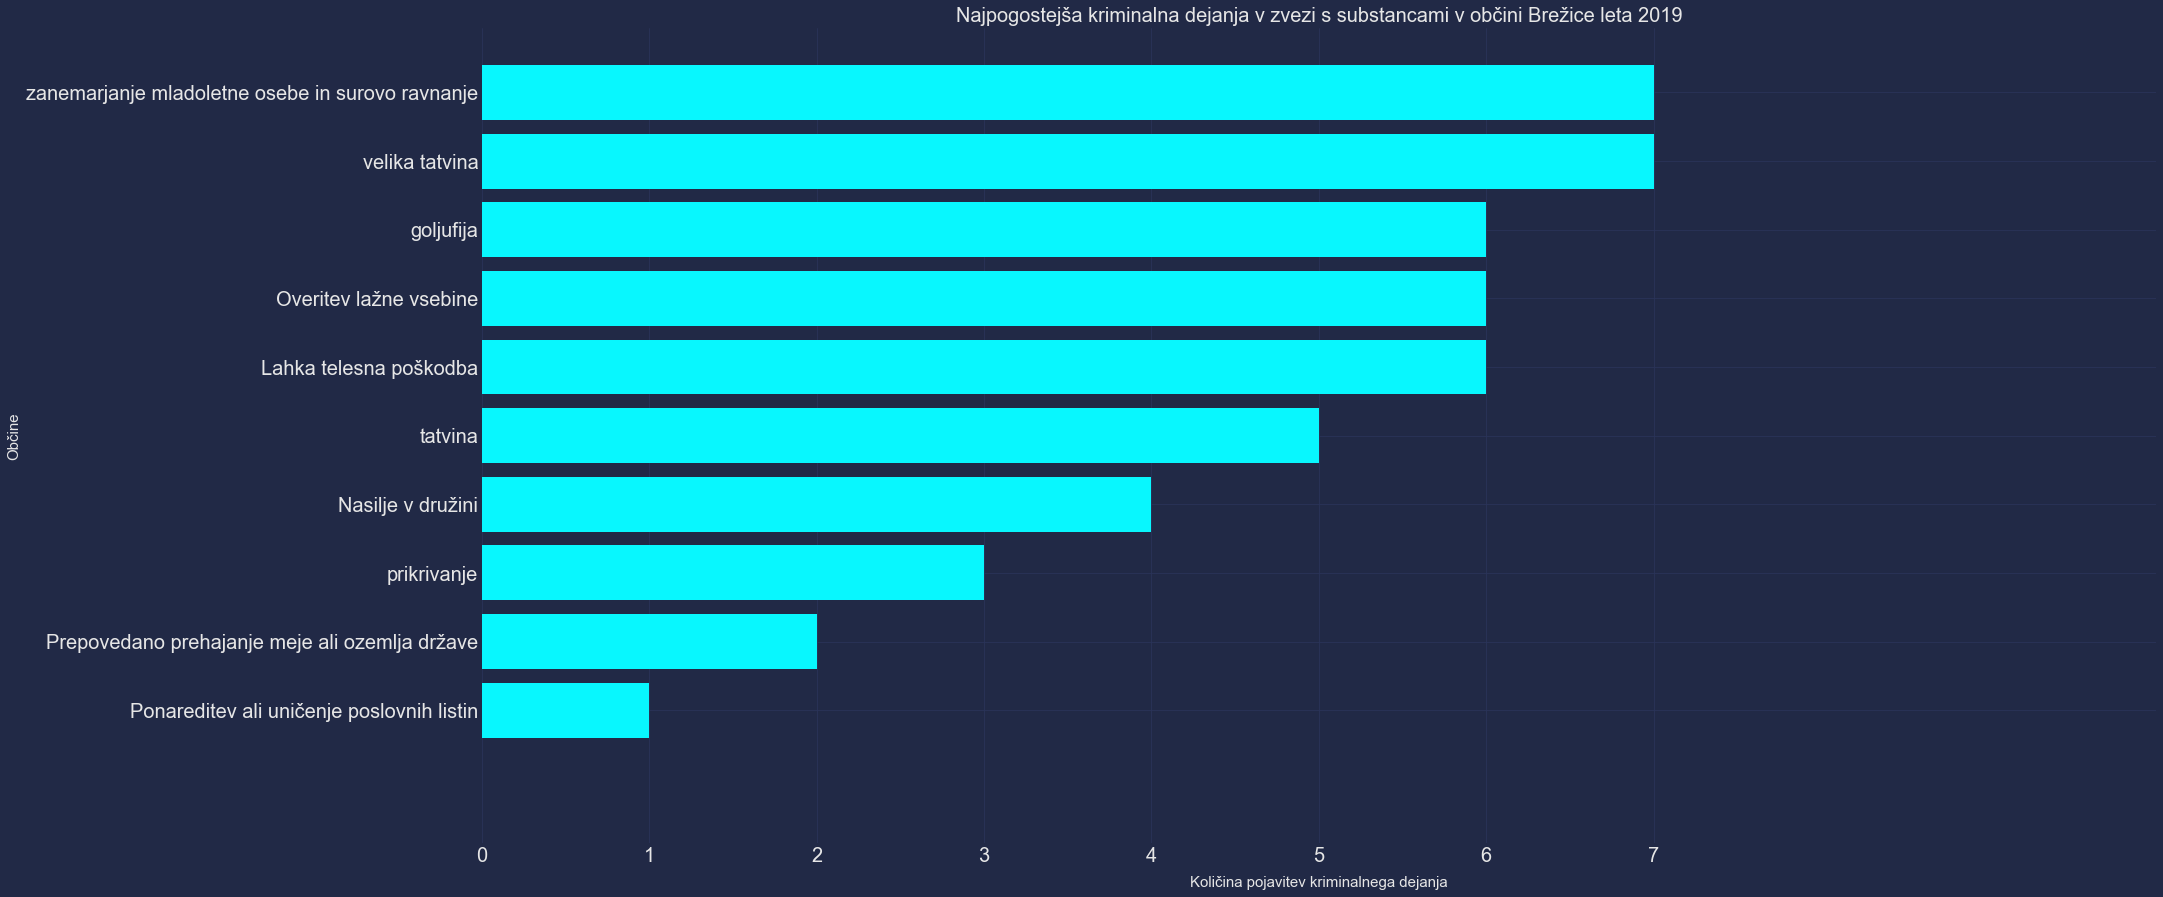

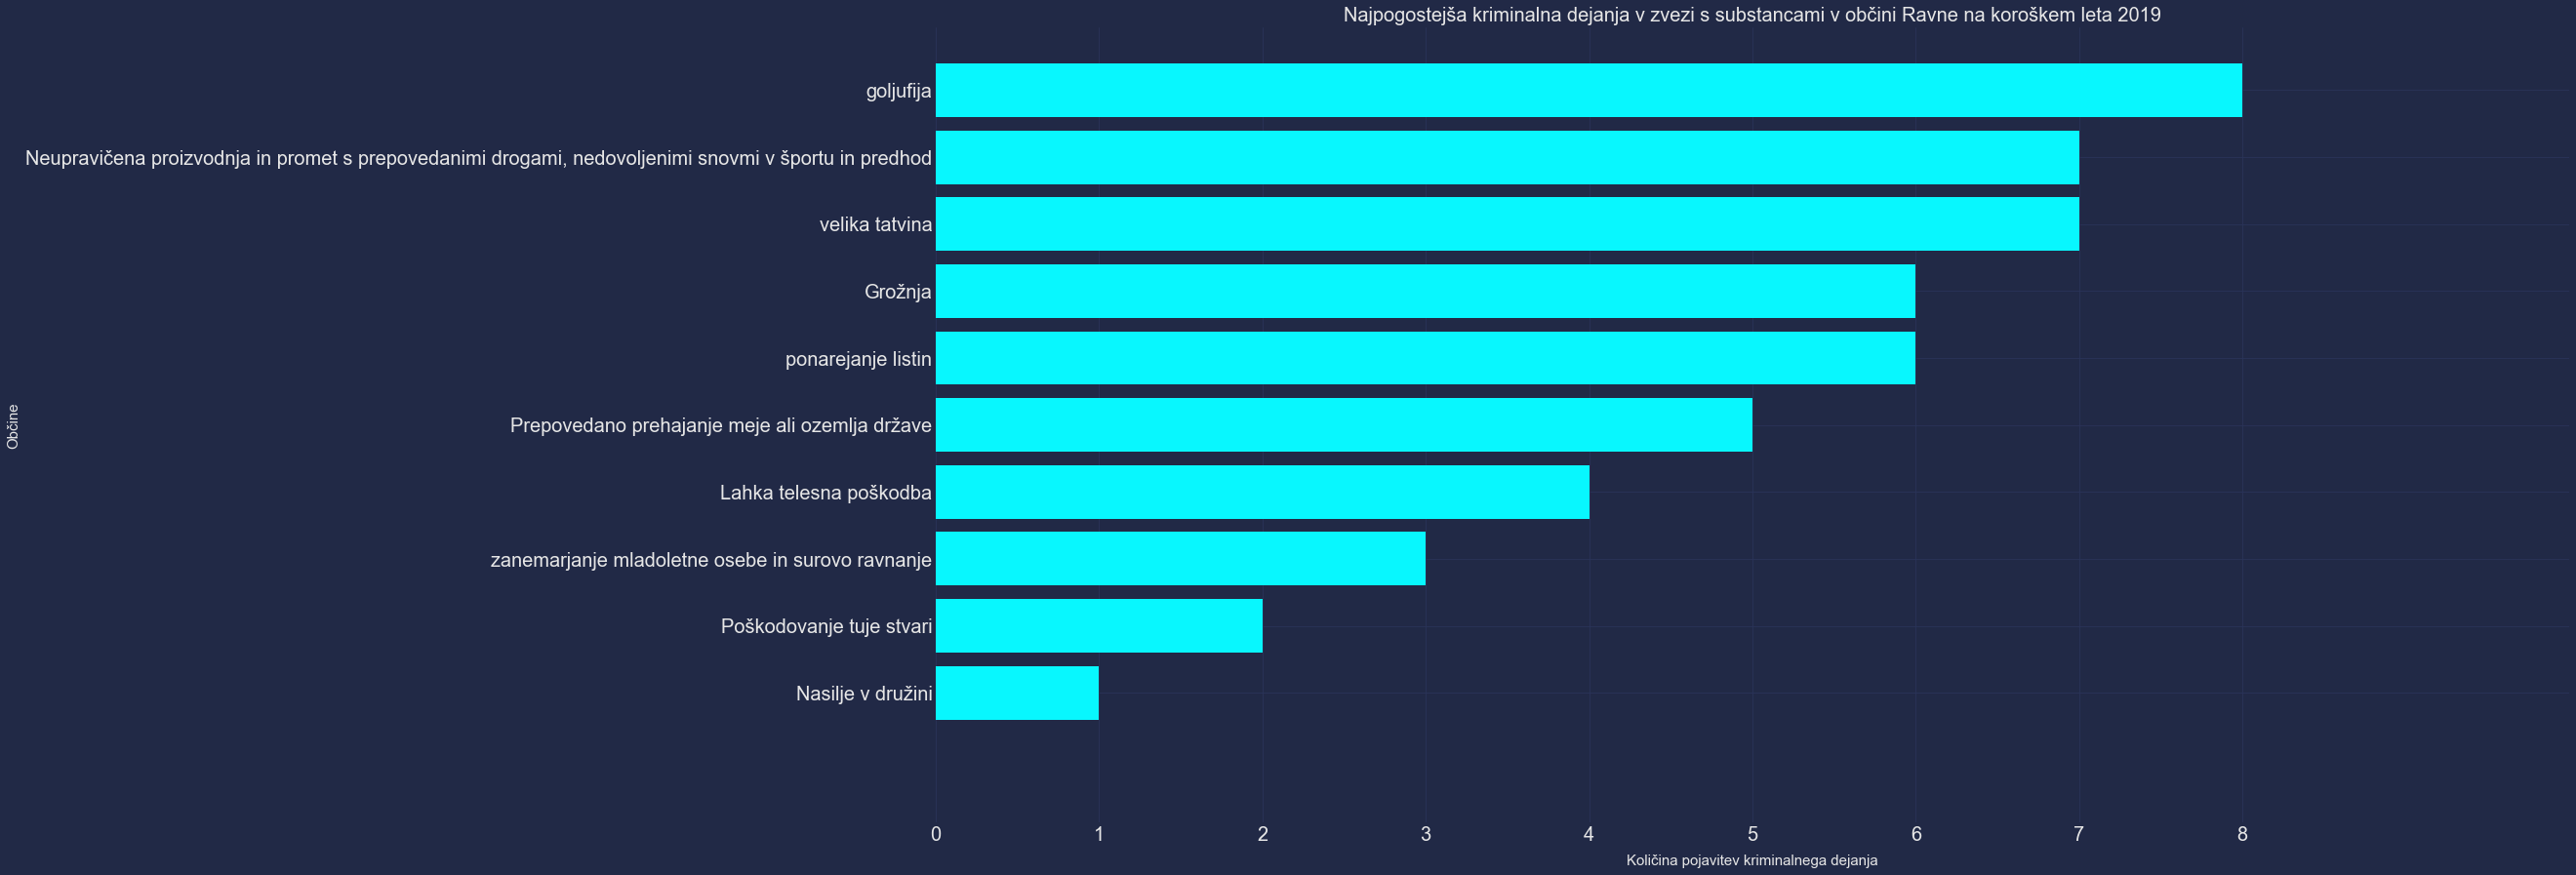

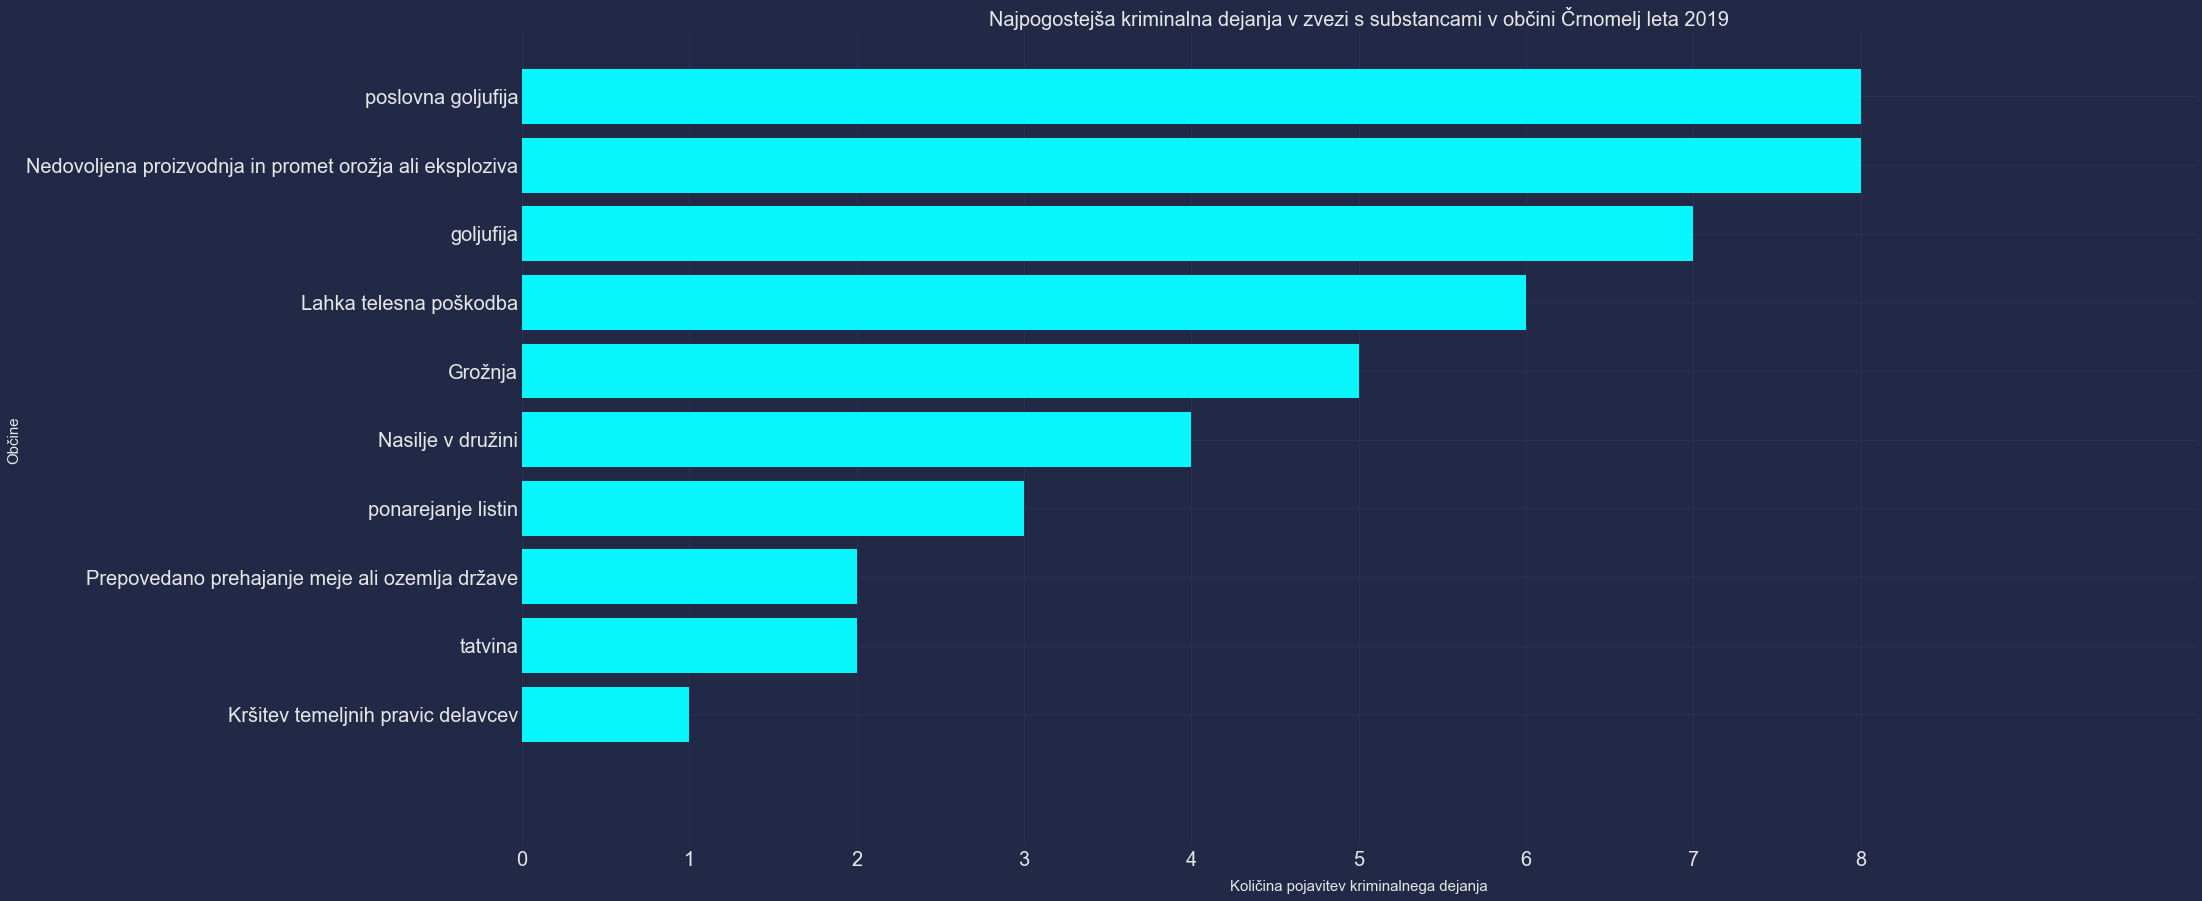

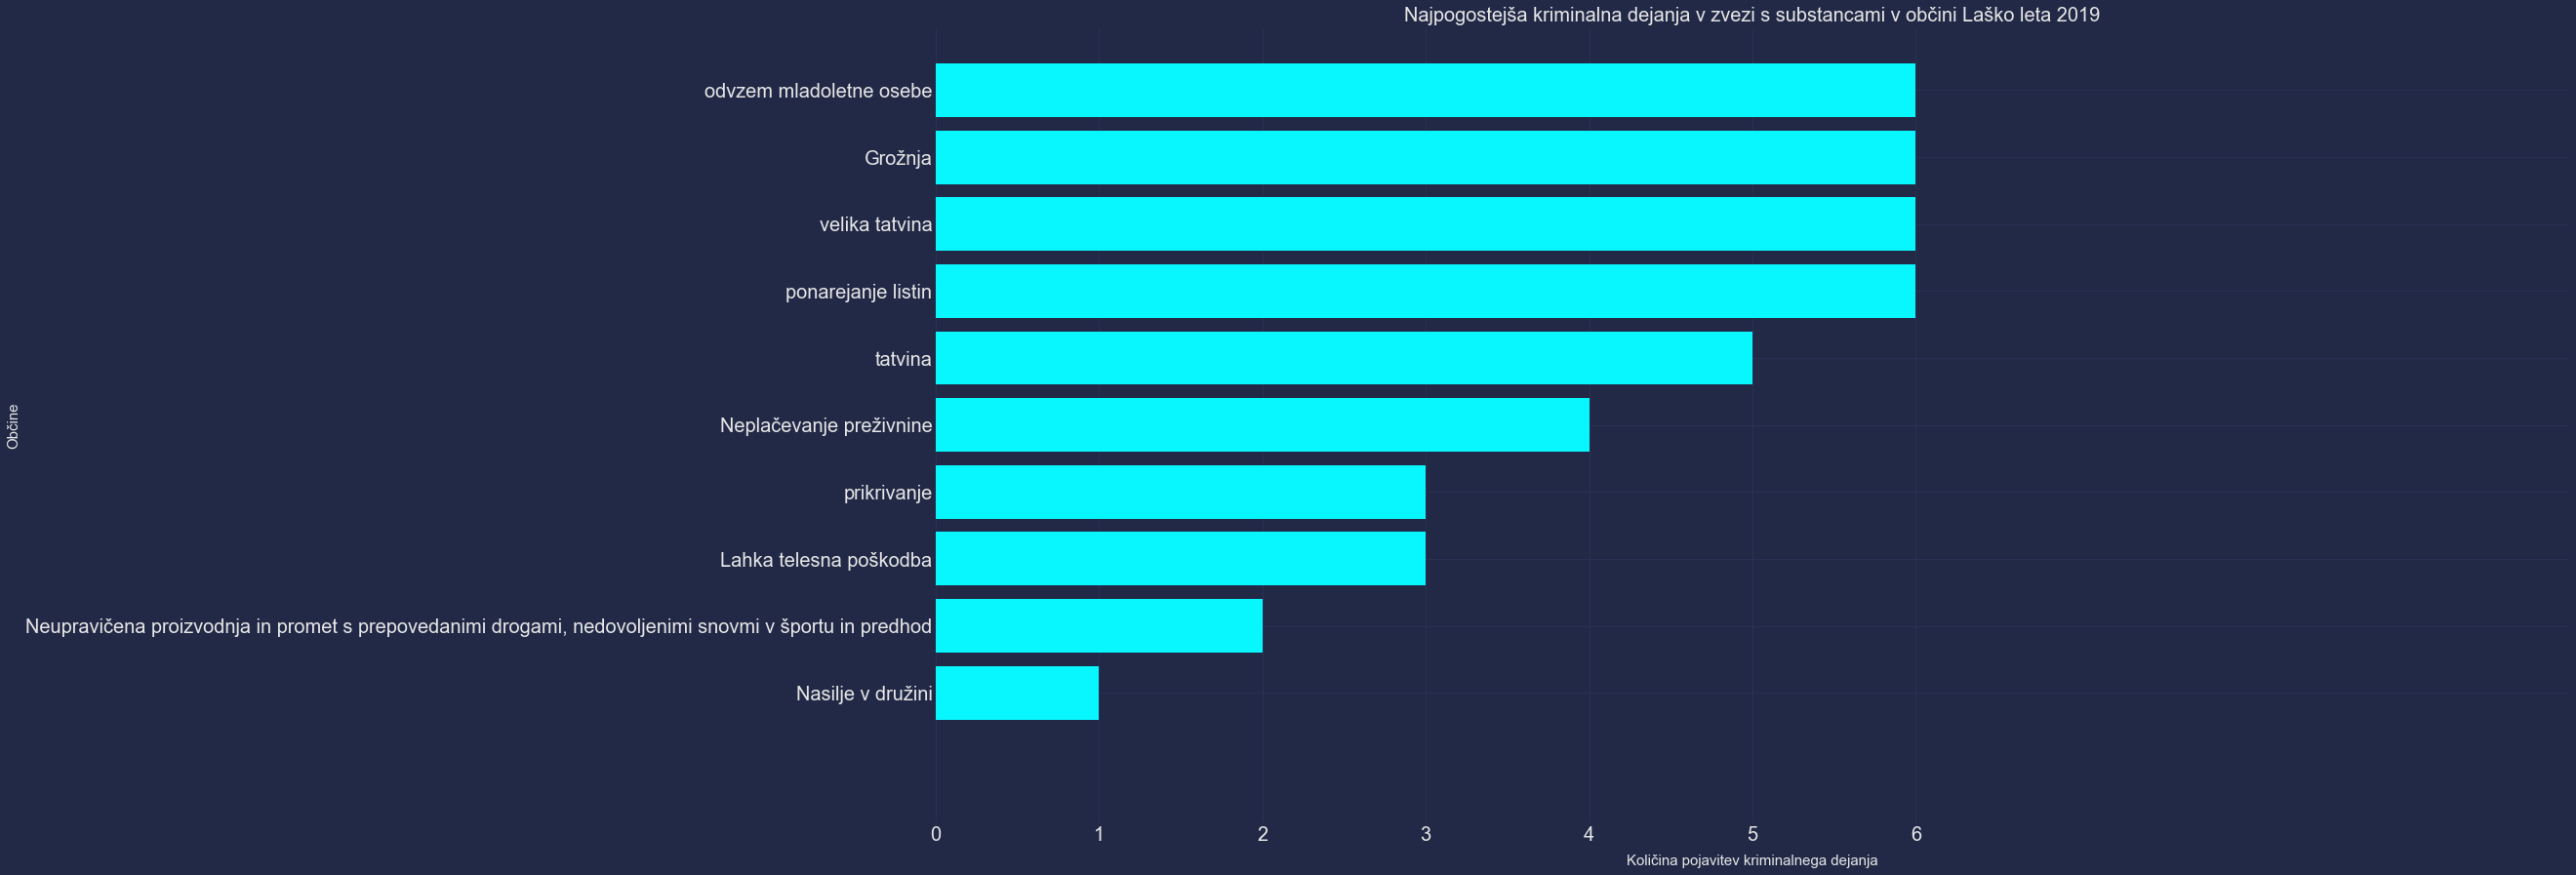

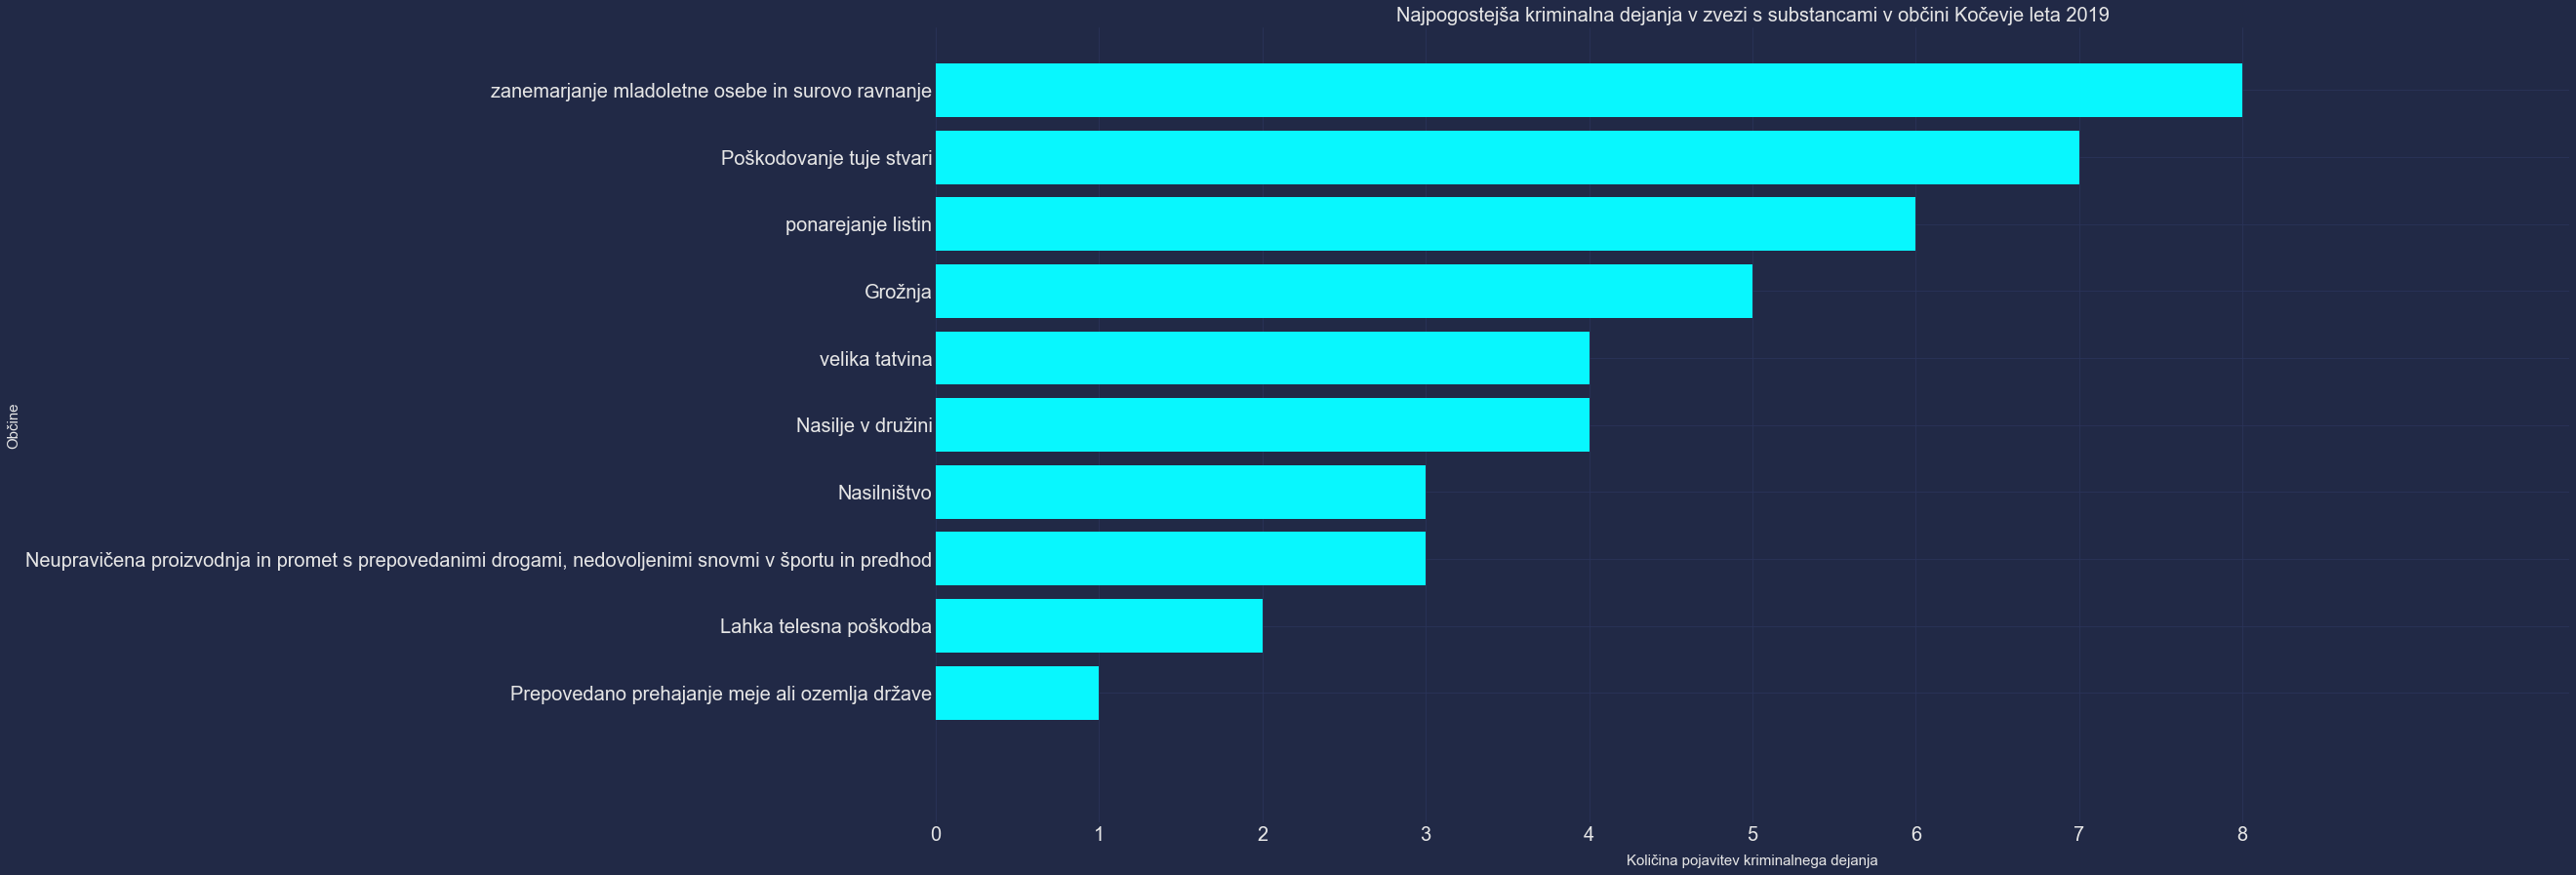

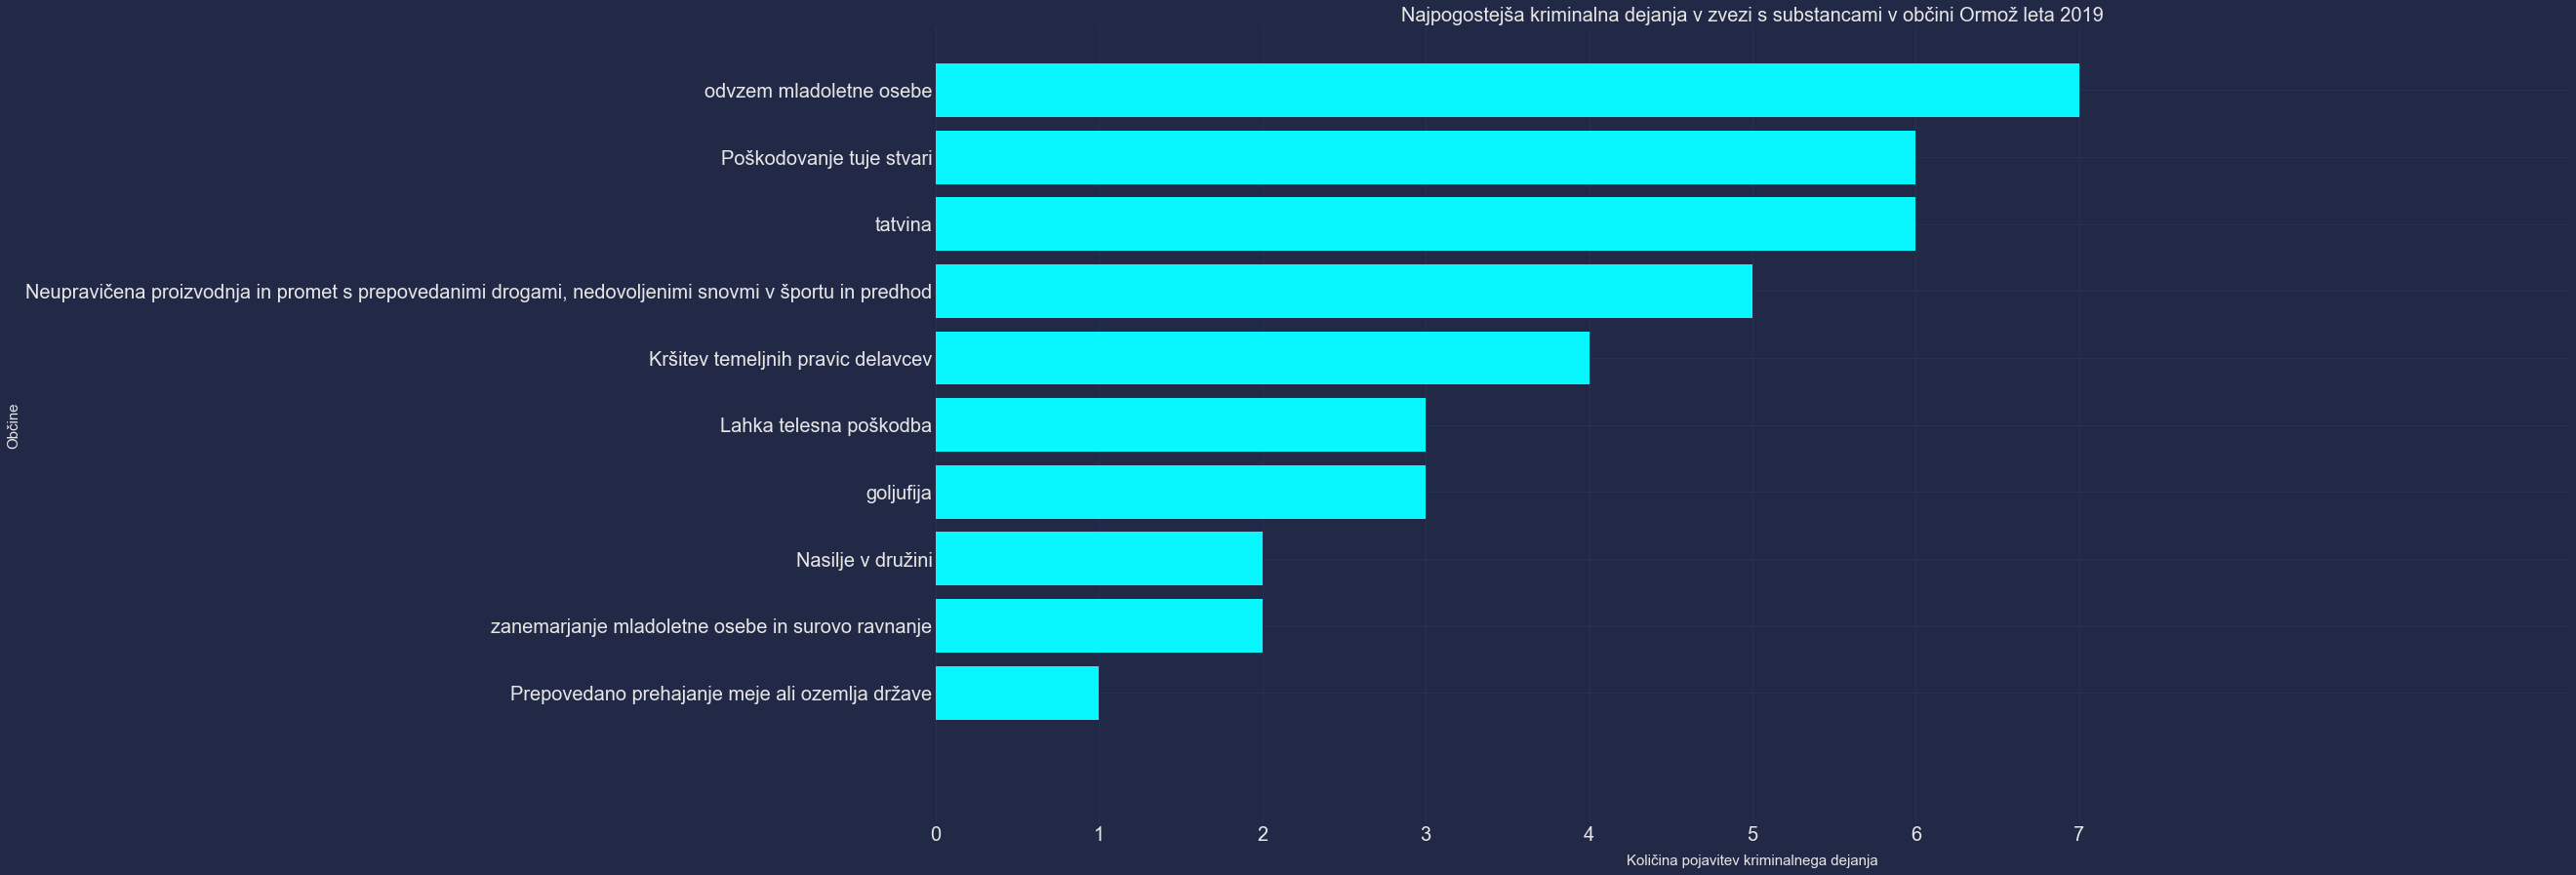

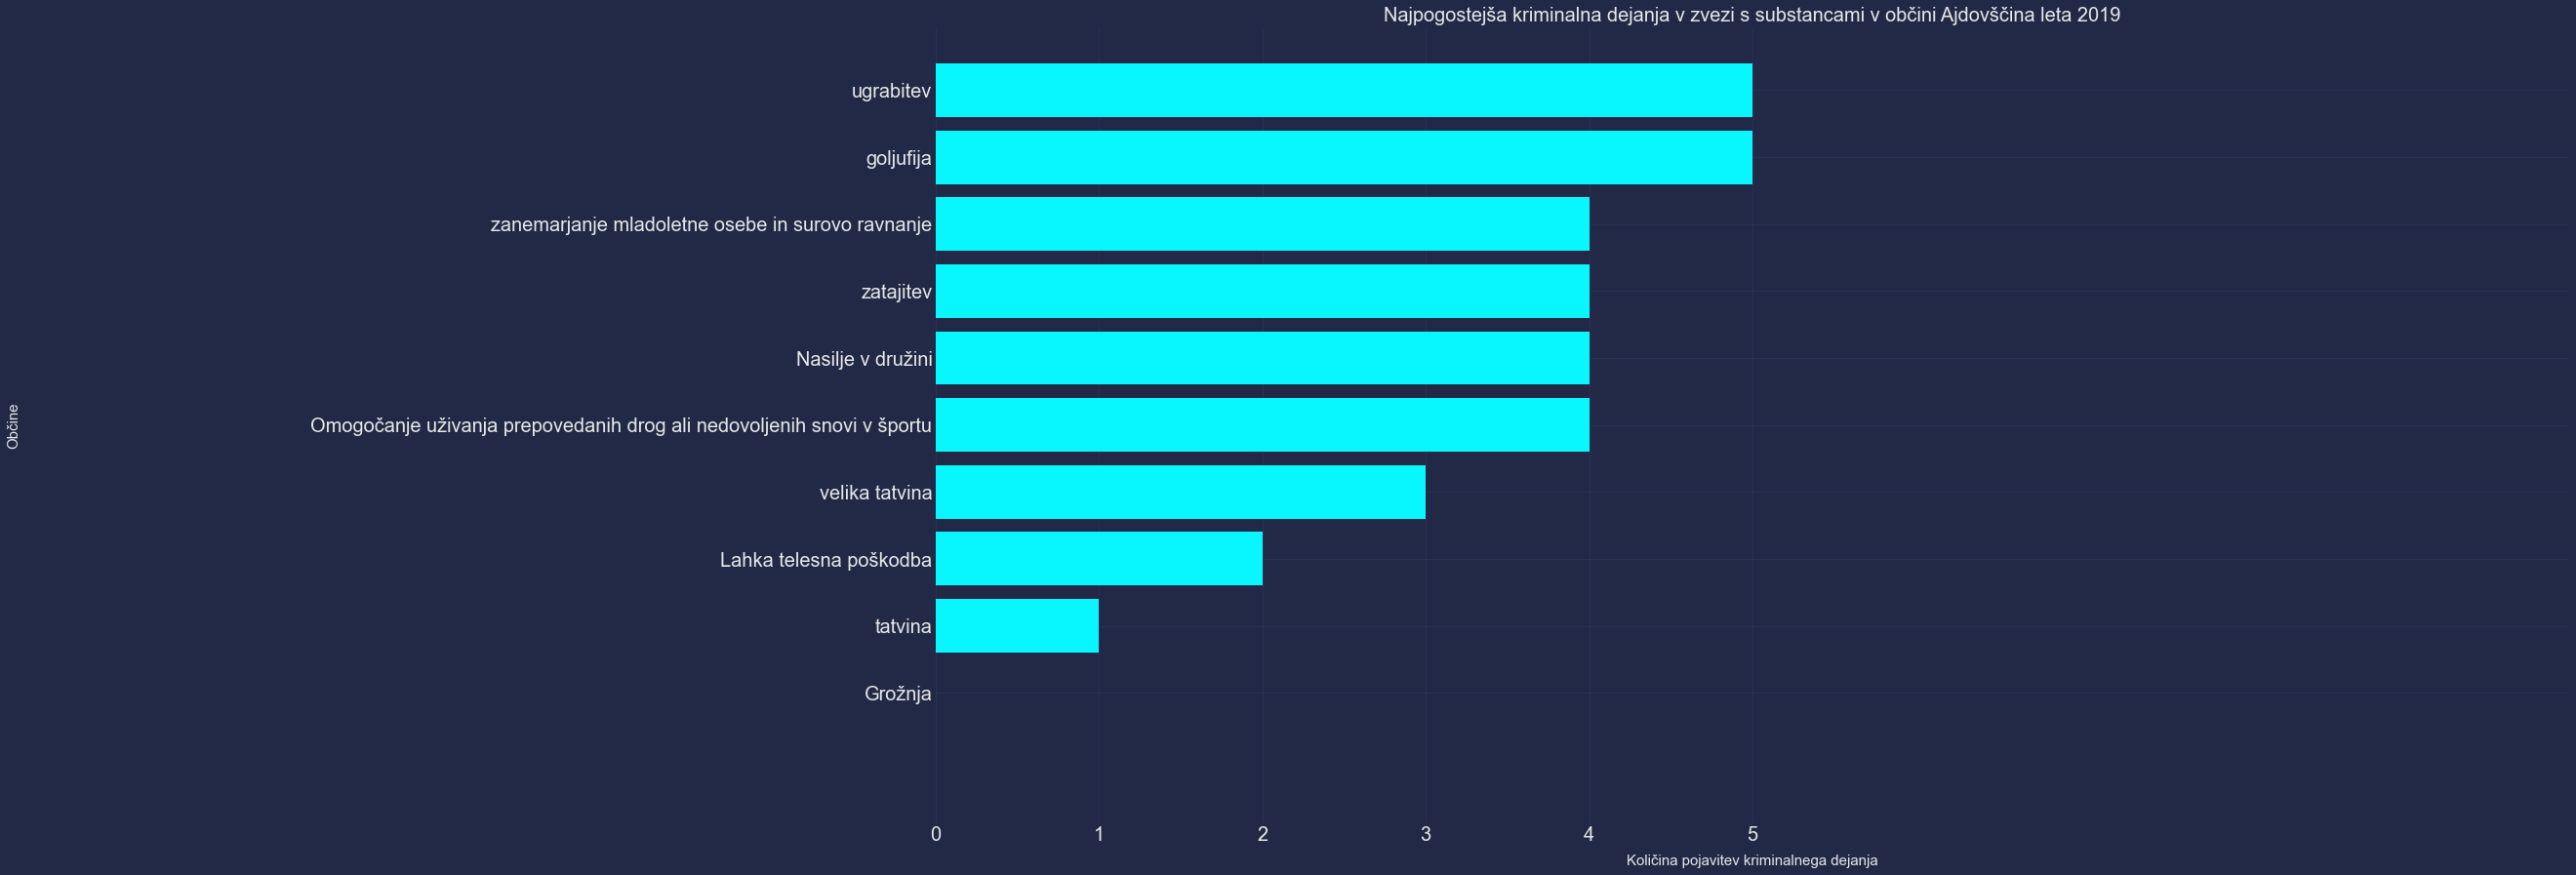

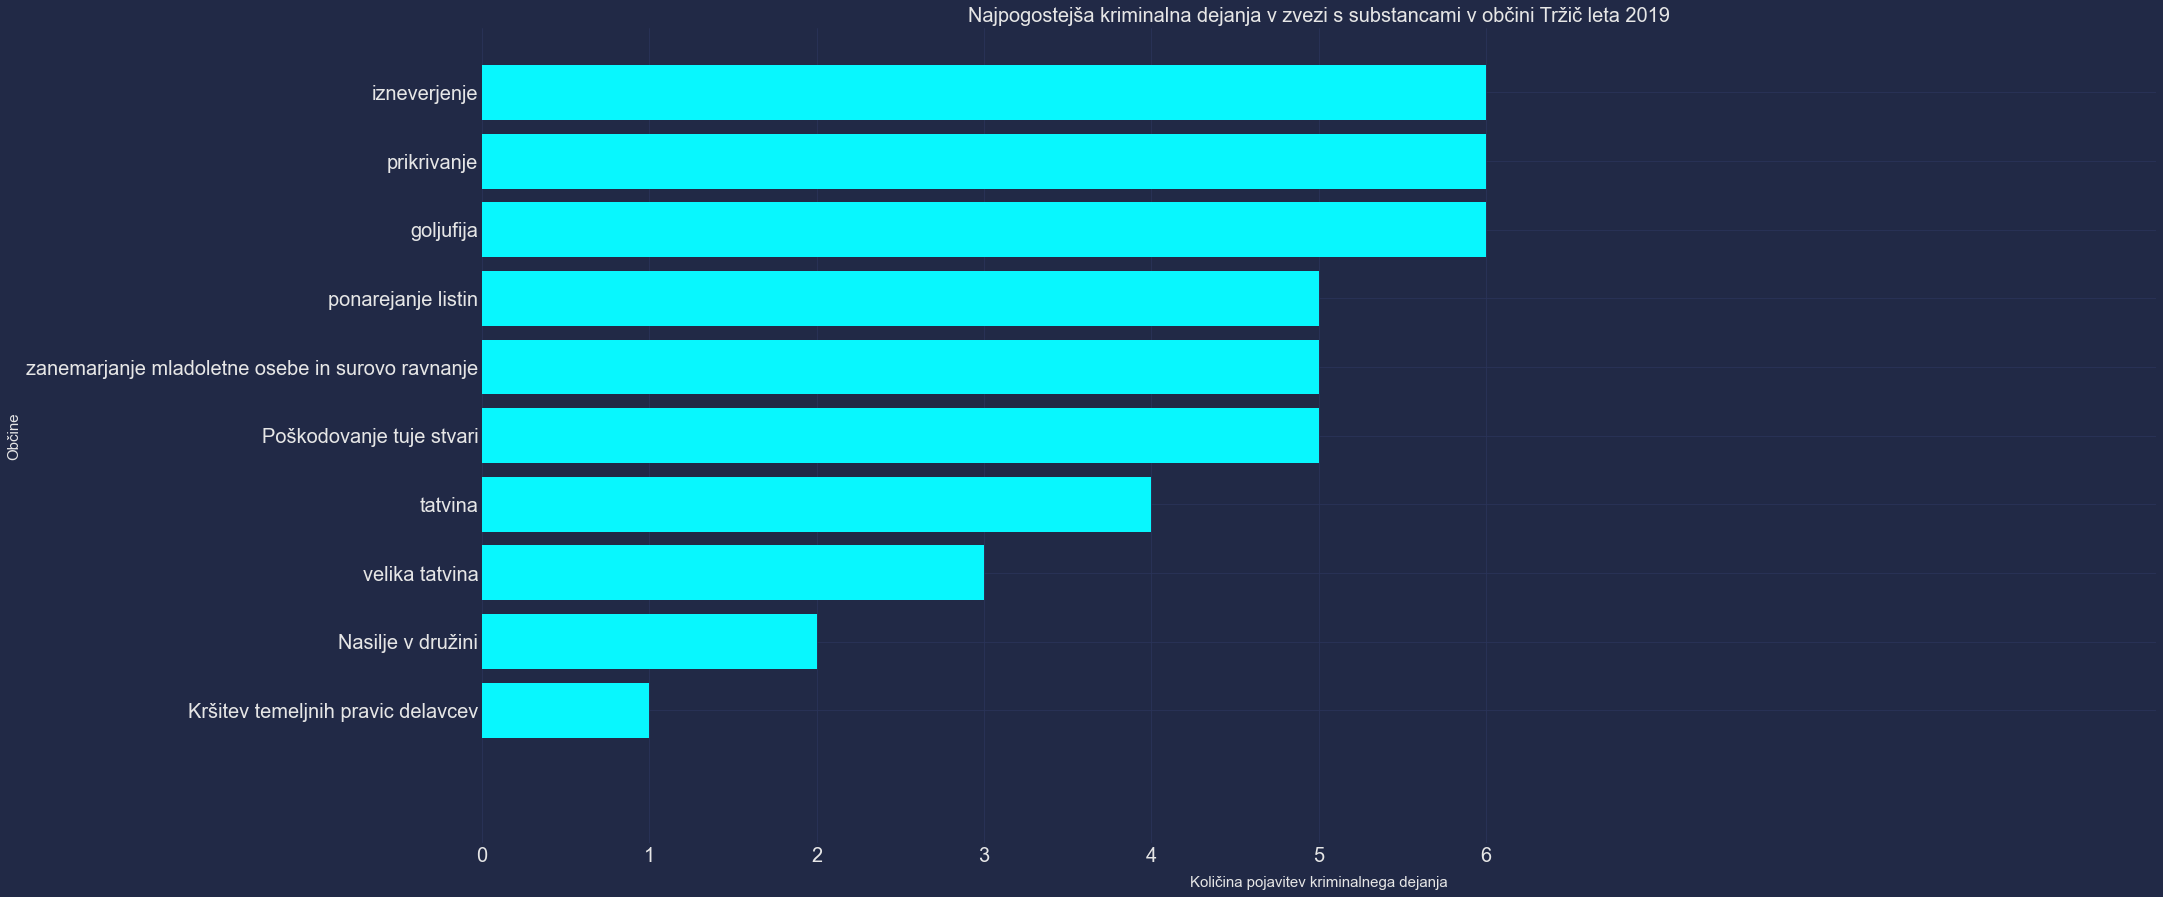

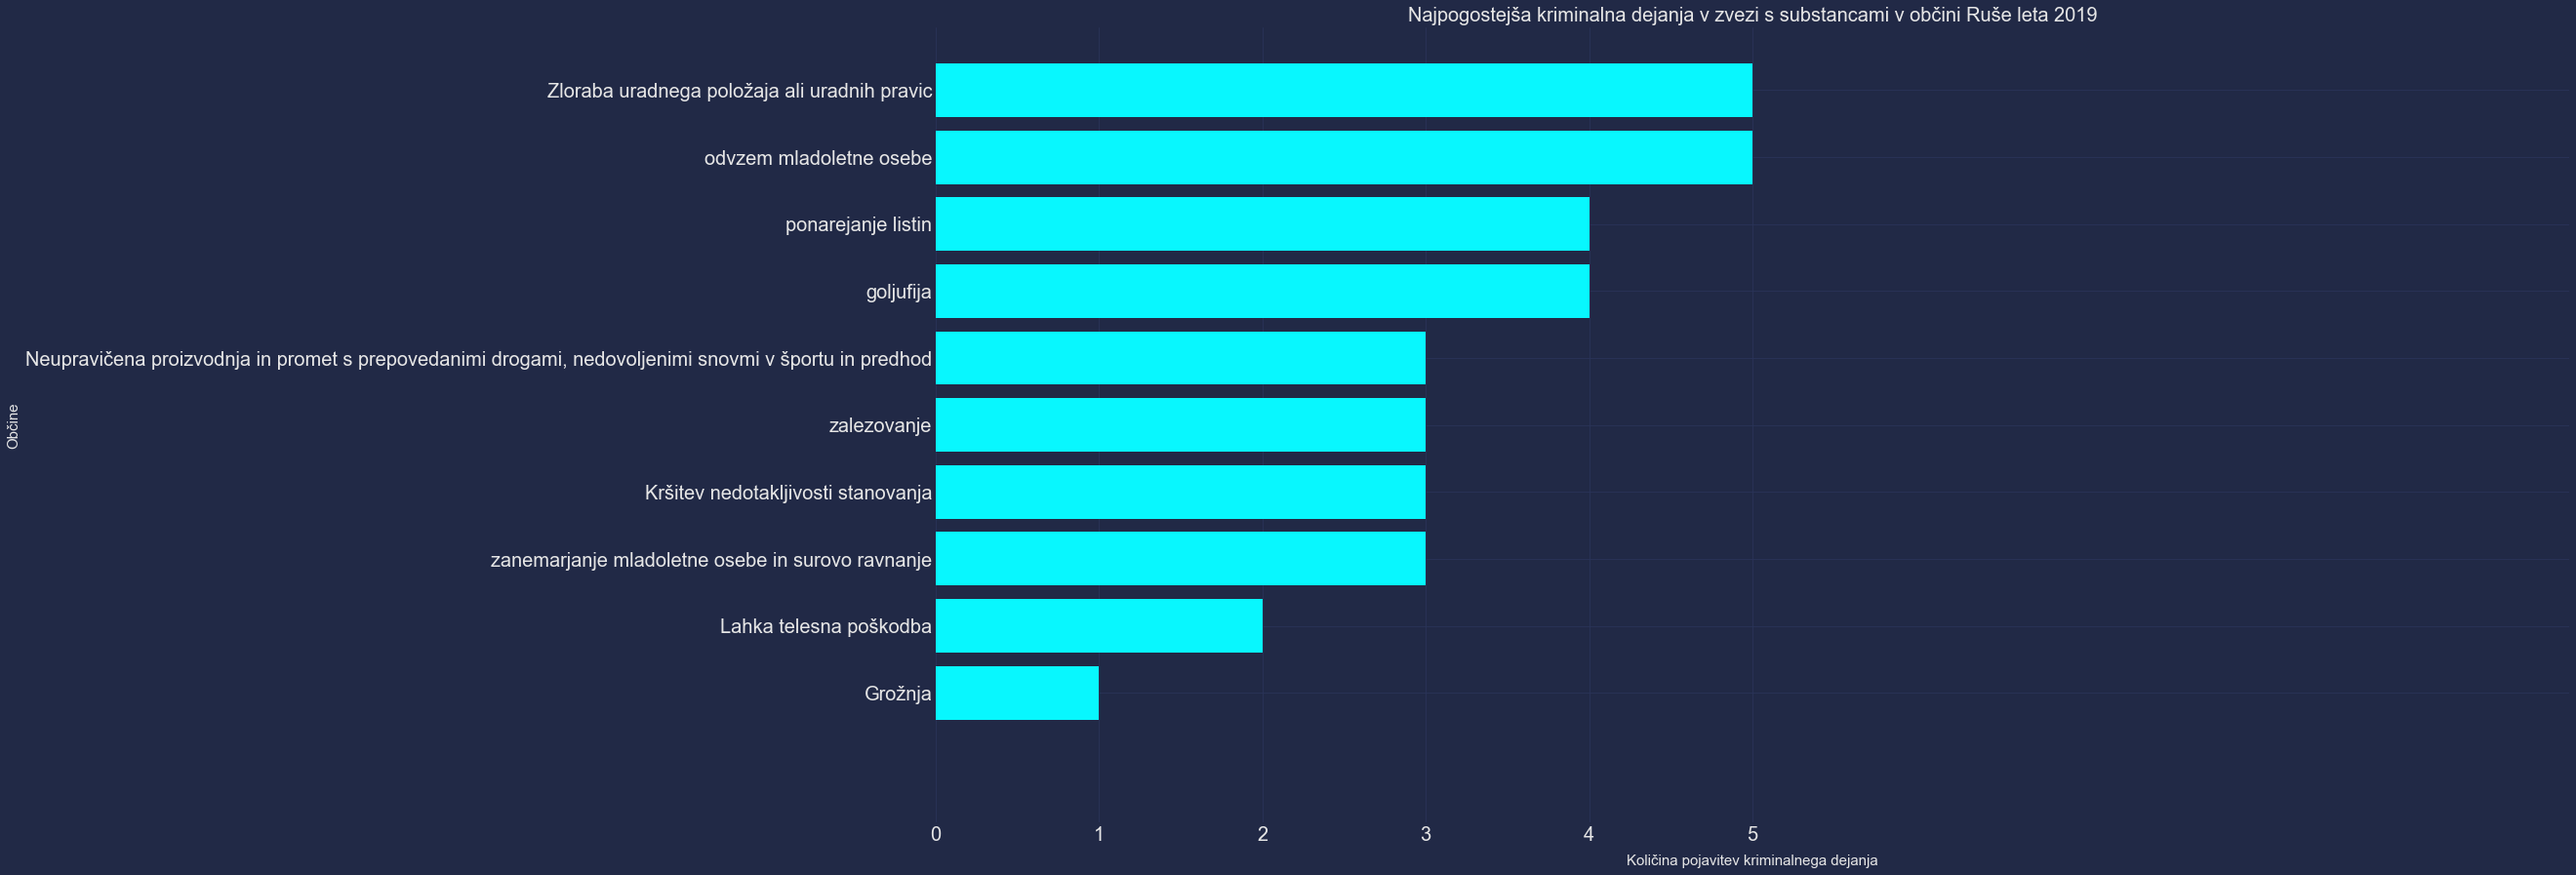

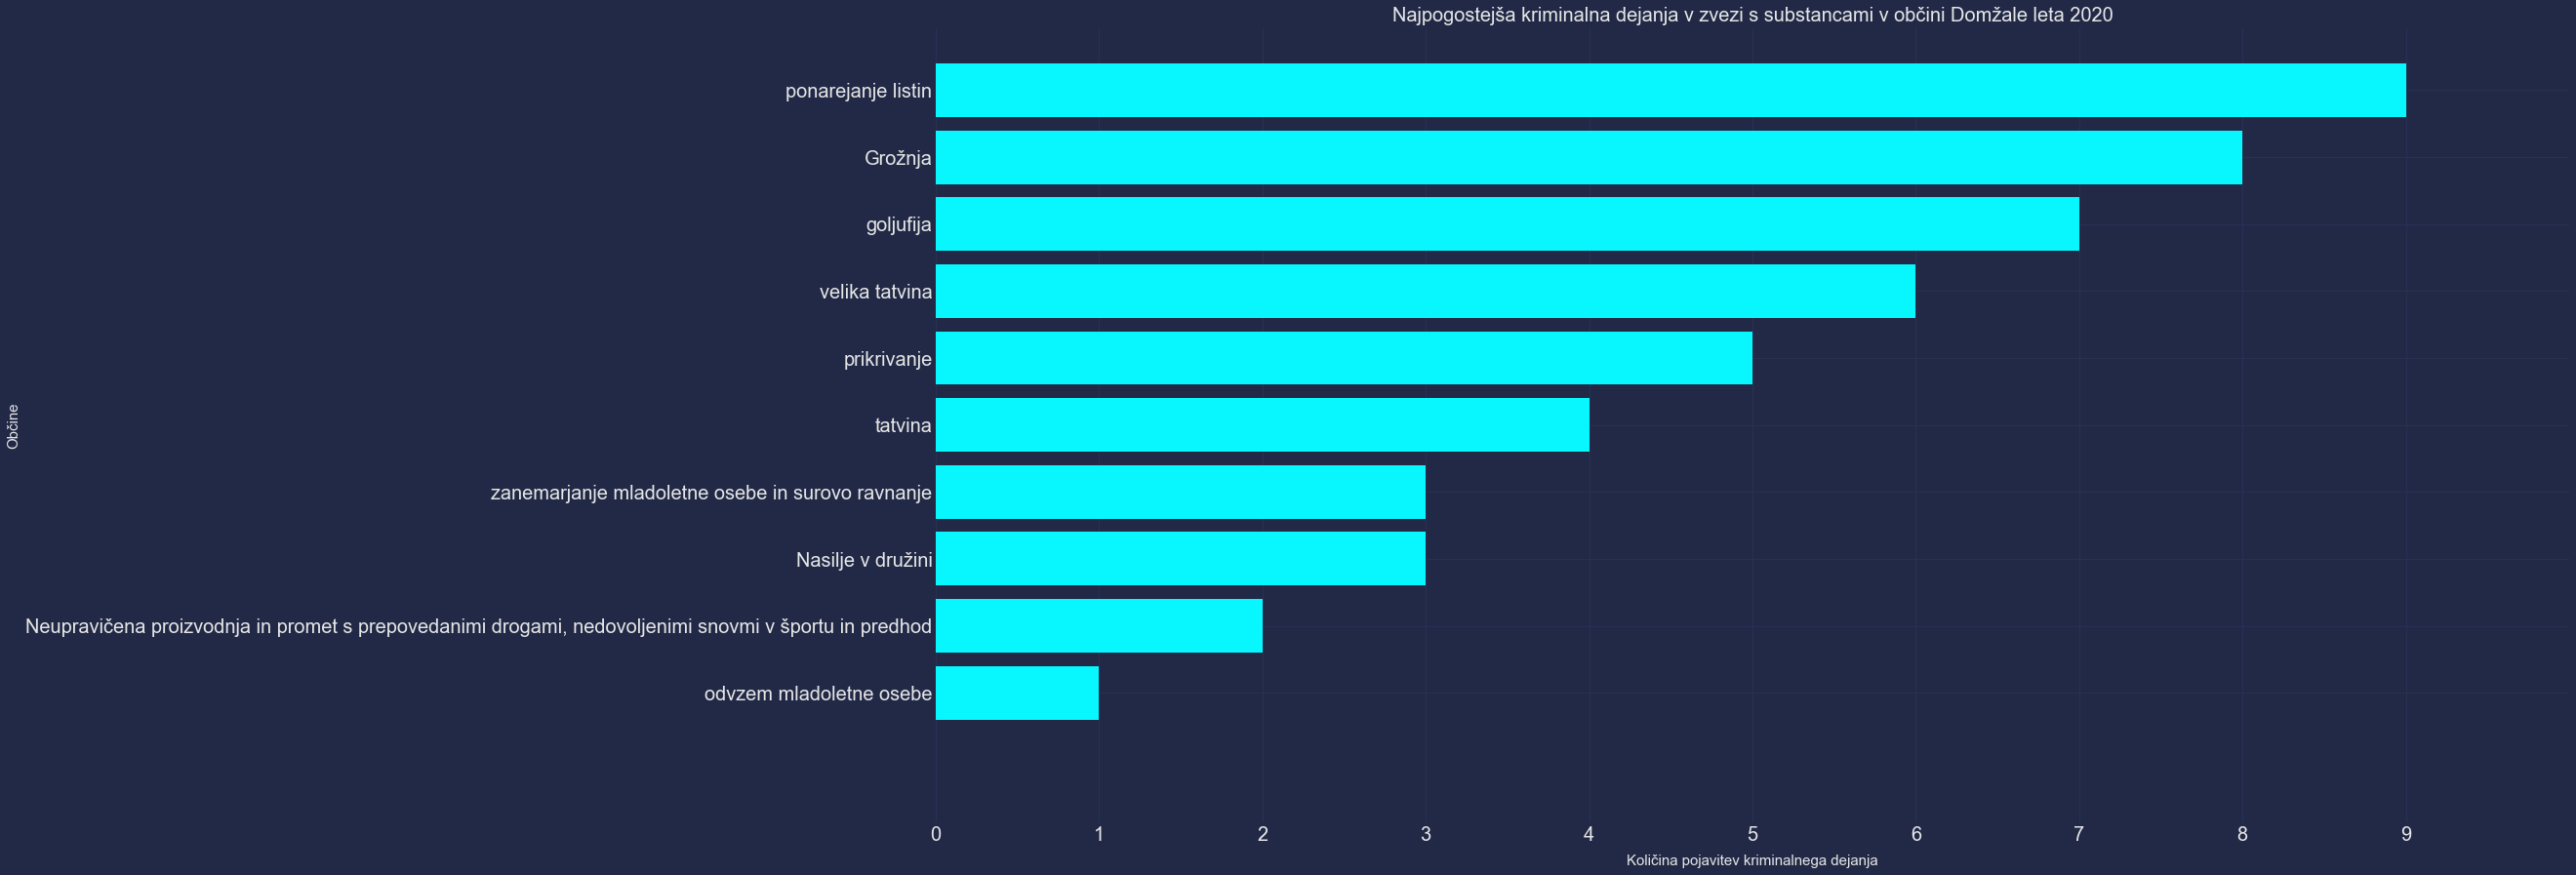

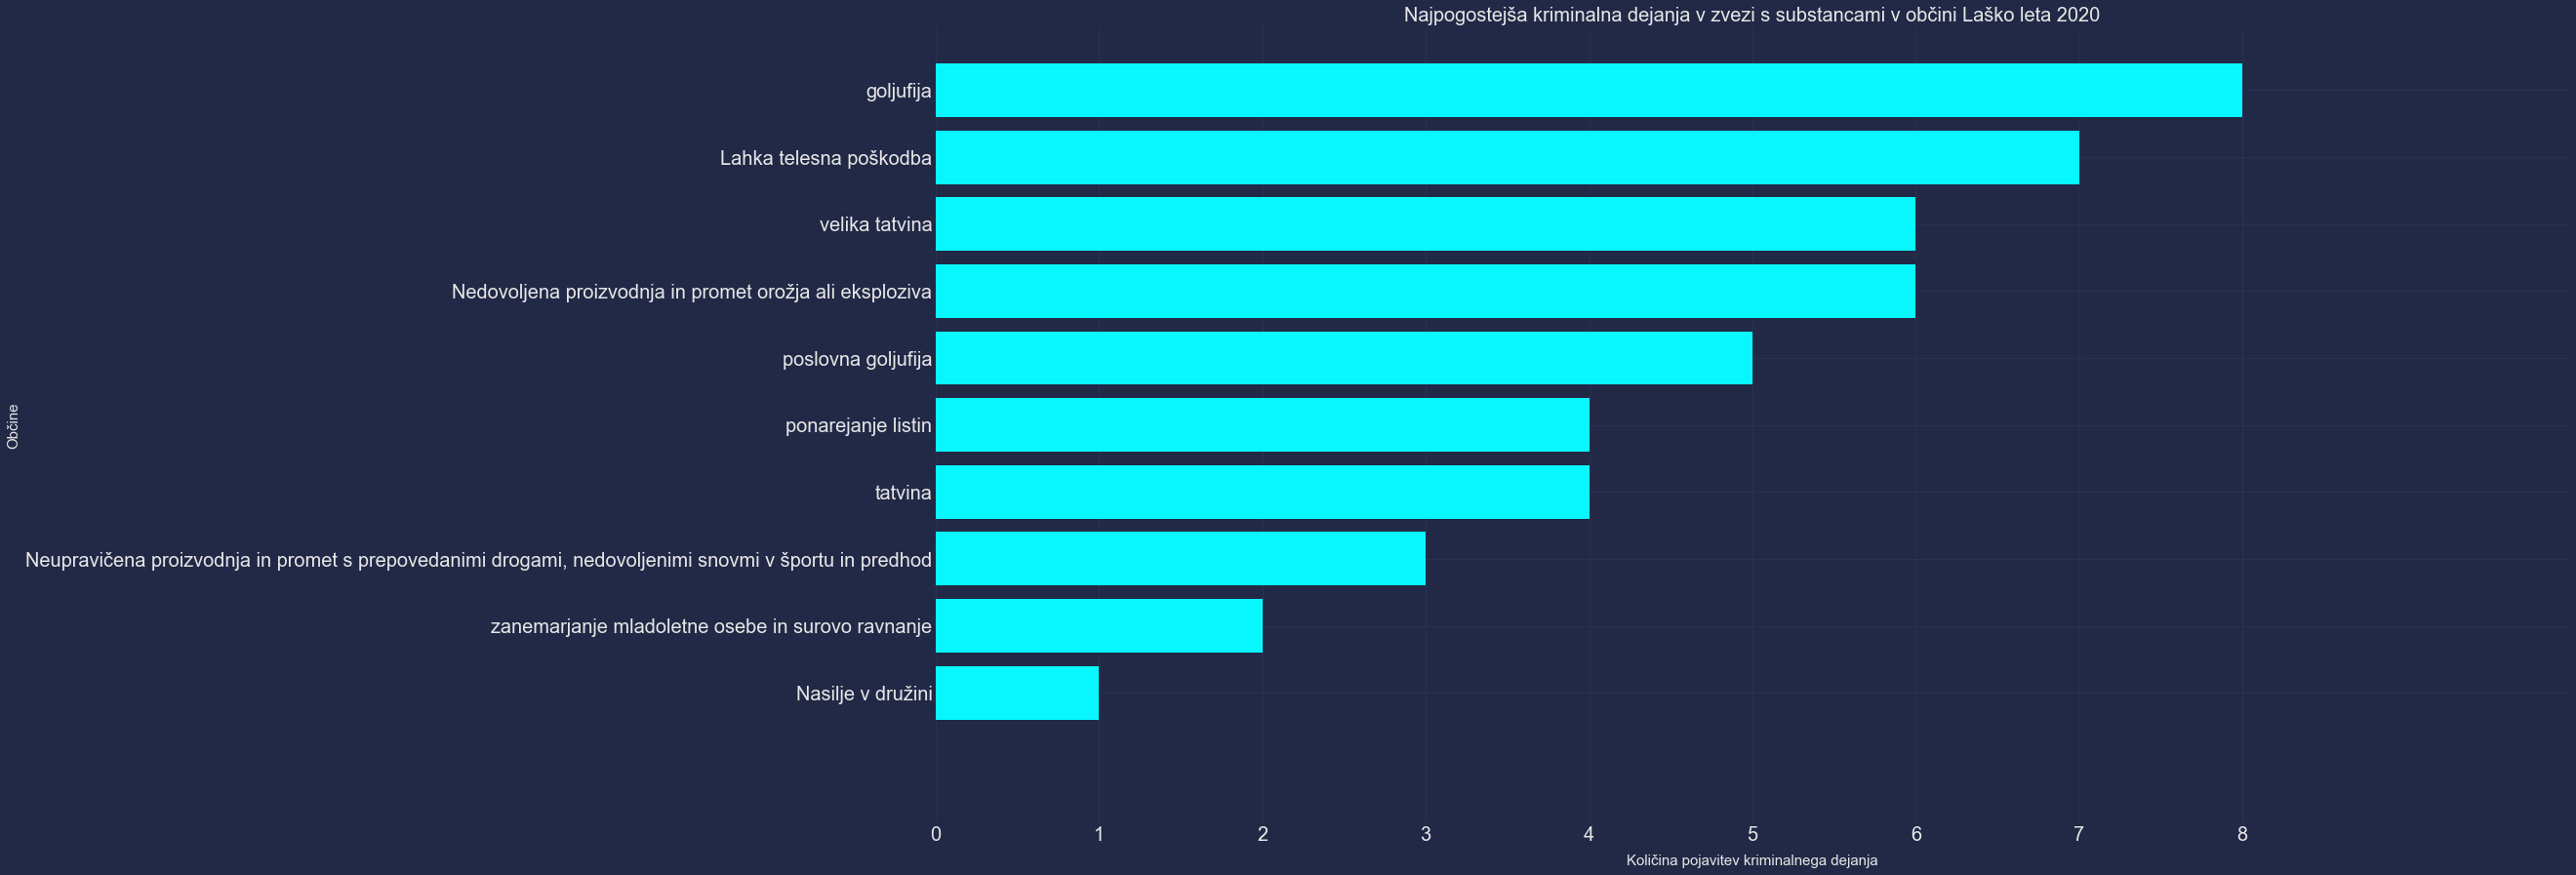

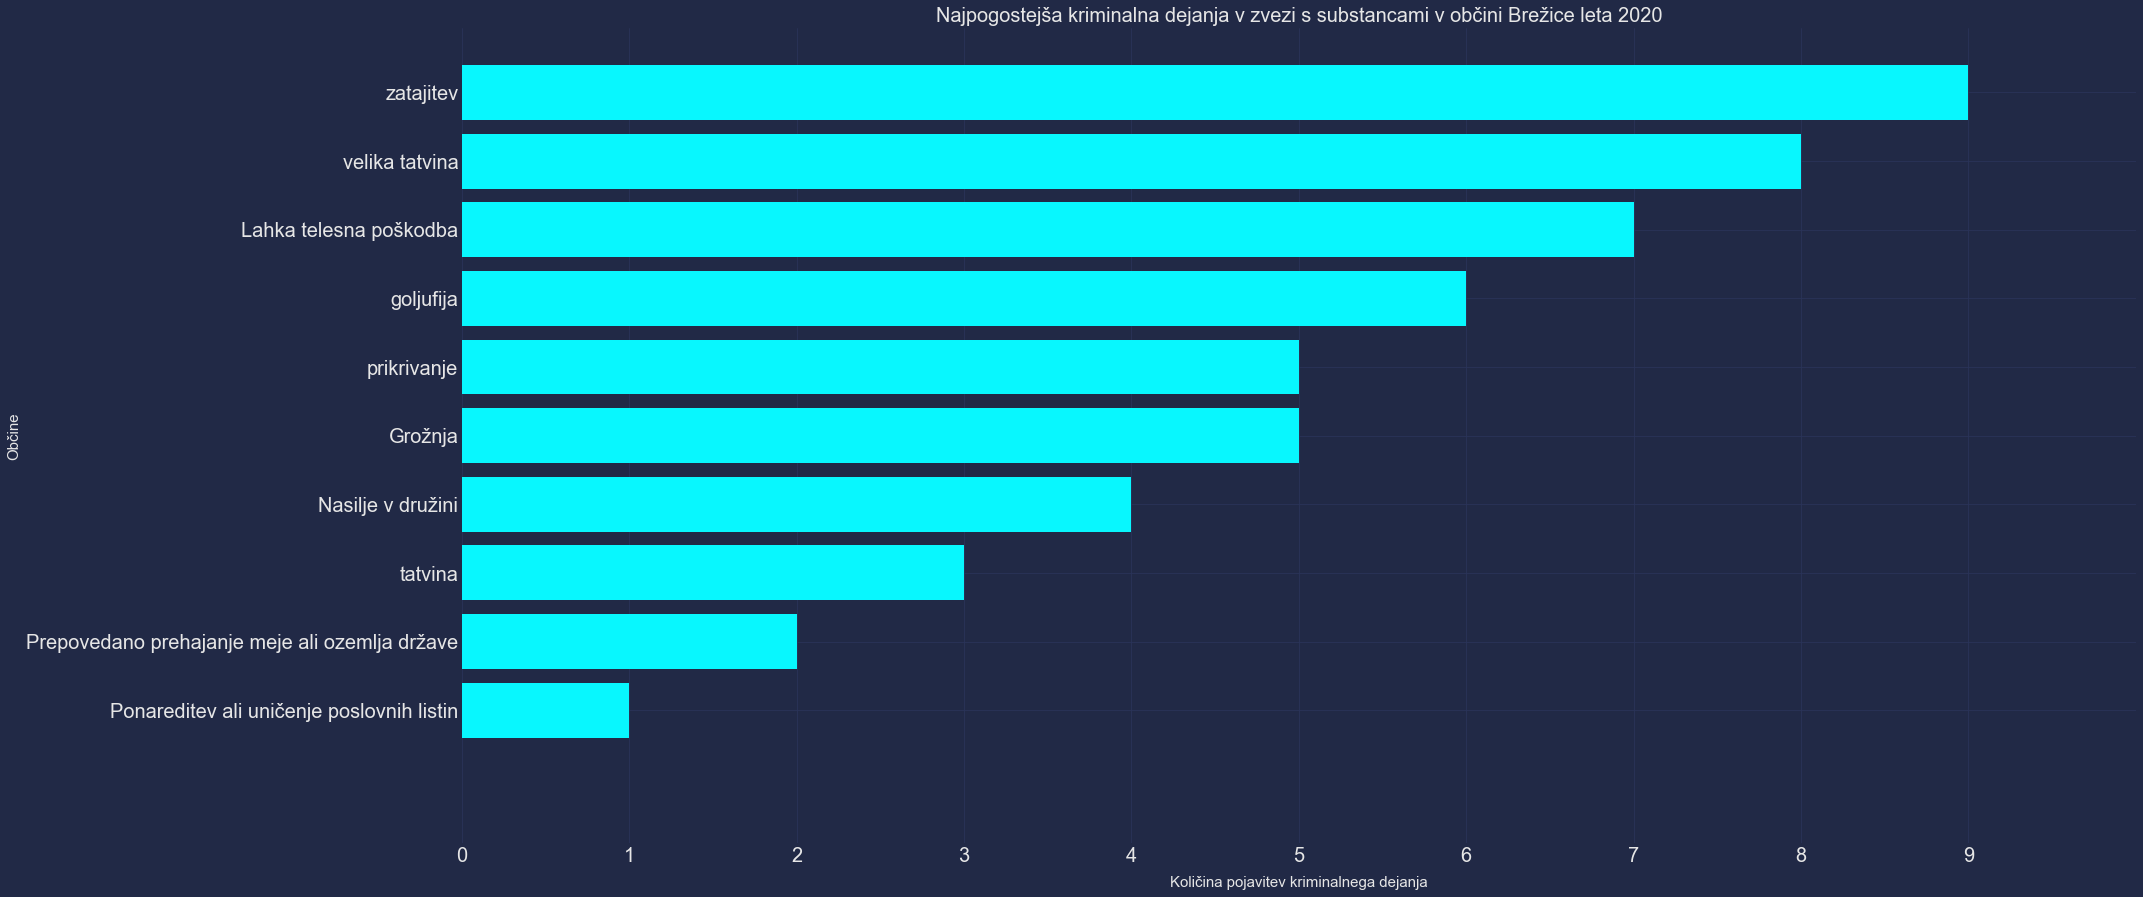

C:\Users\Irinej\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


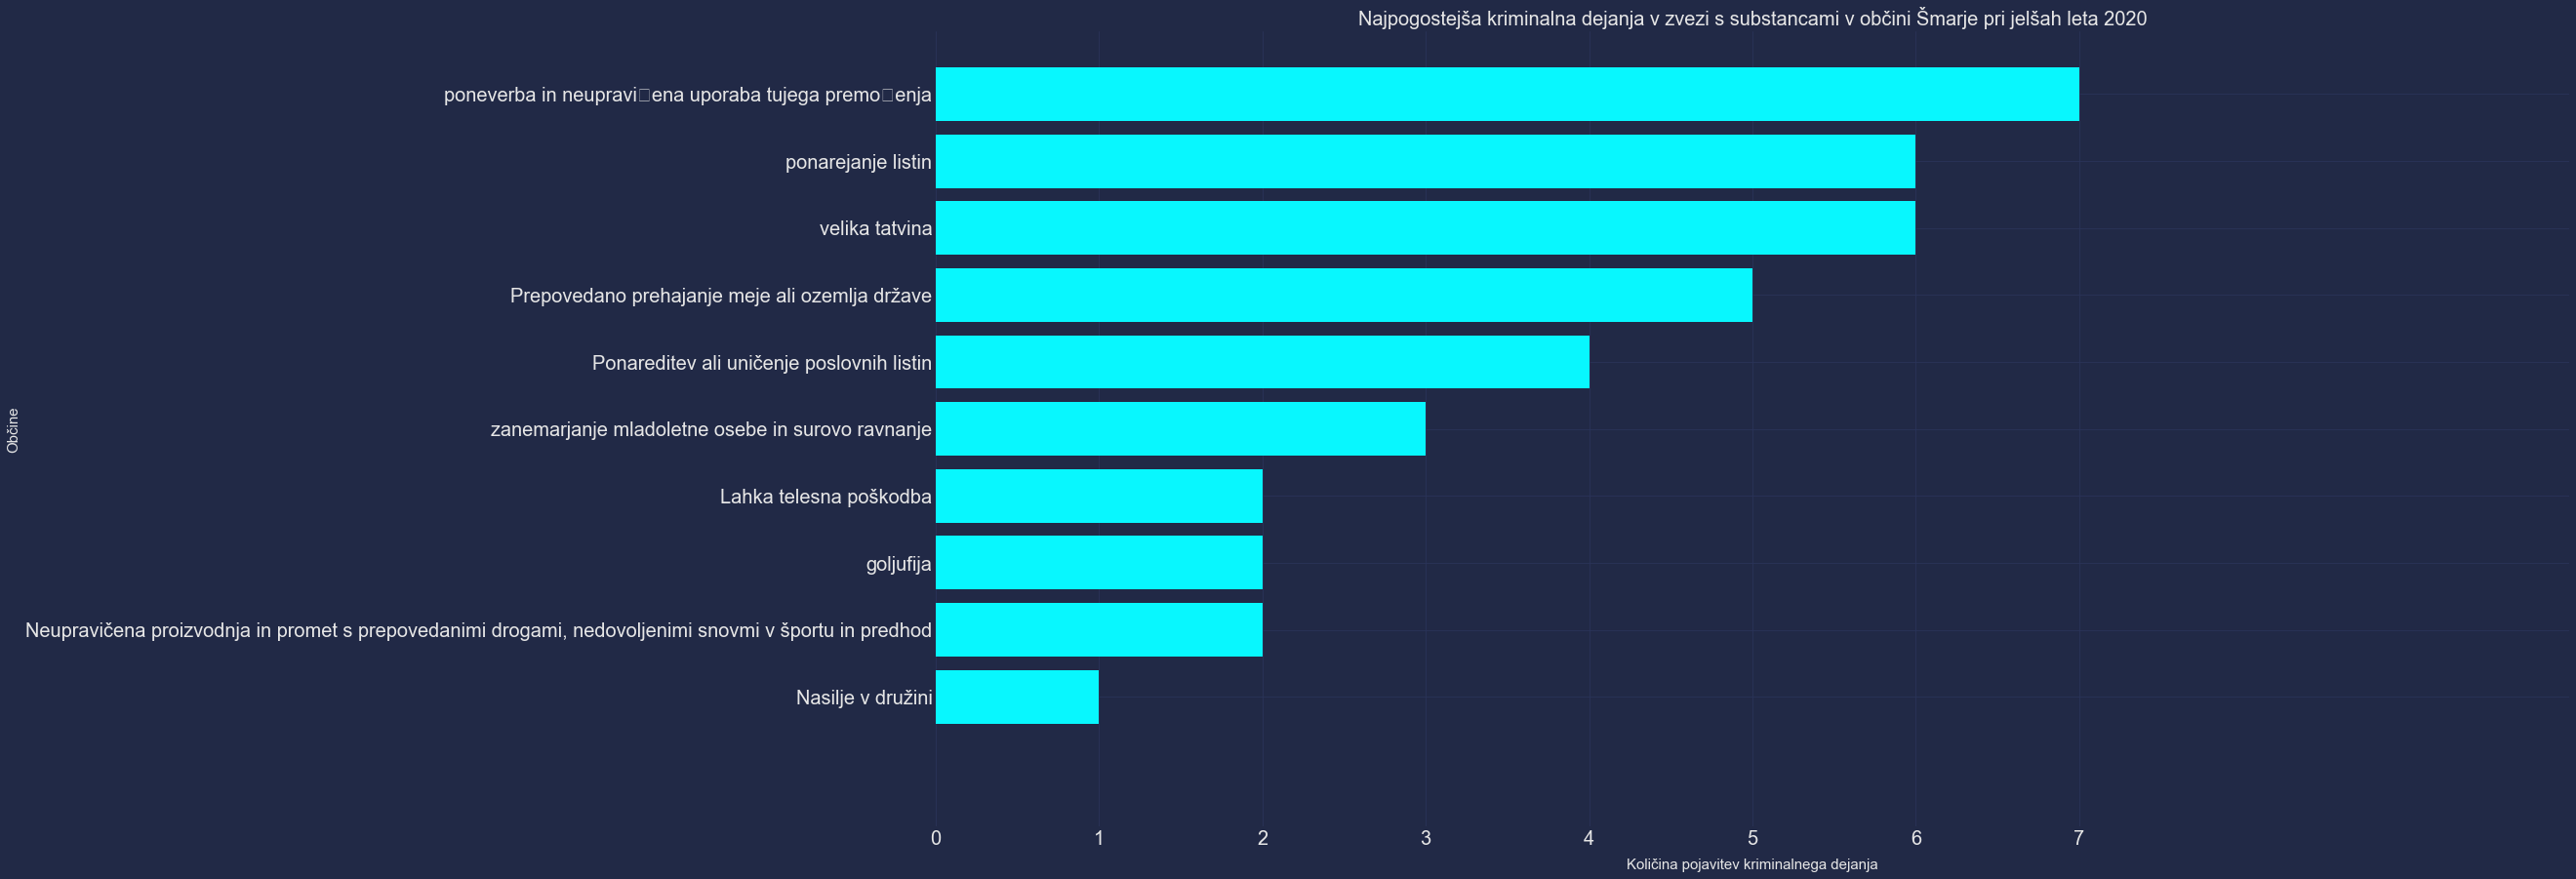

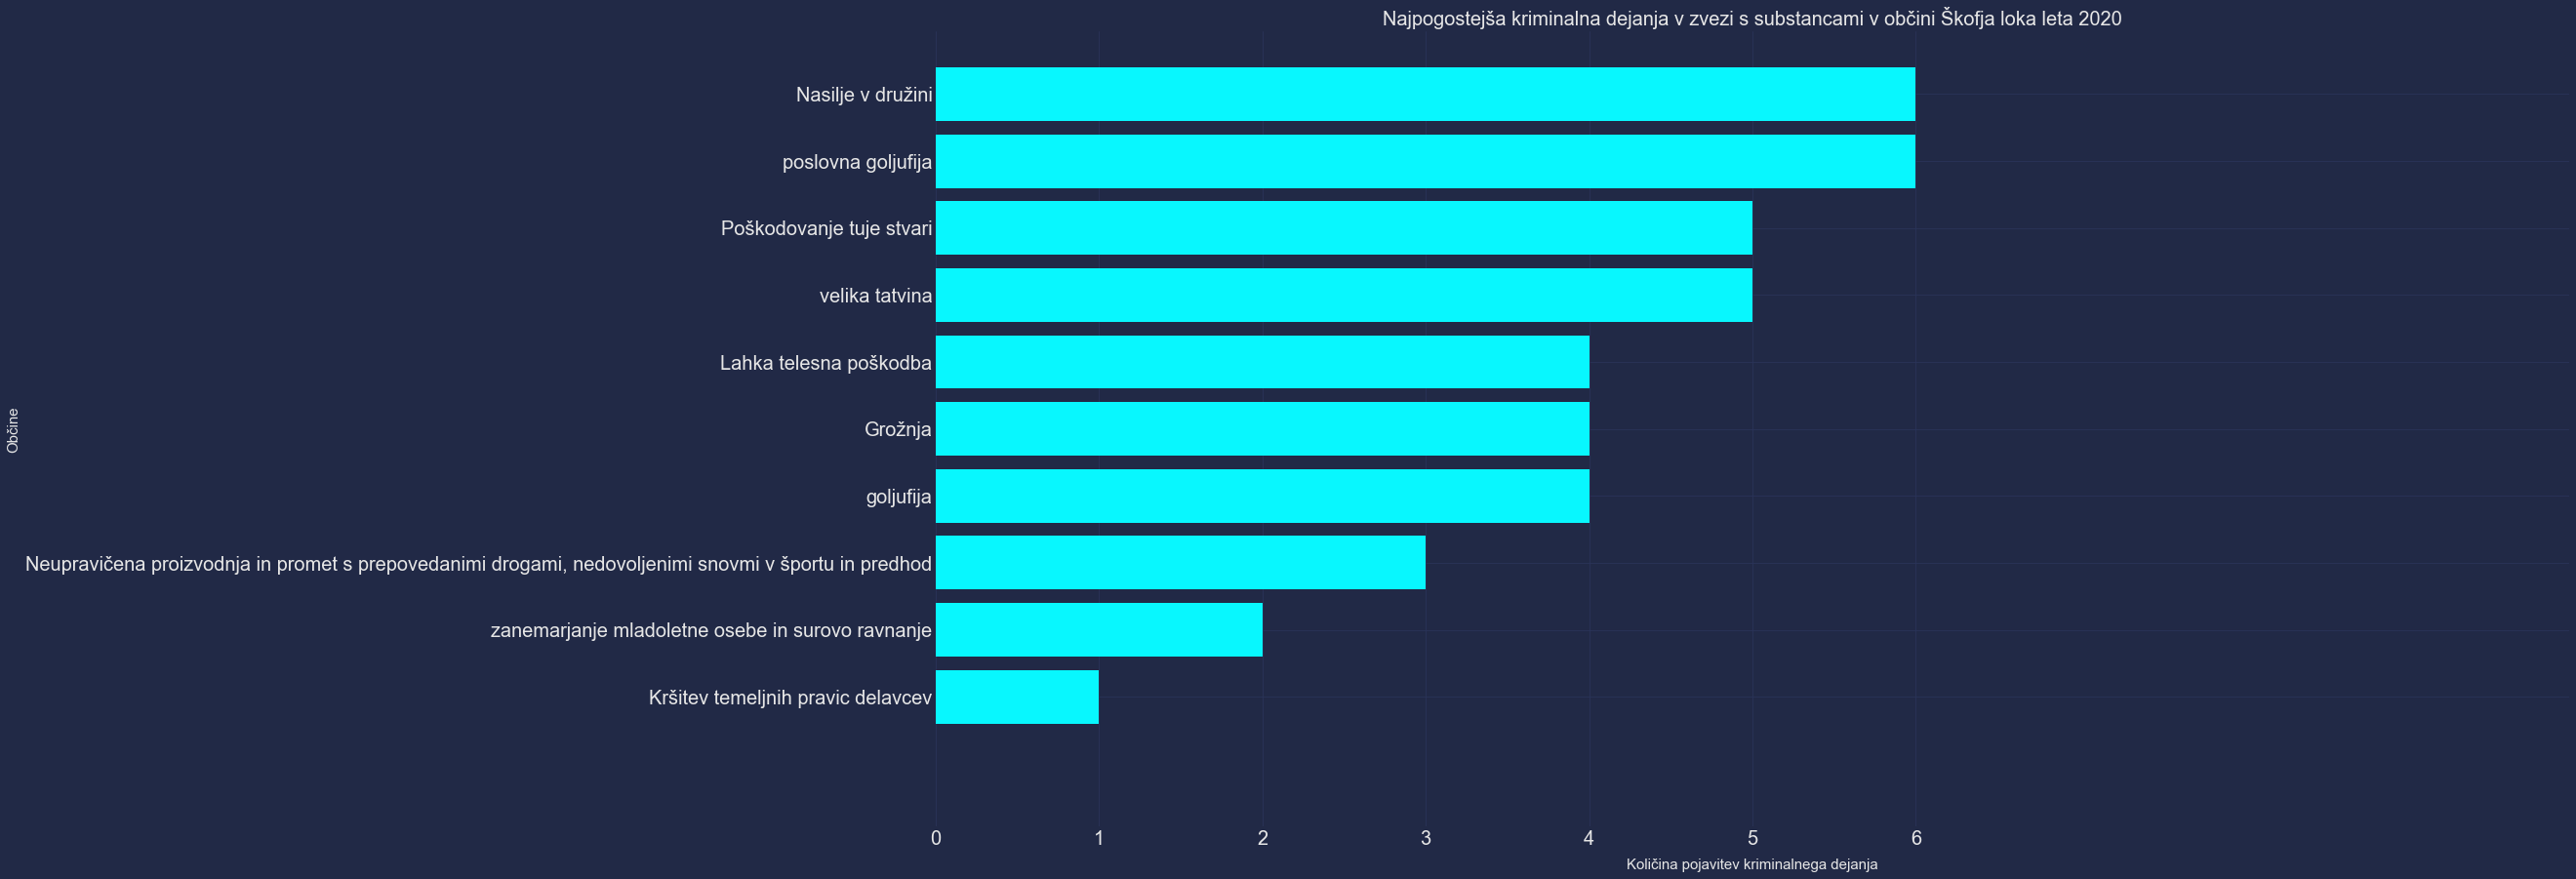

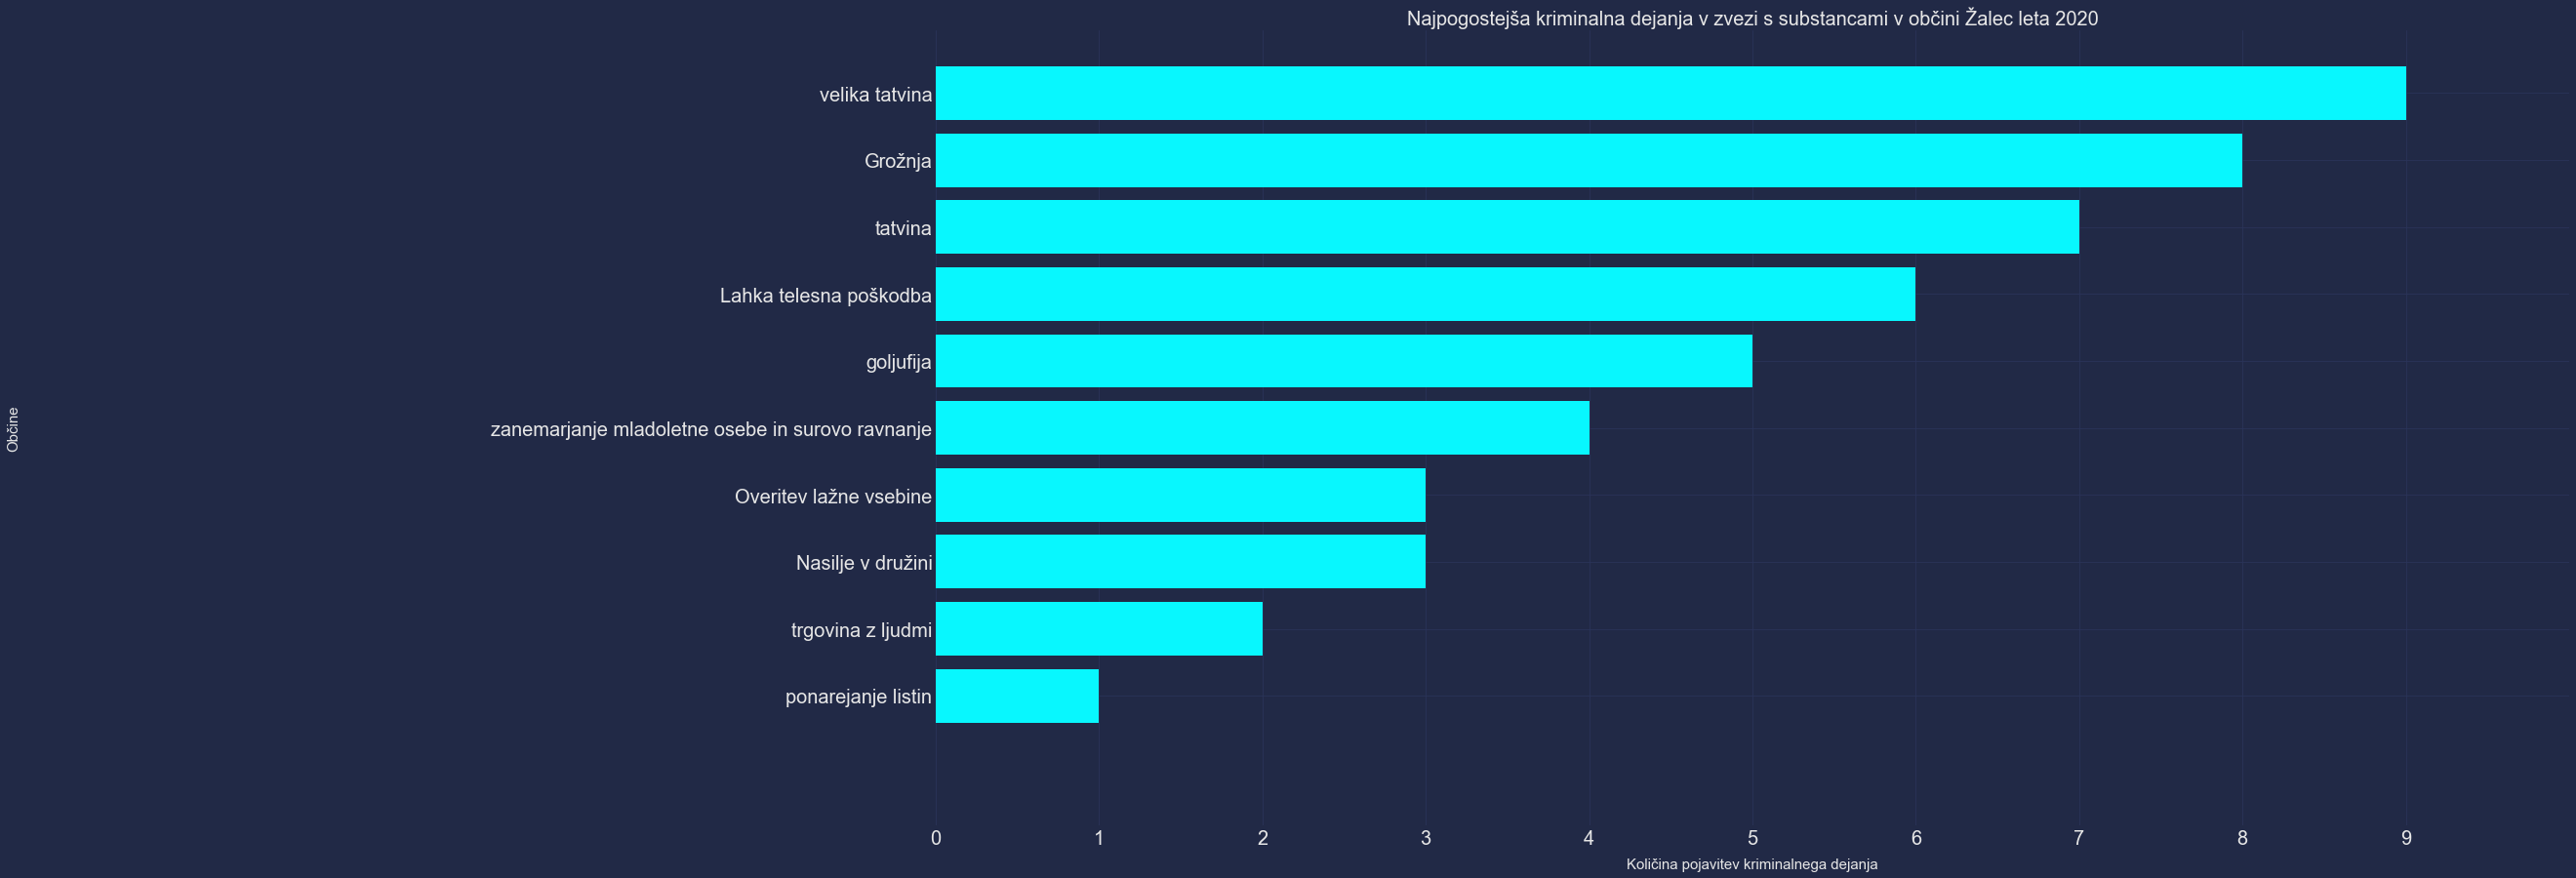

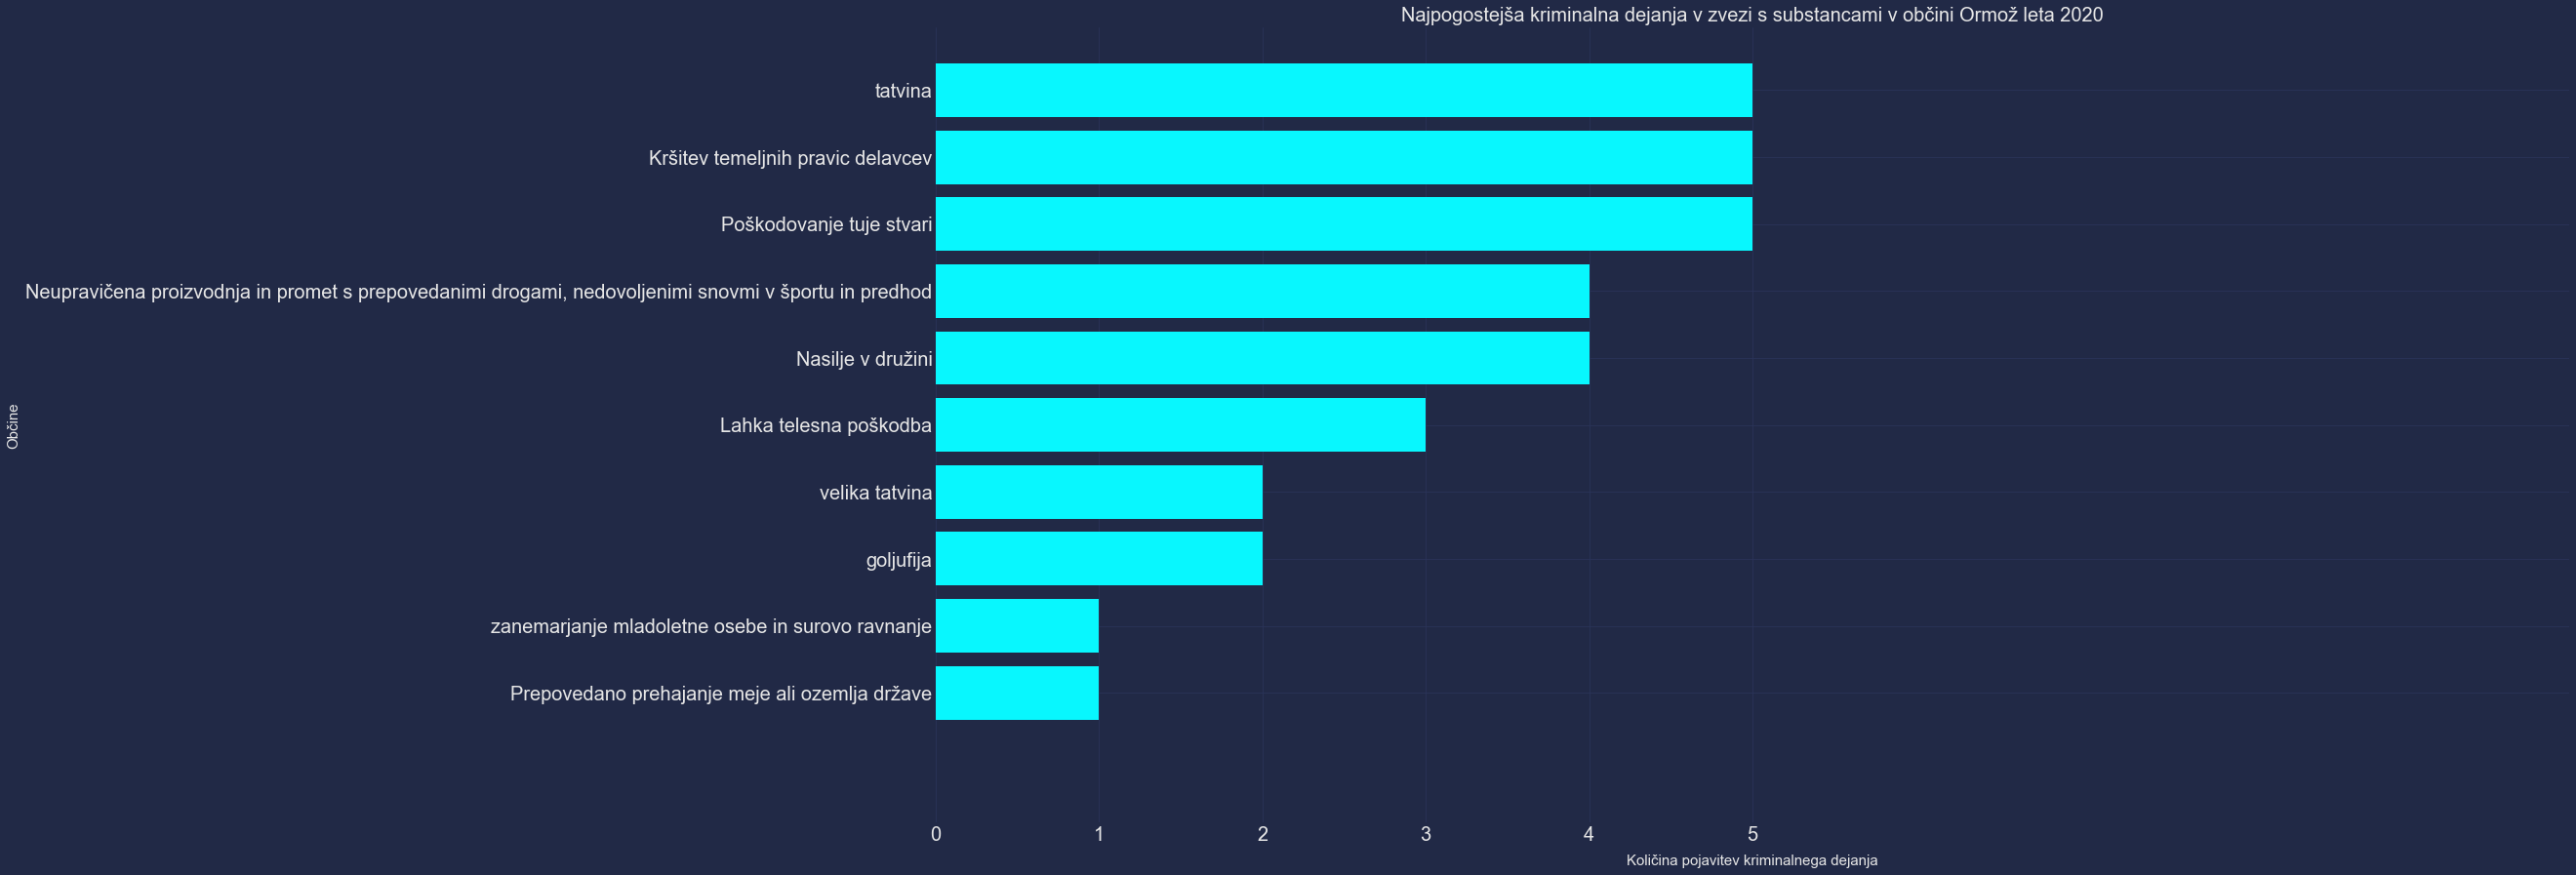

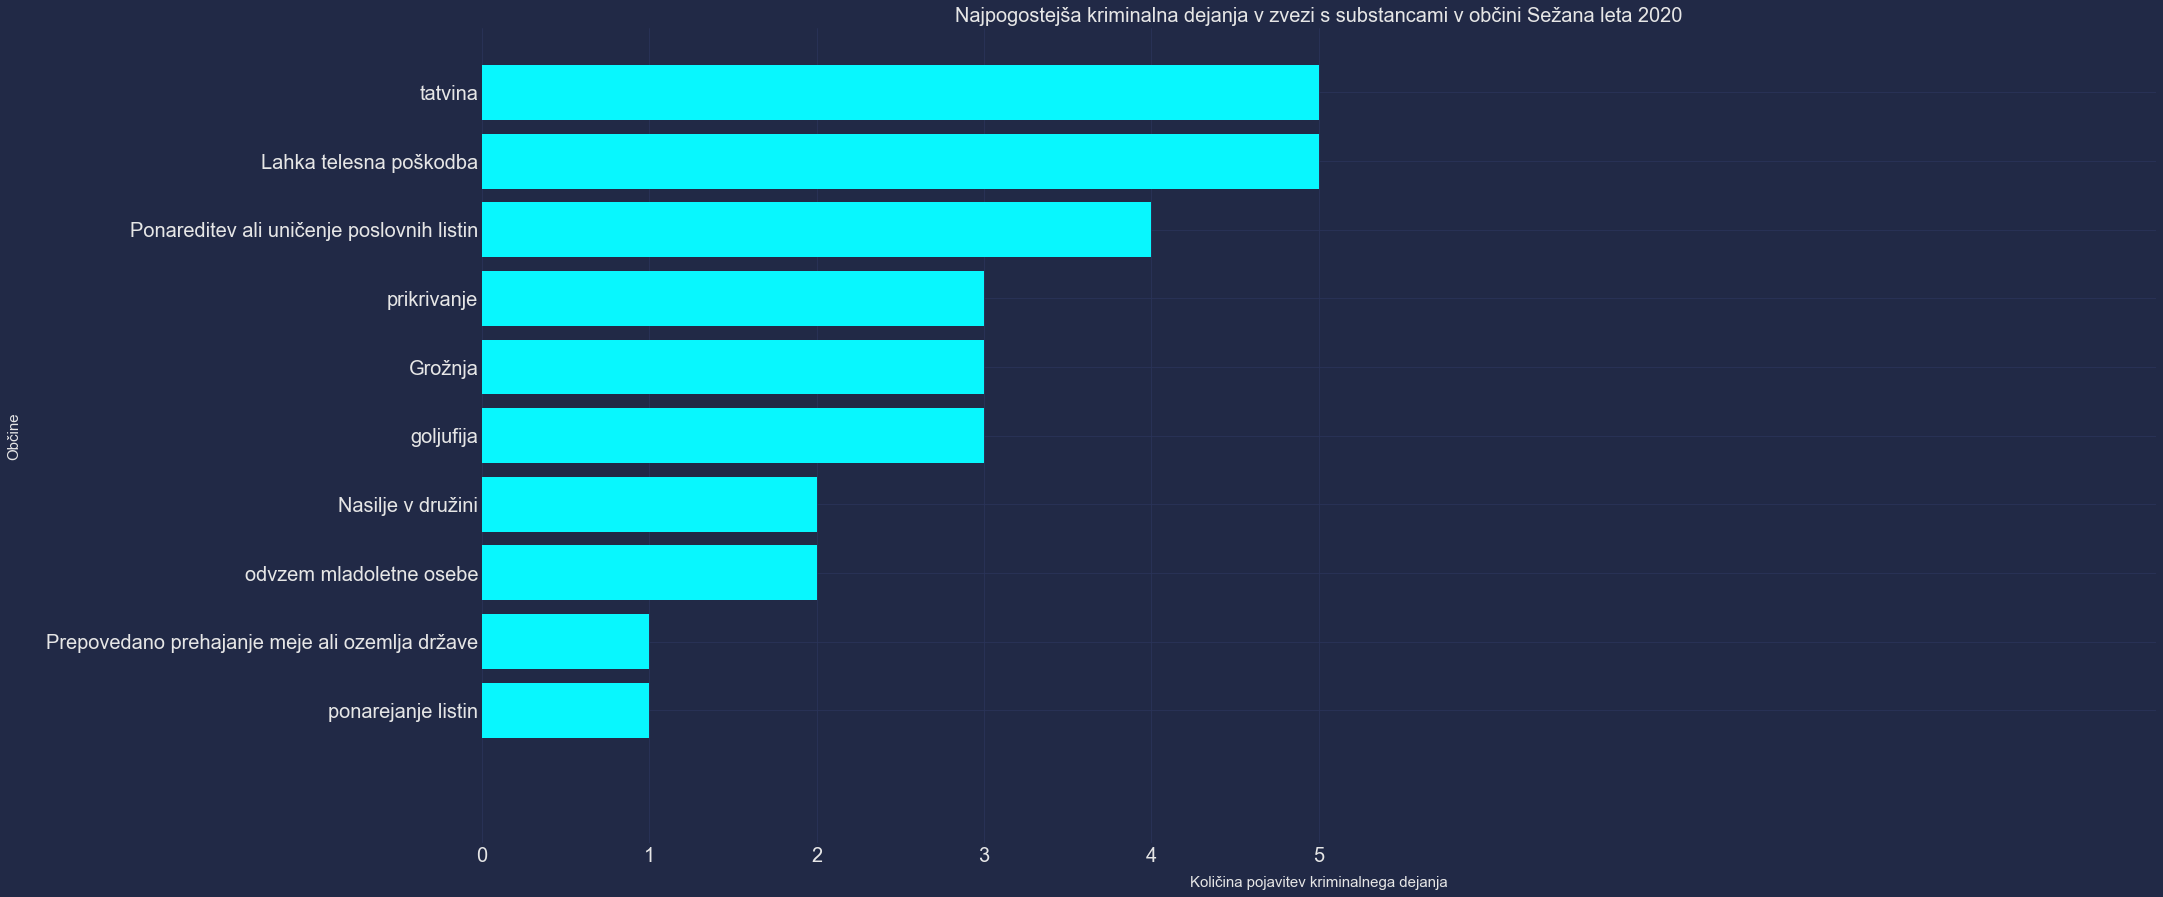

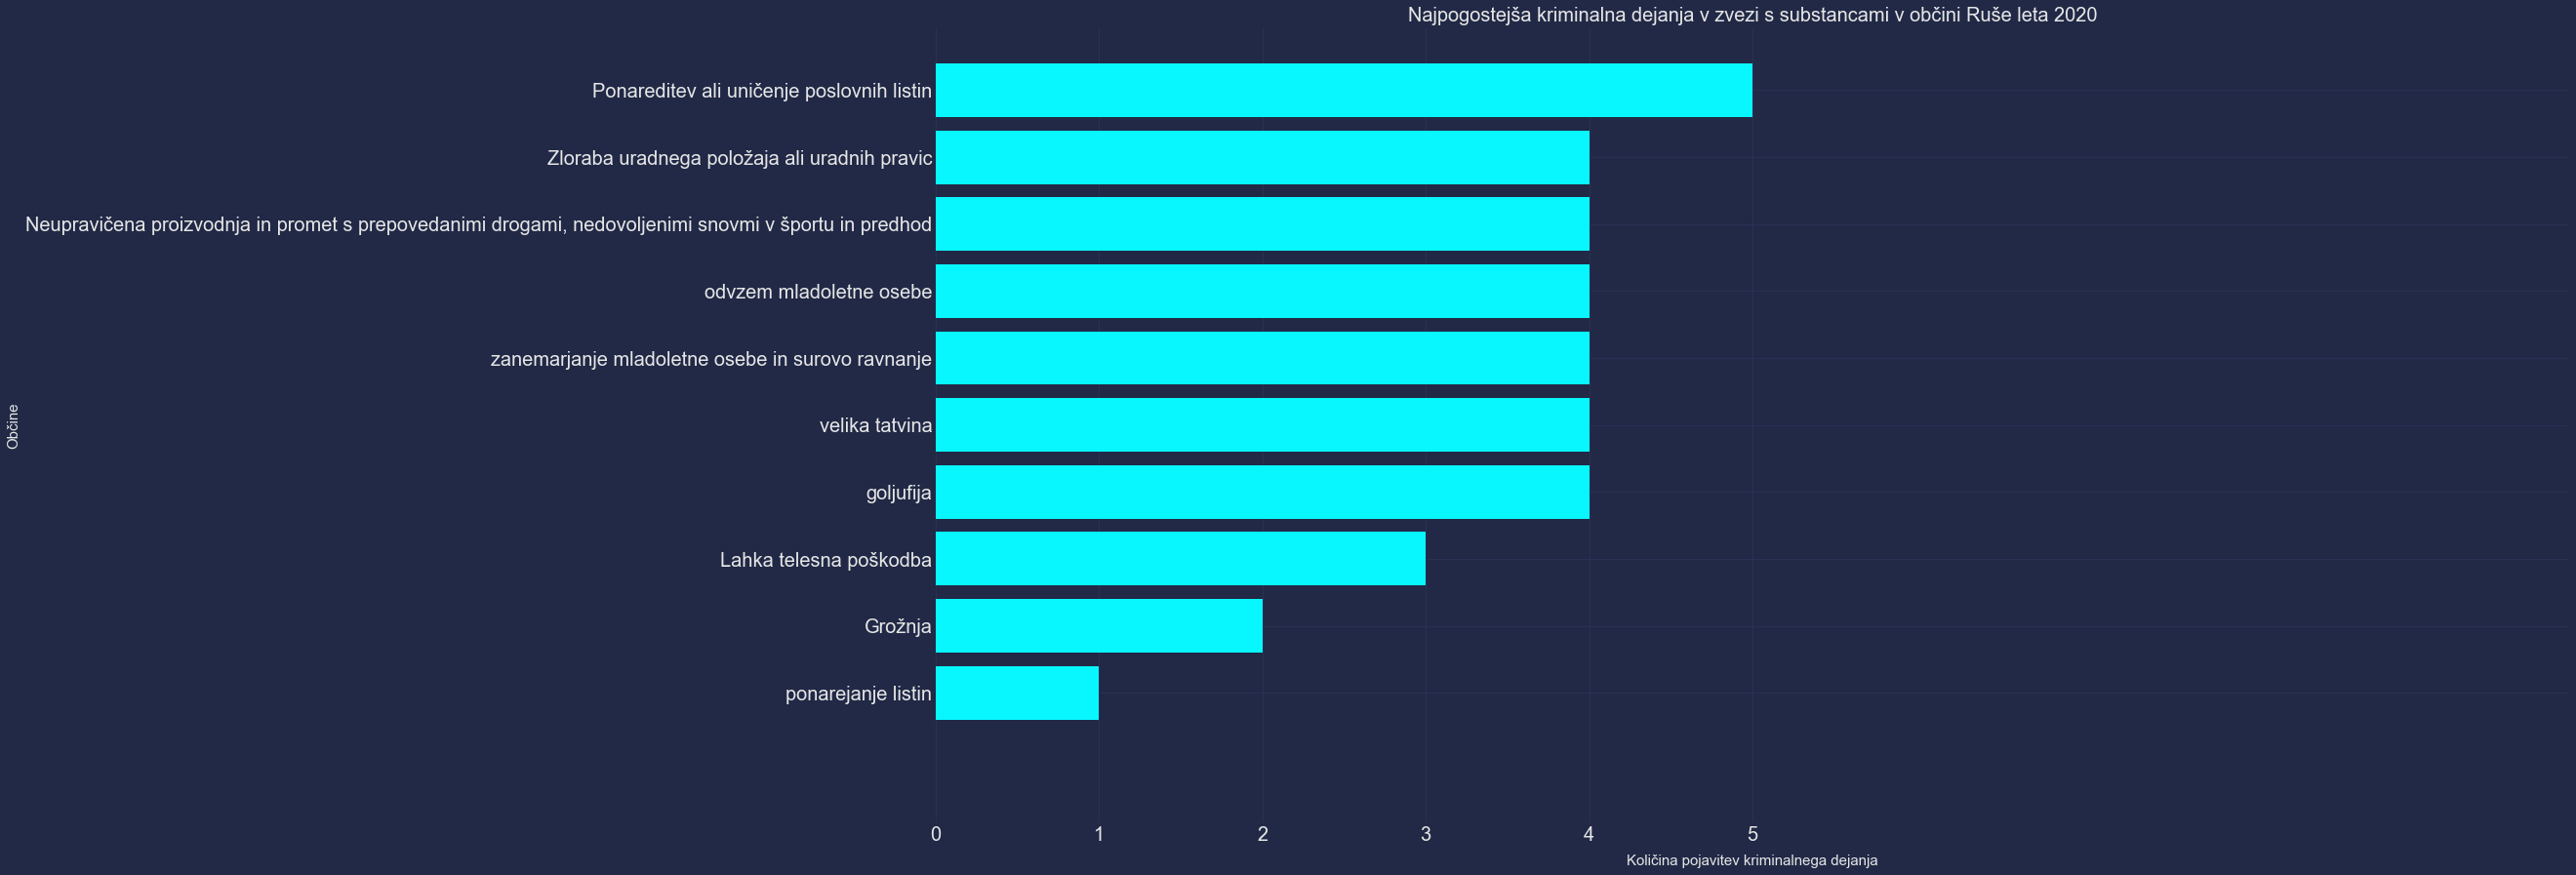

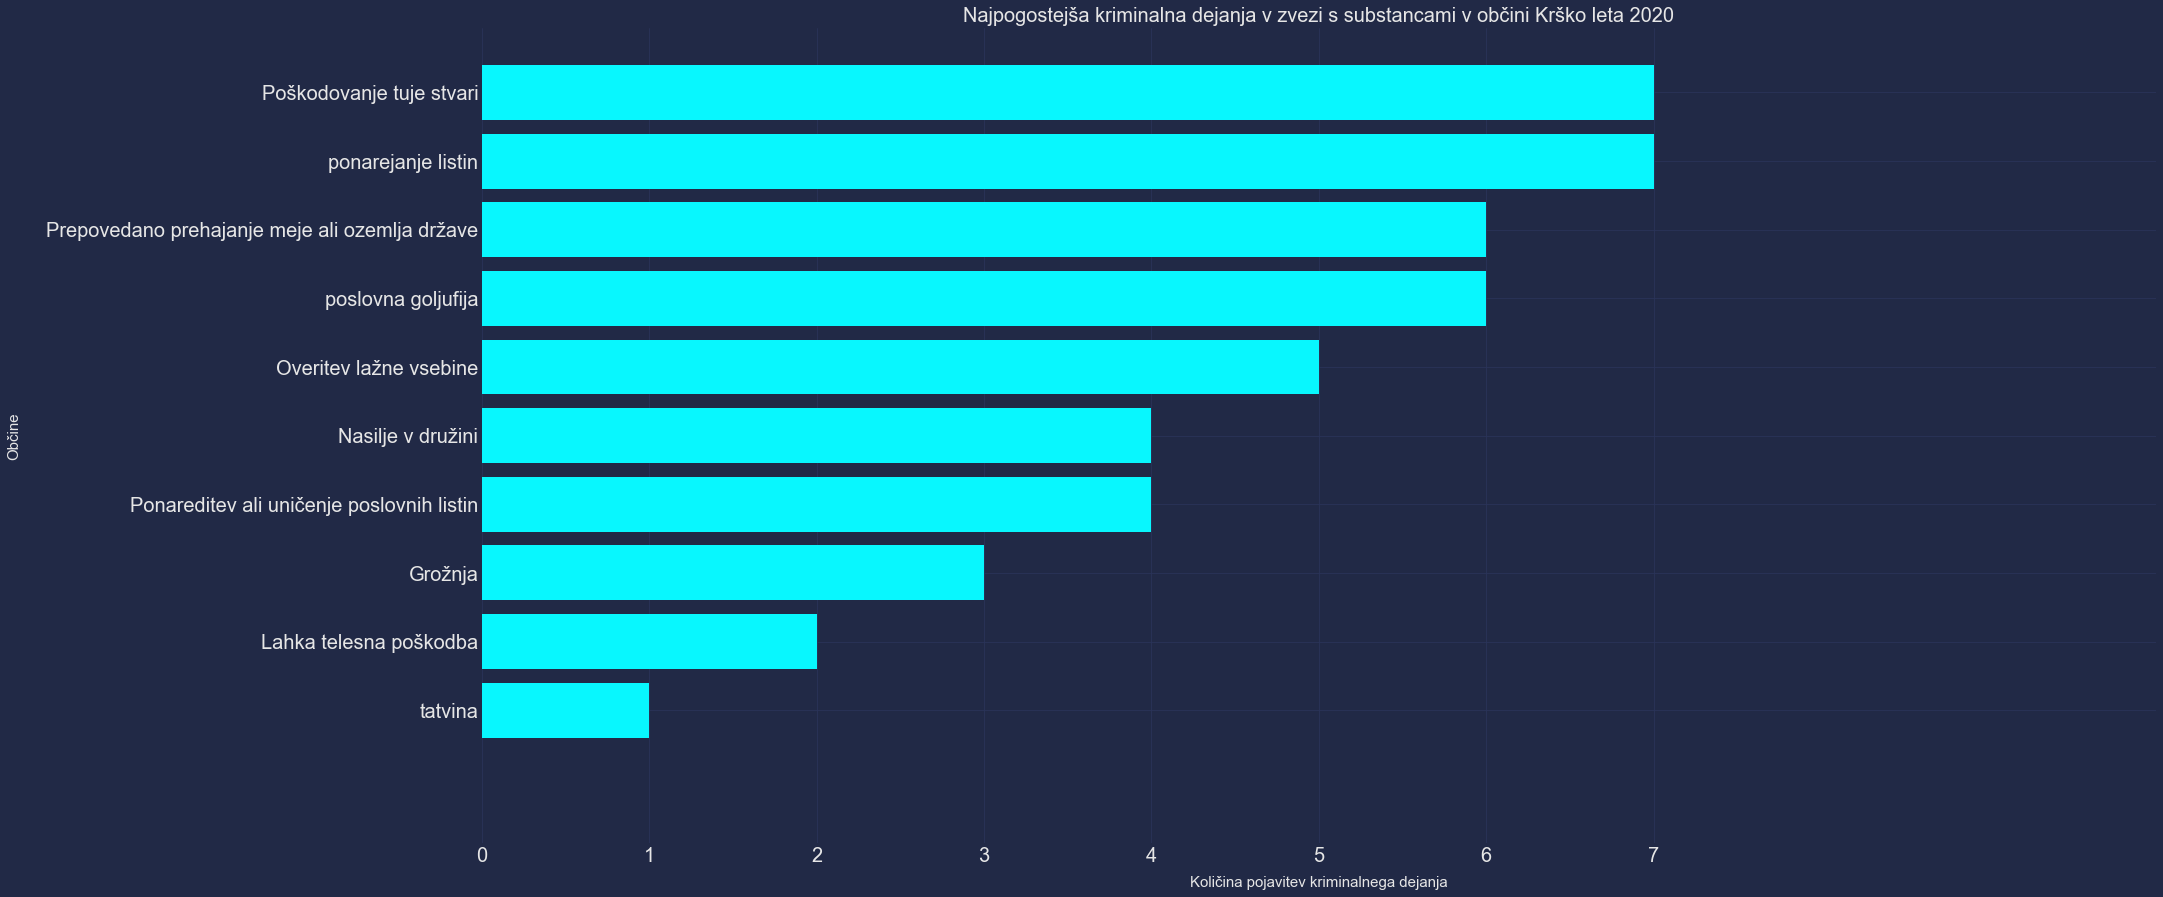

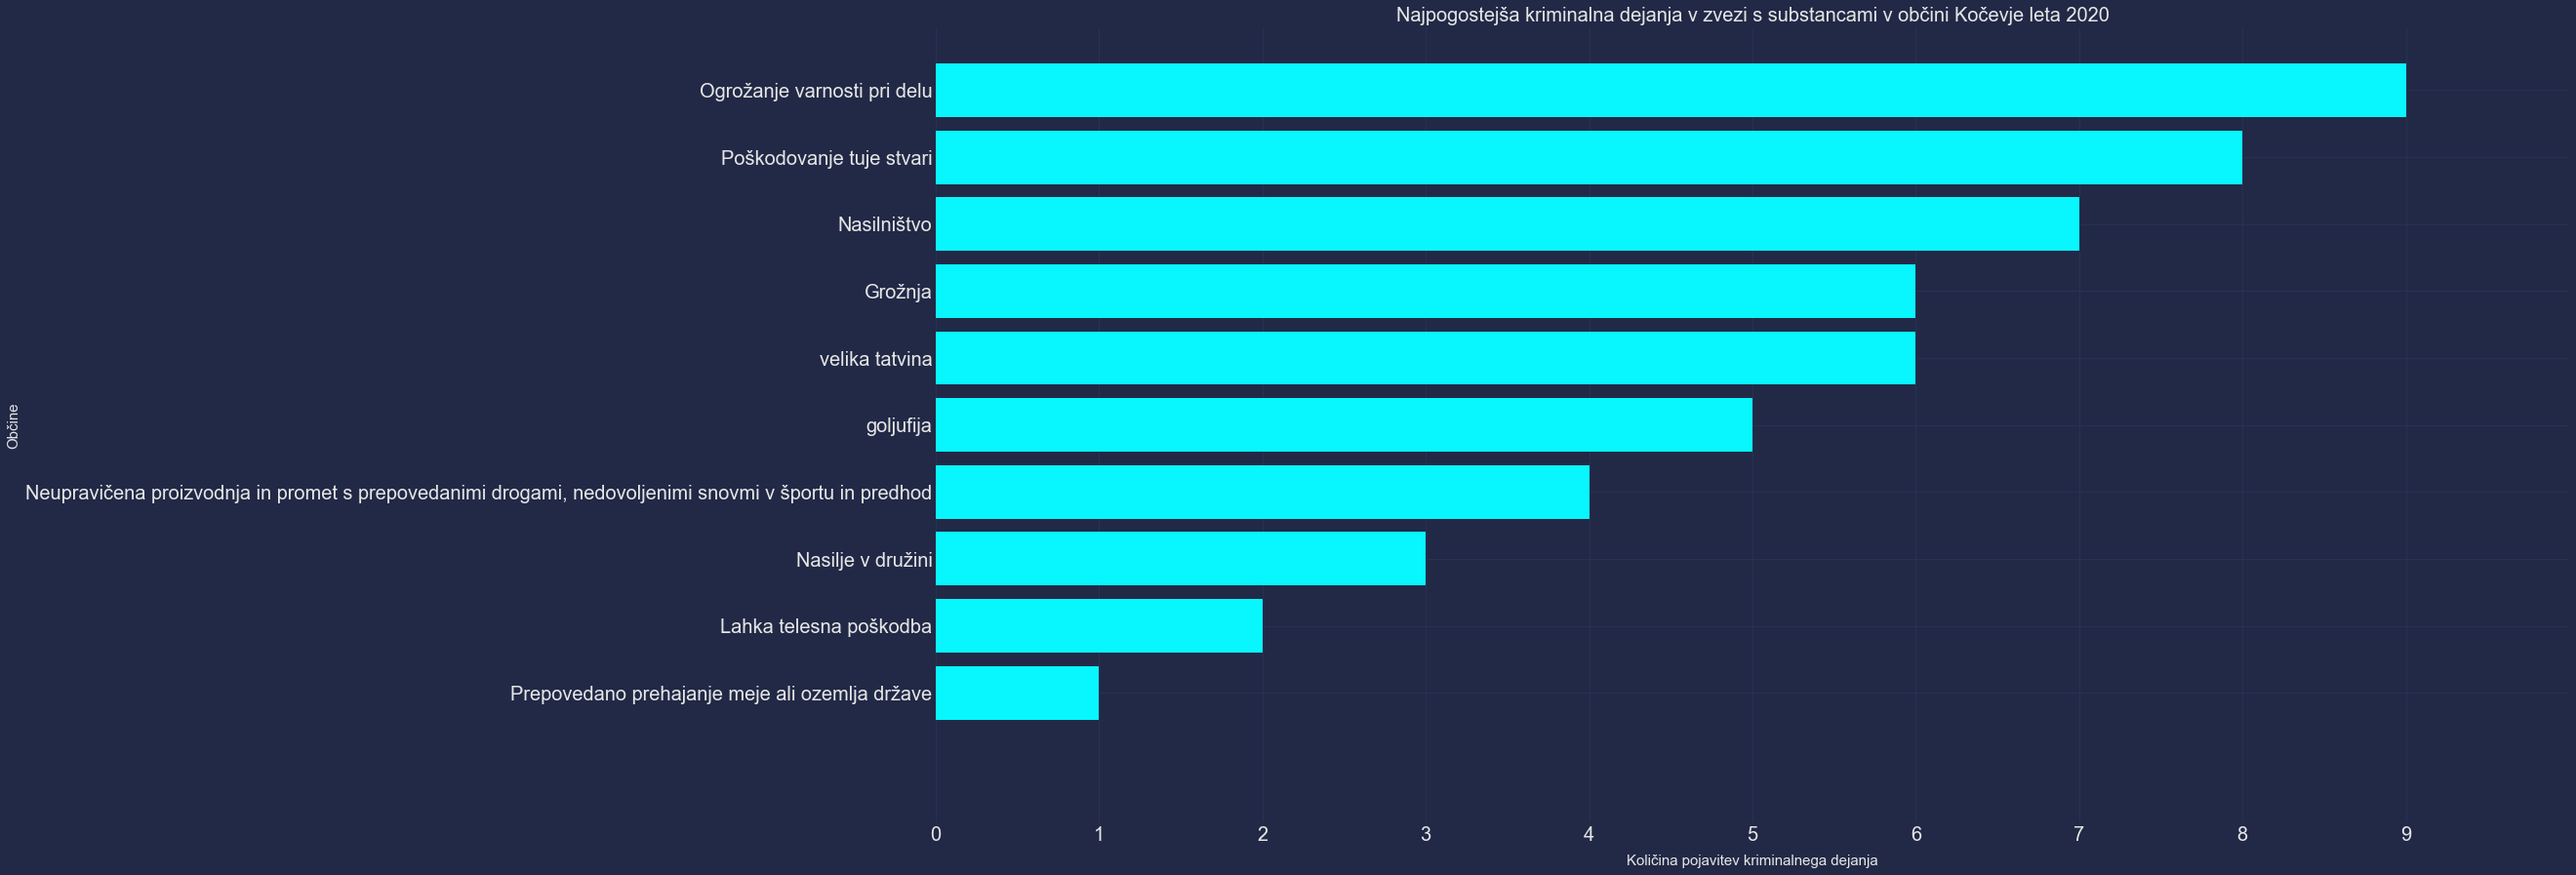

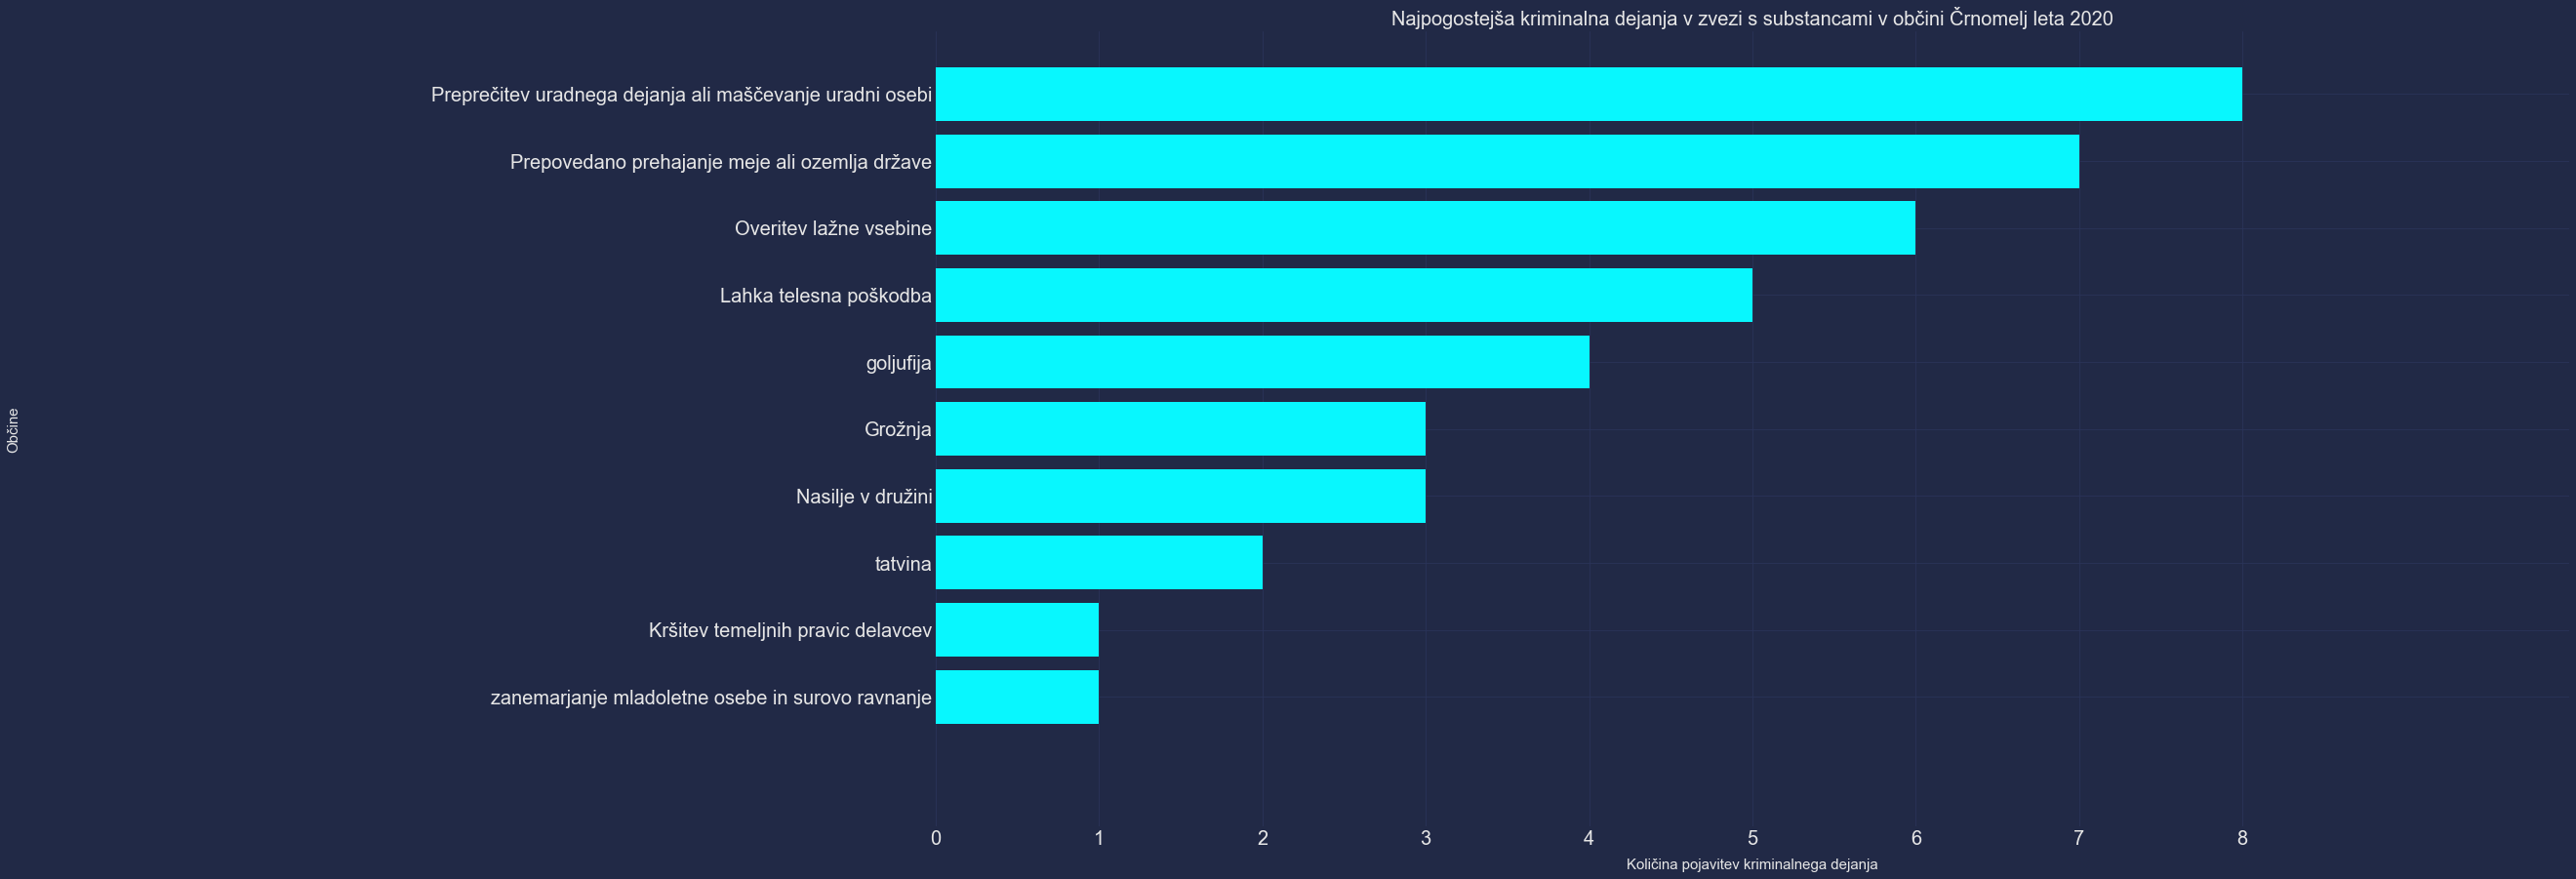

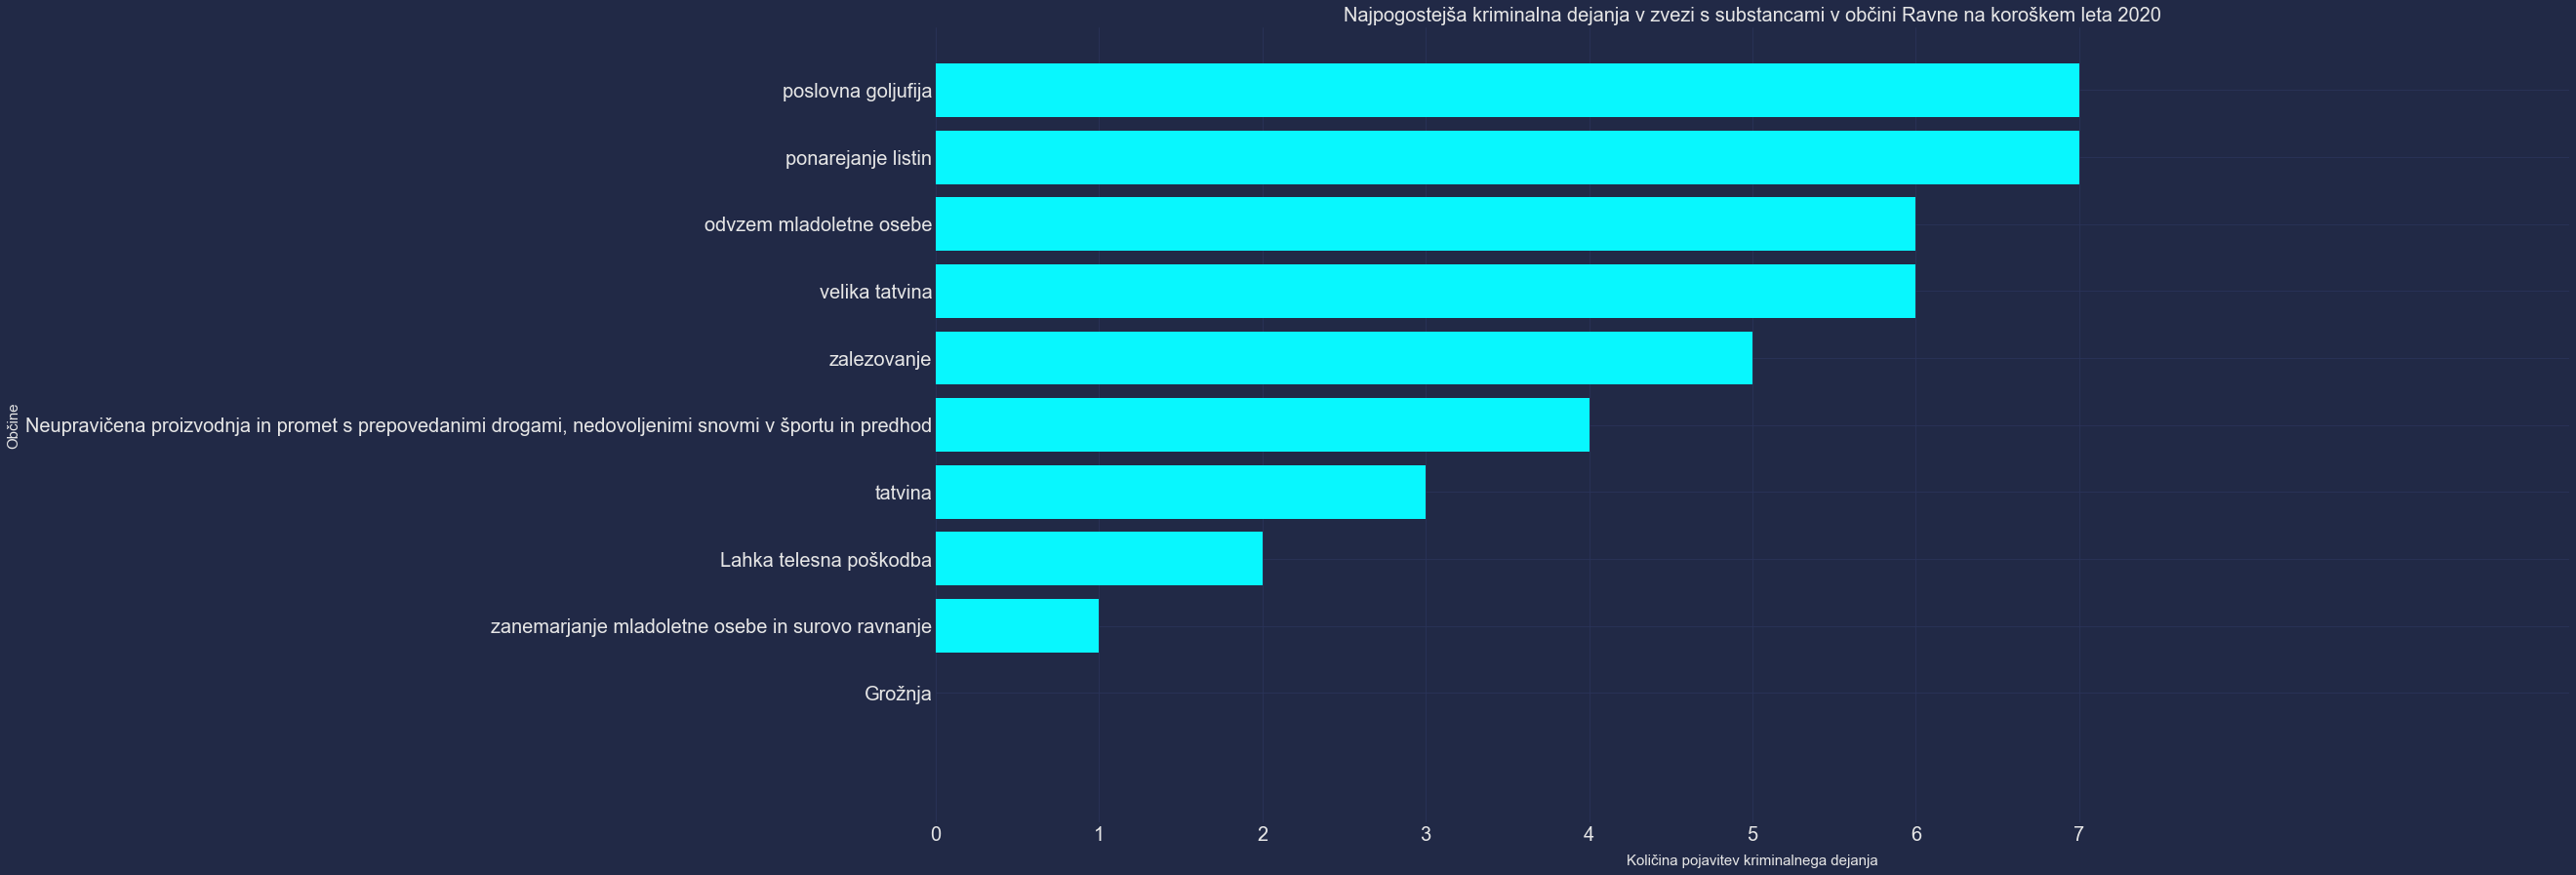

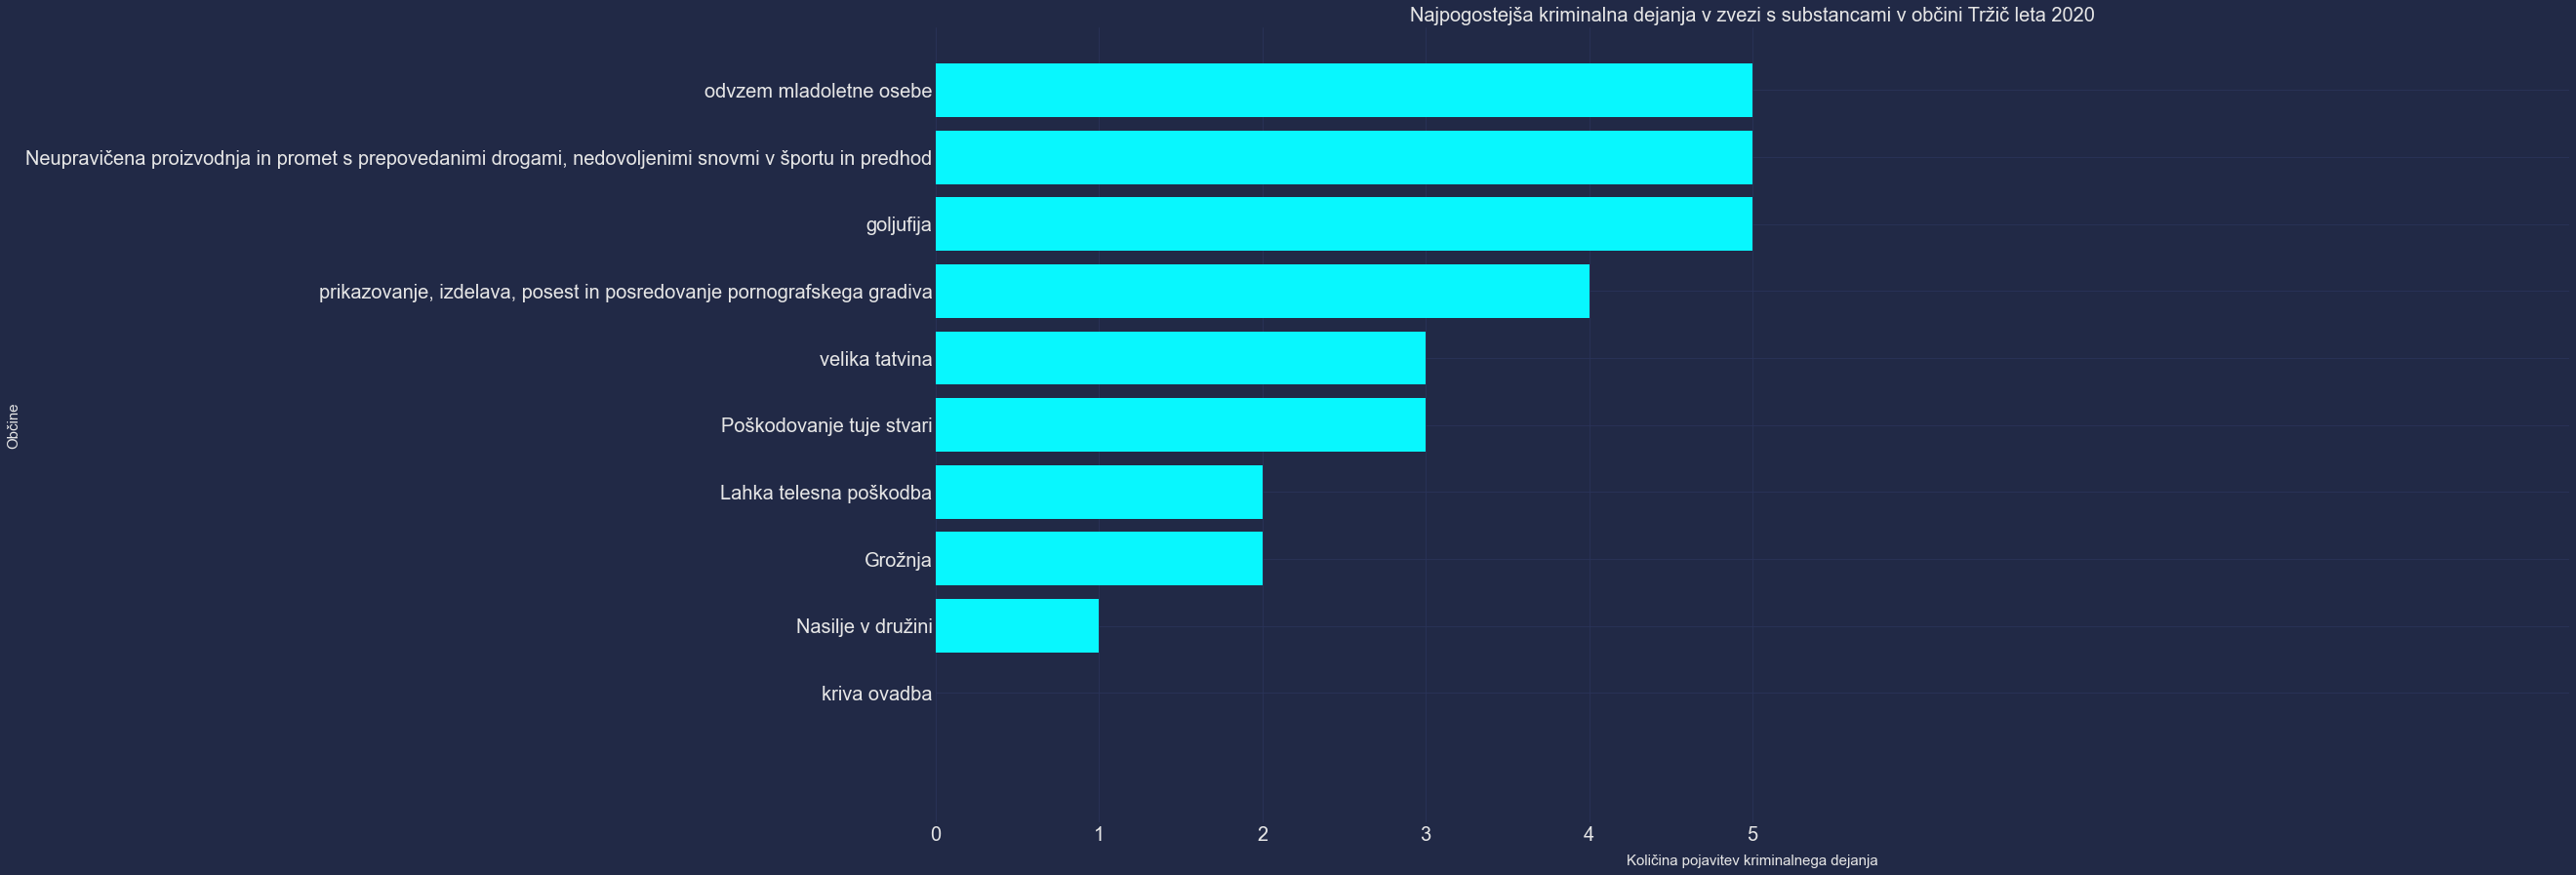

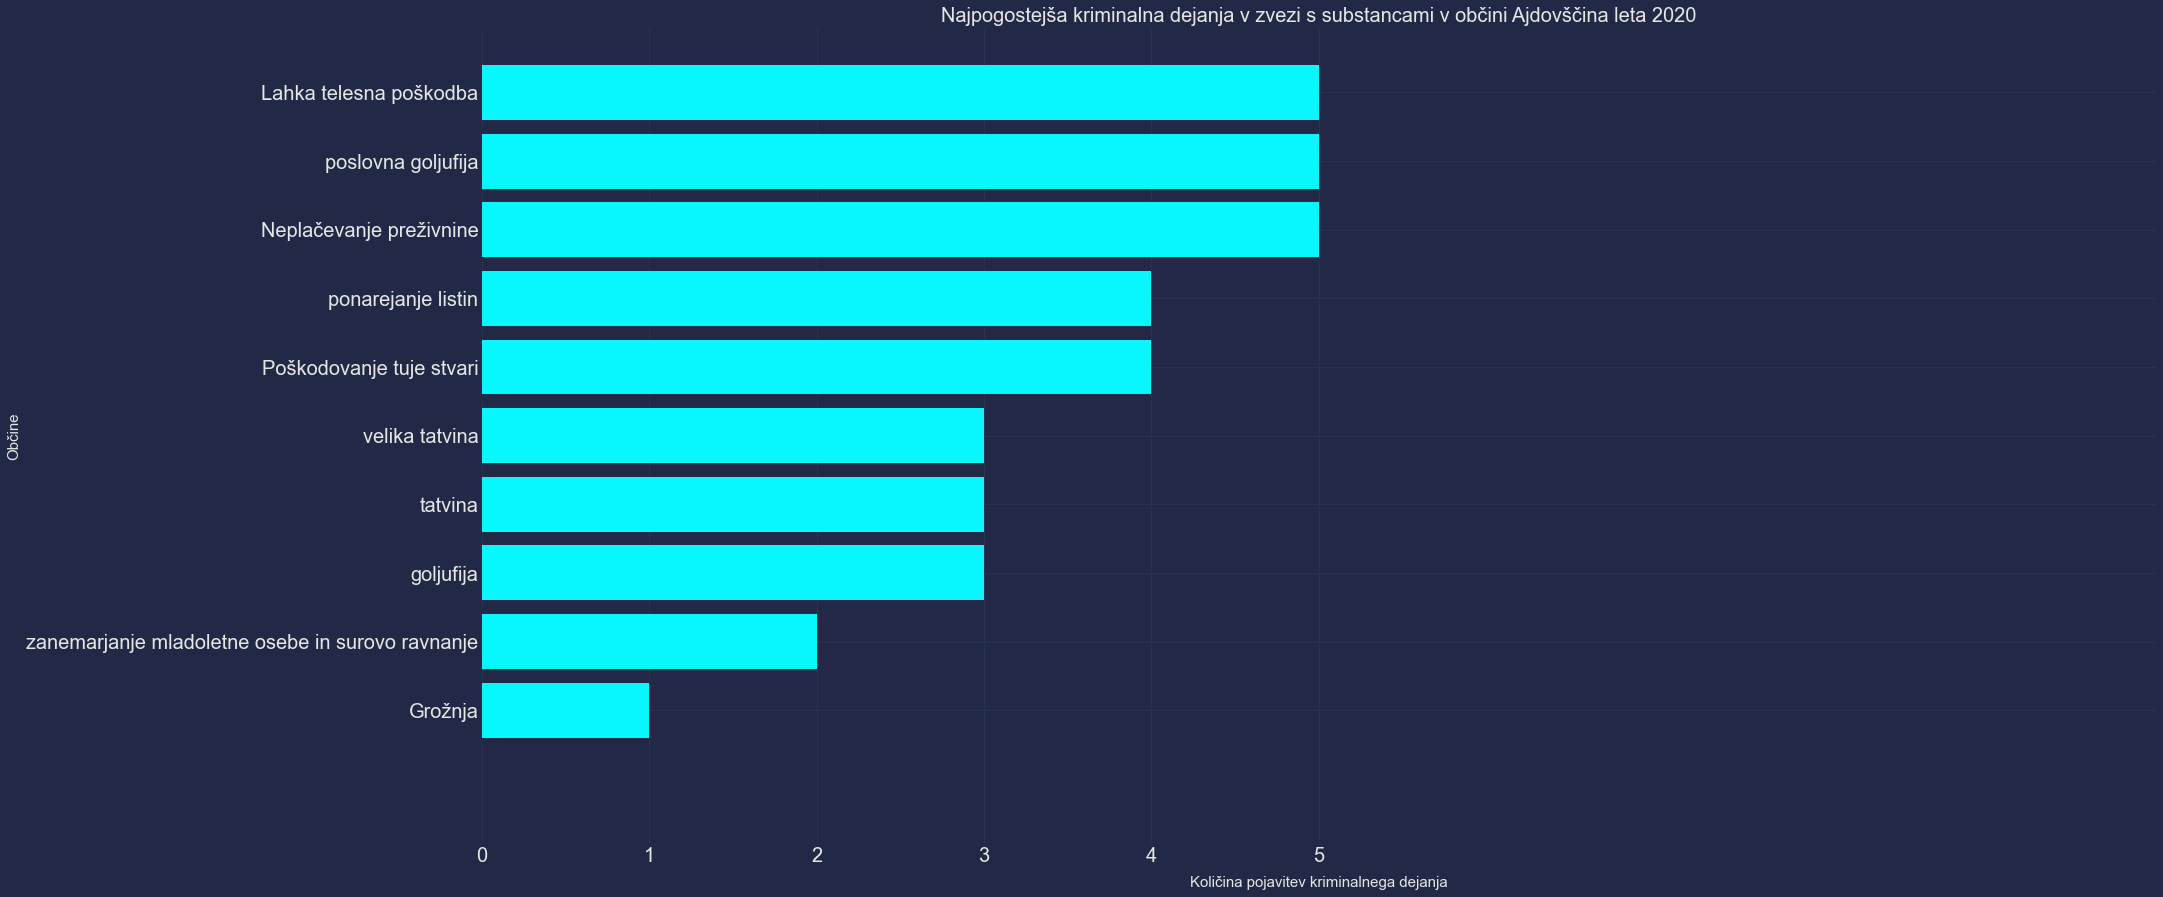

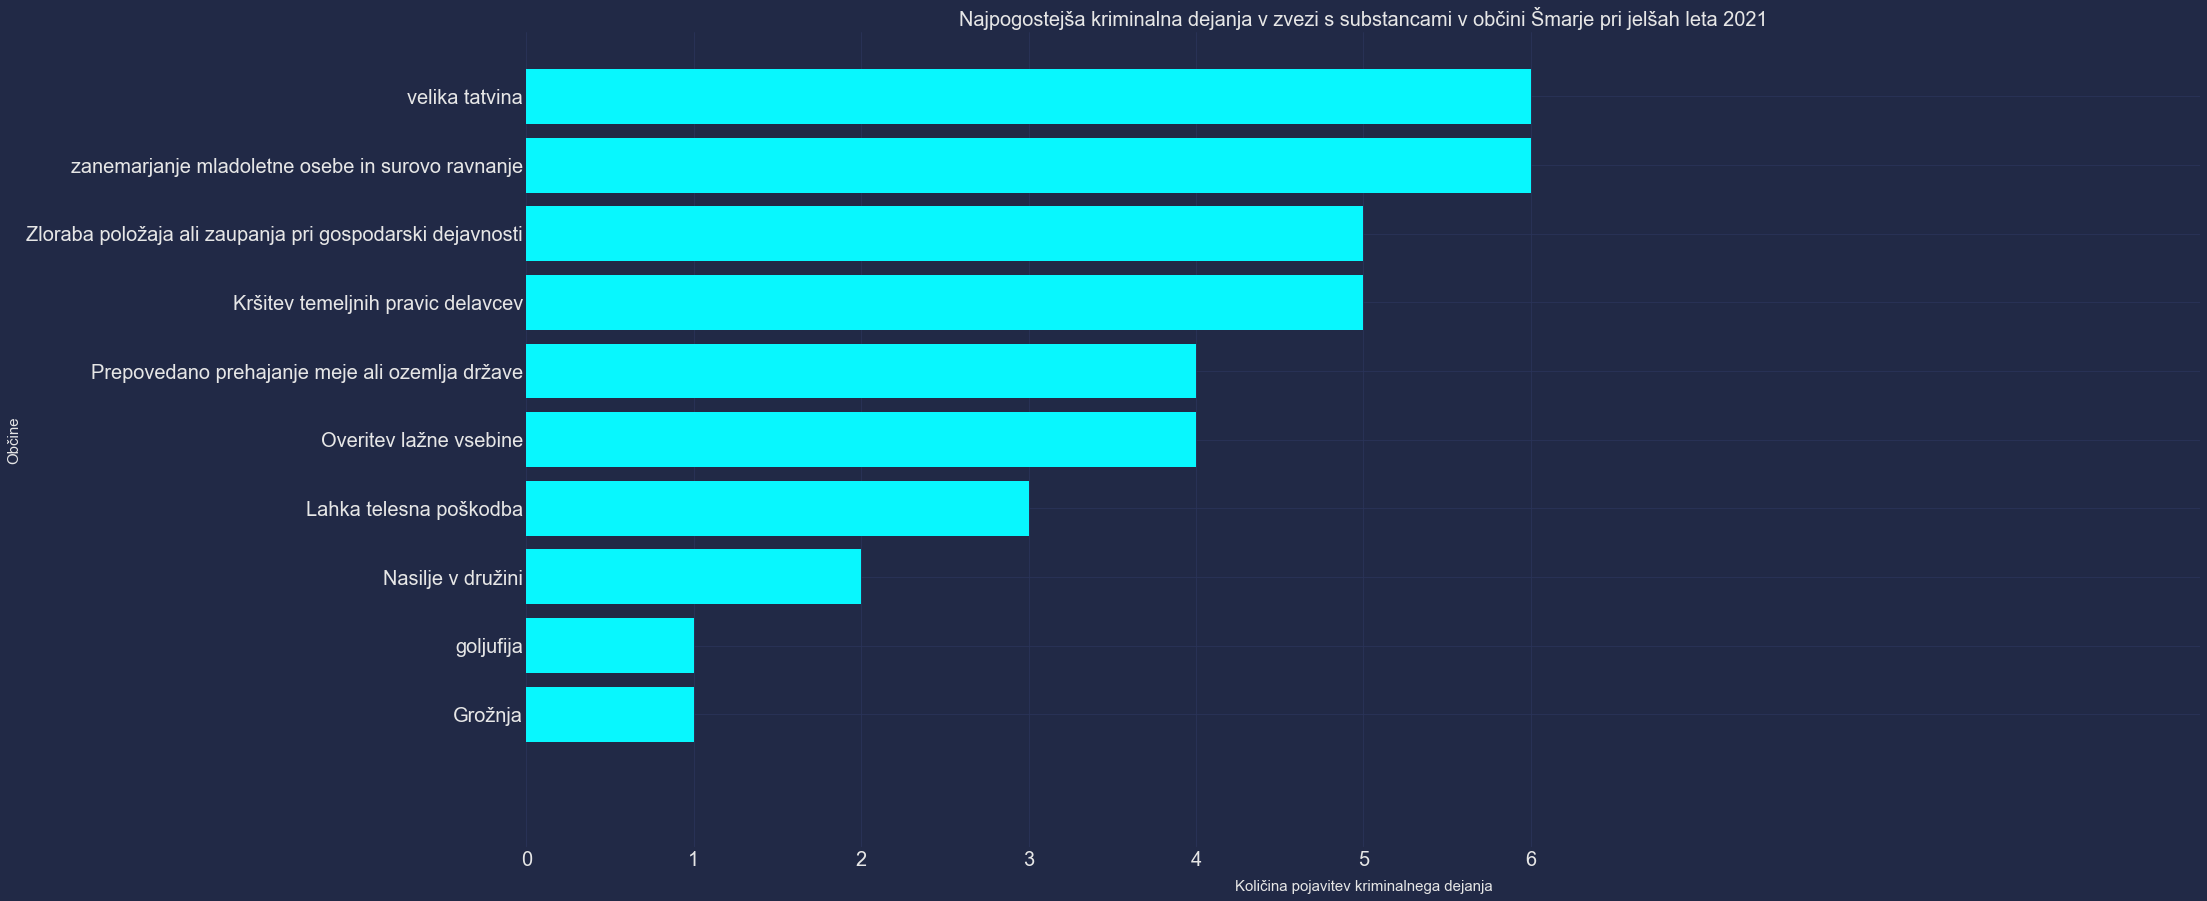

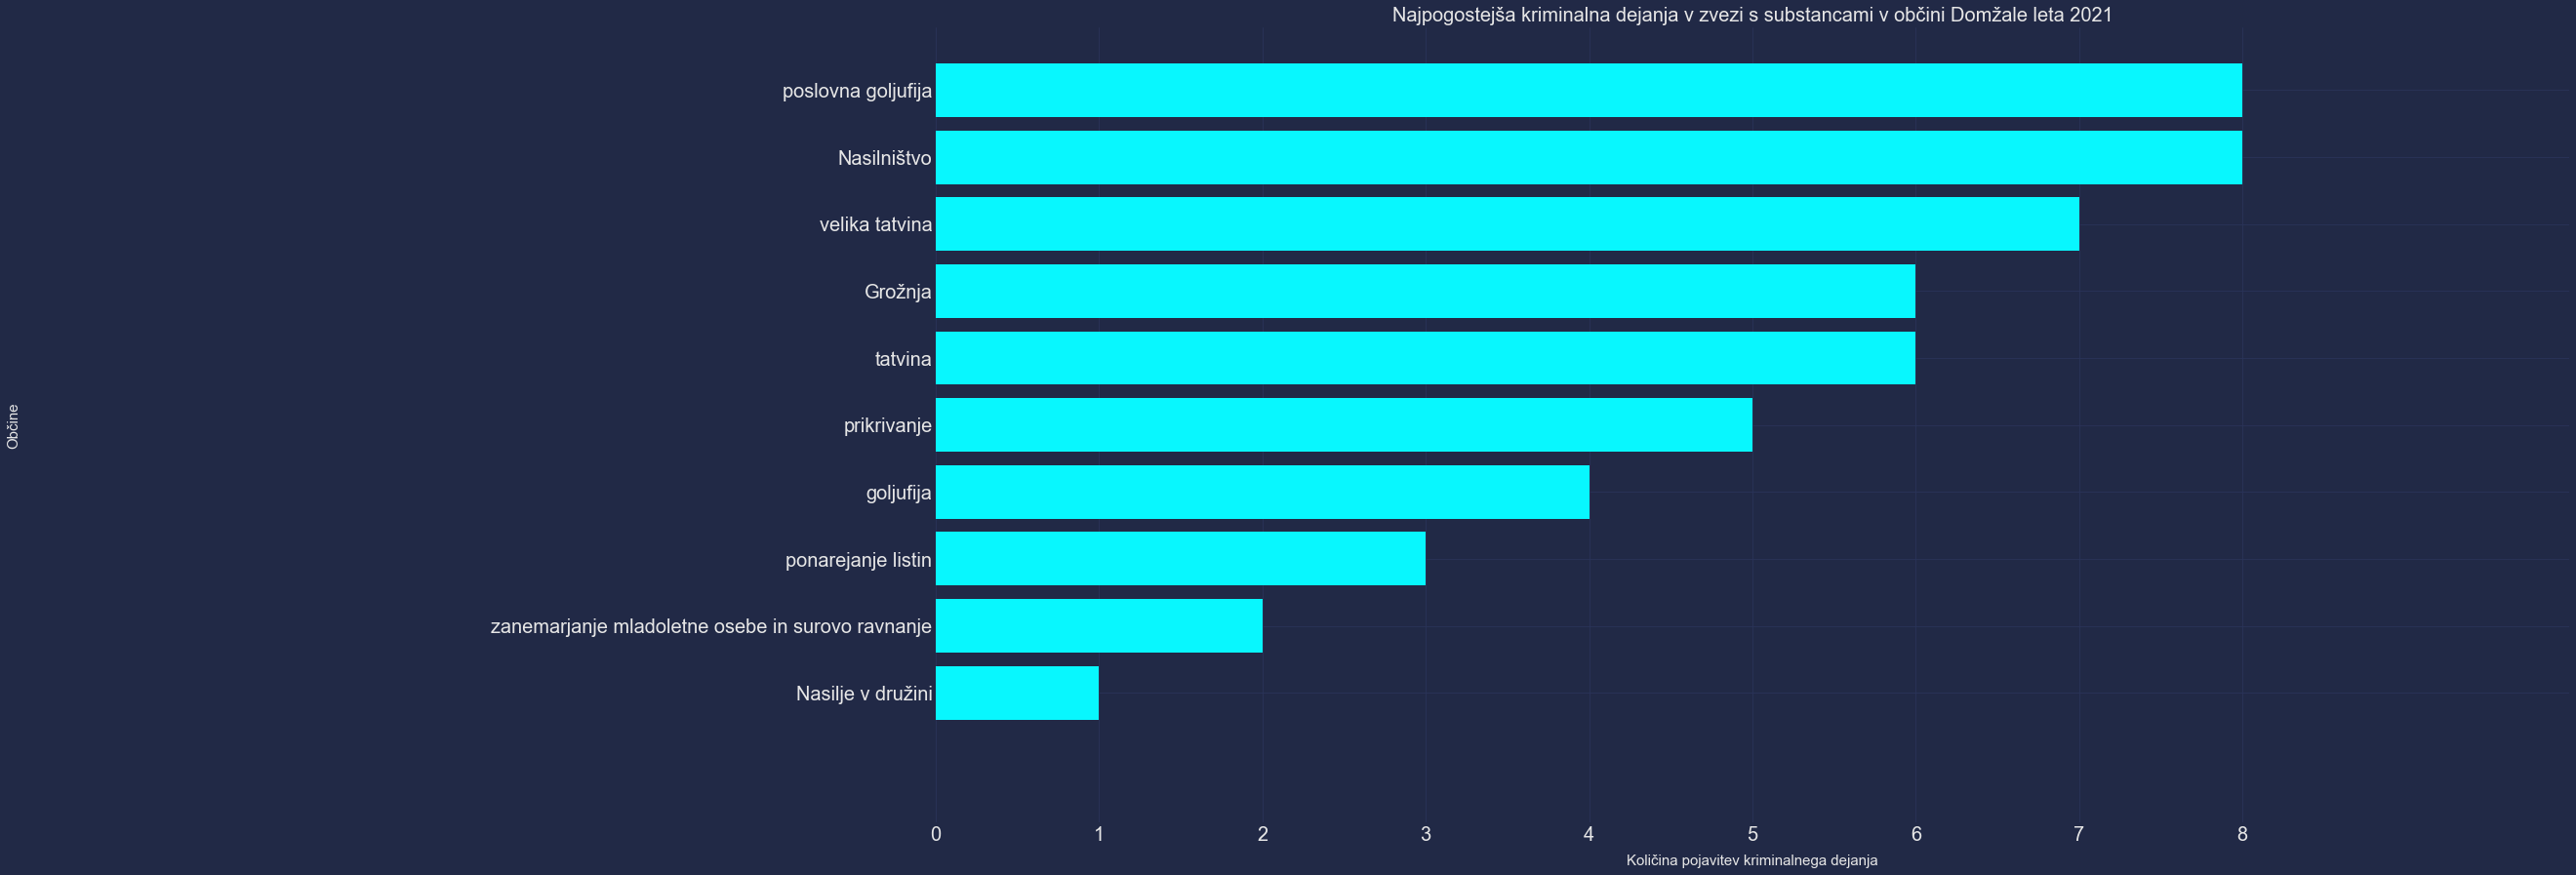

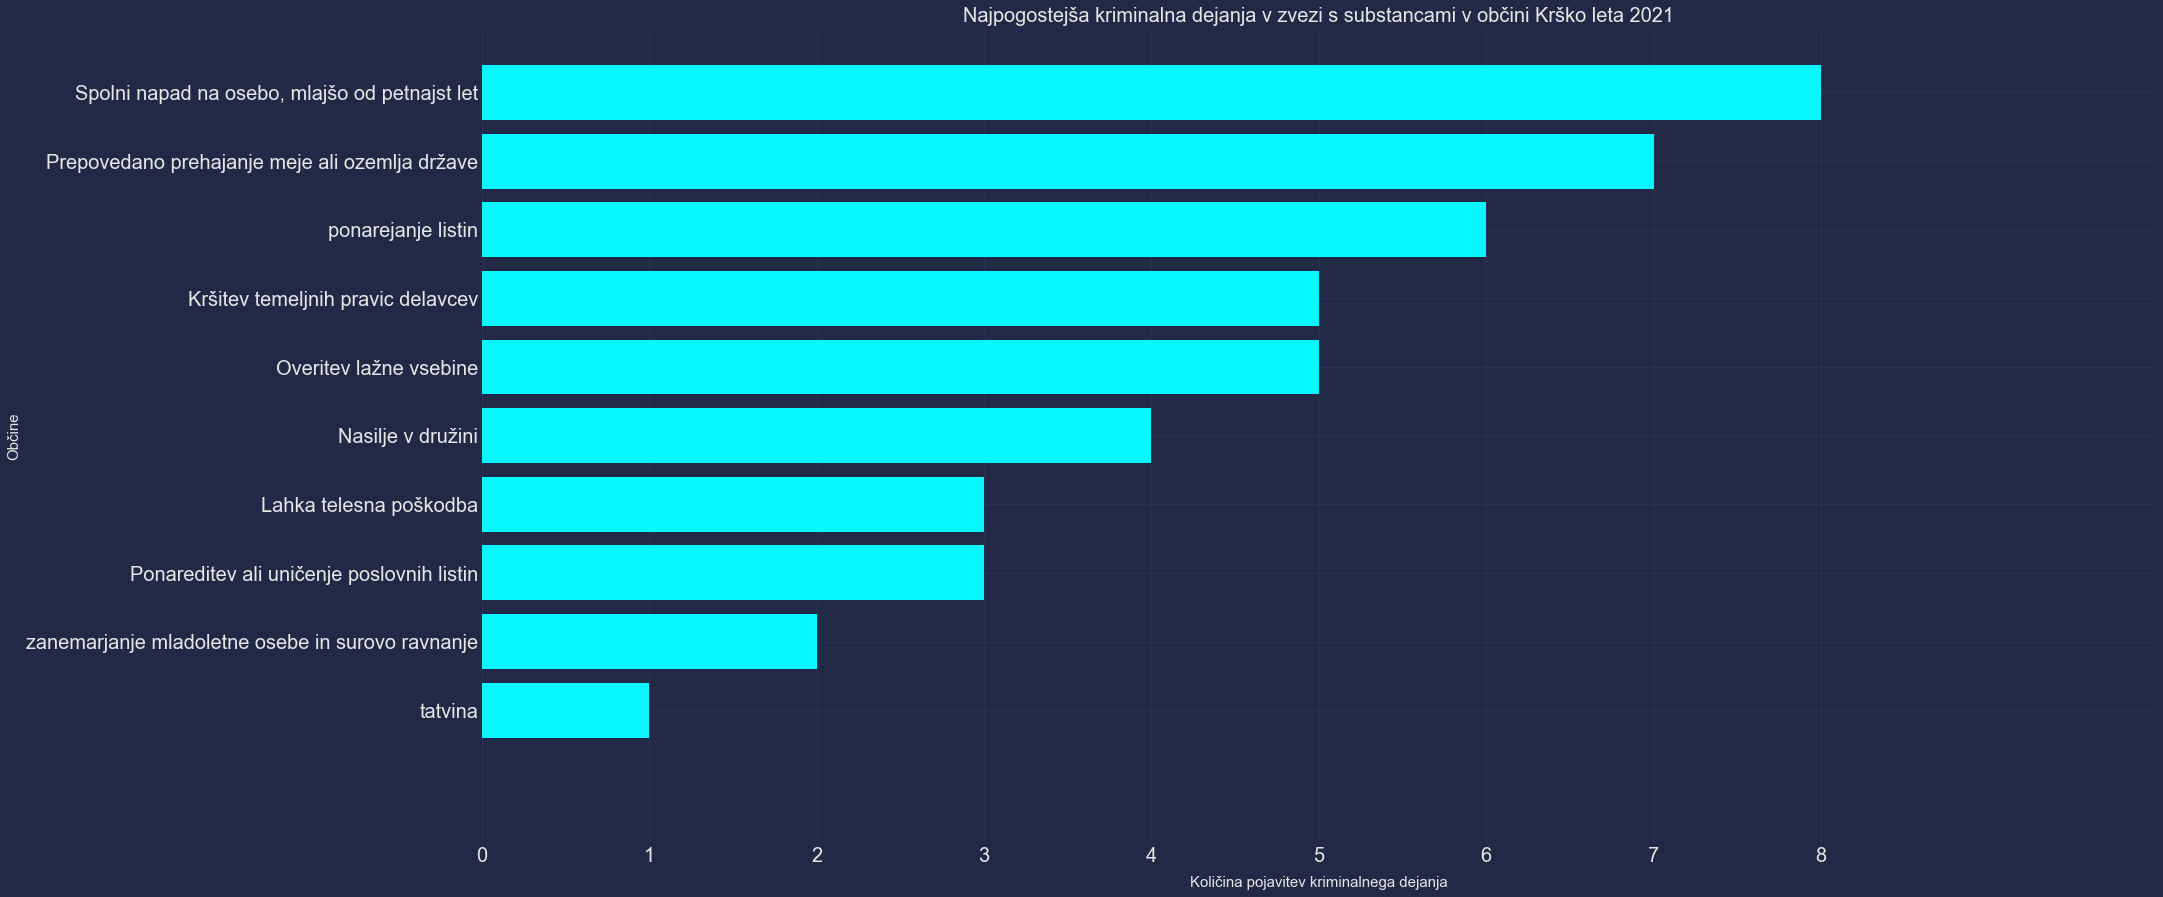

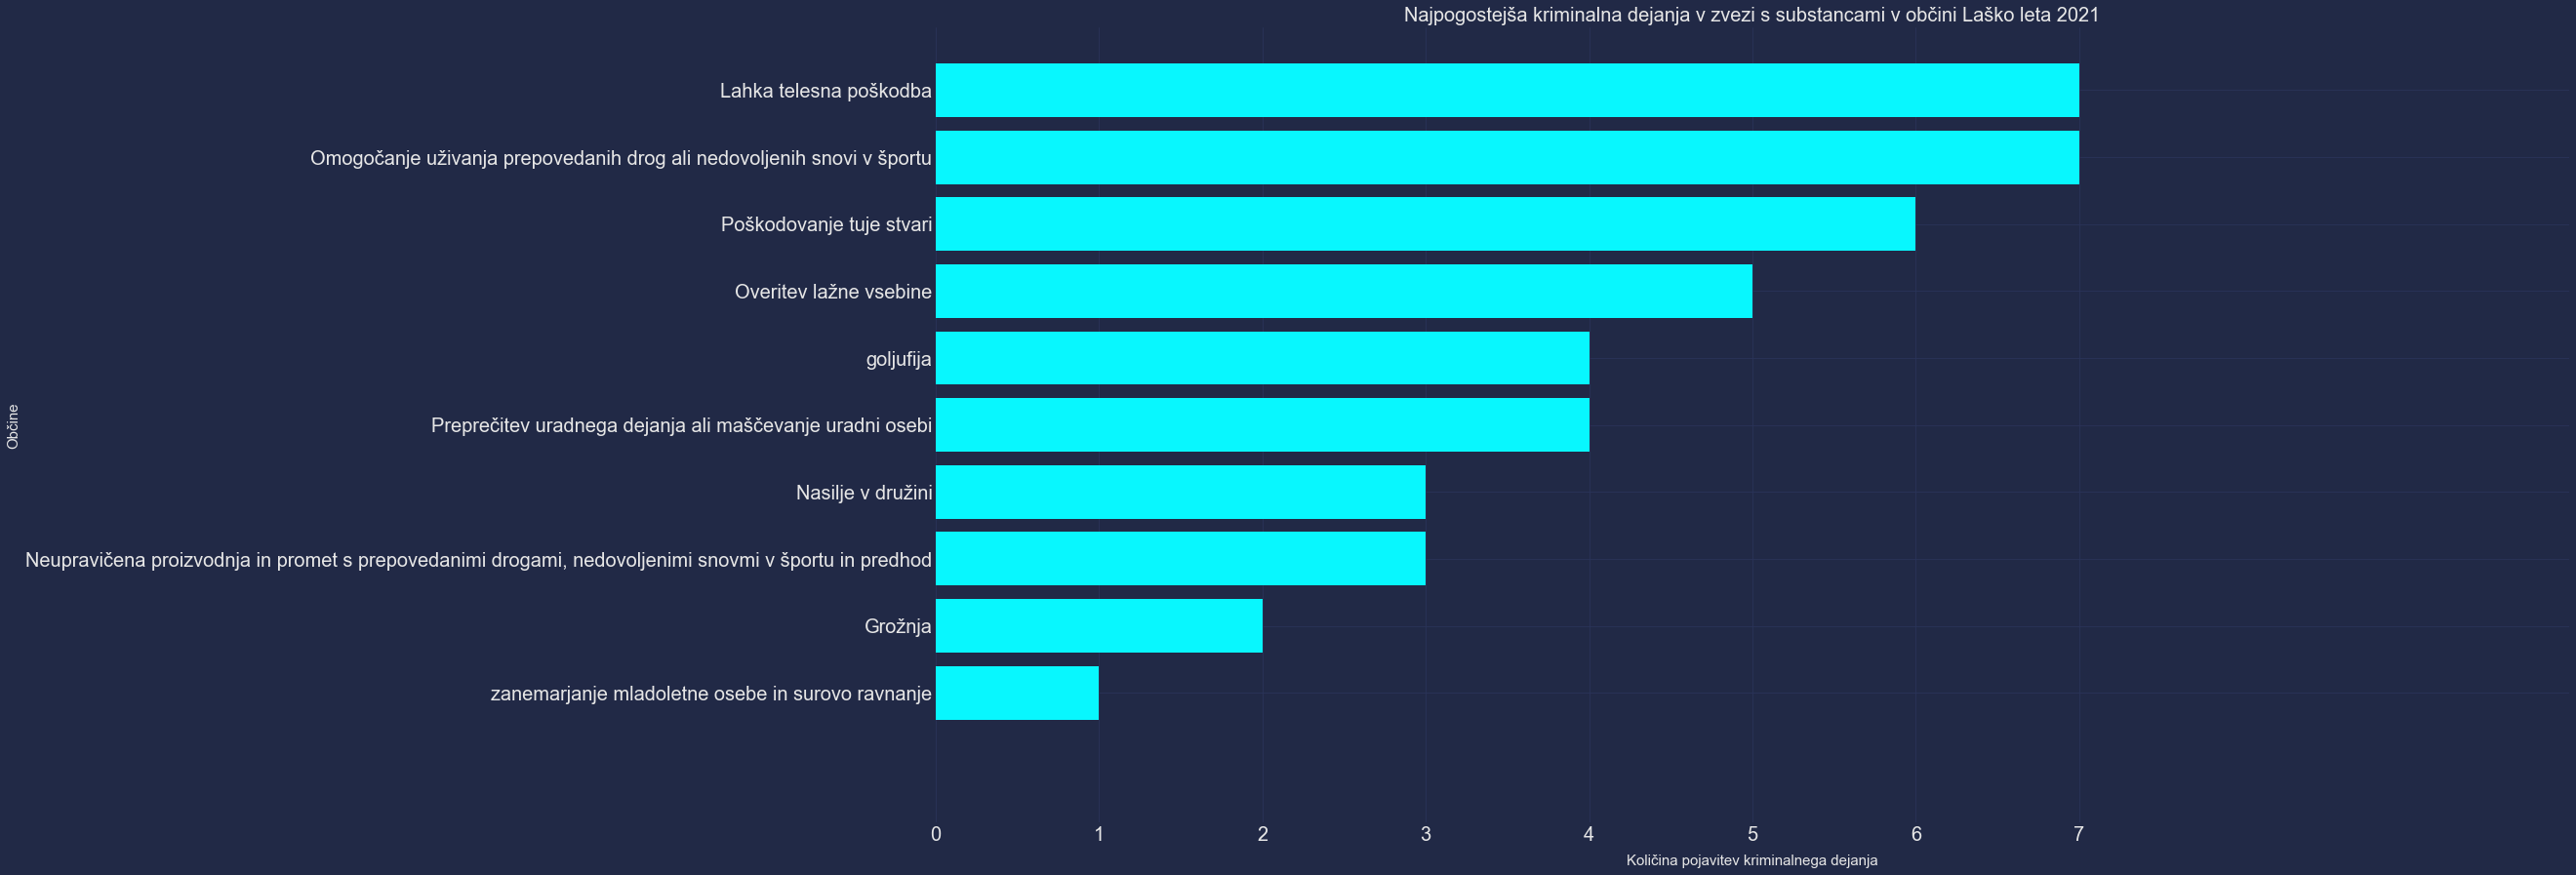

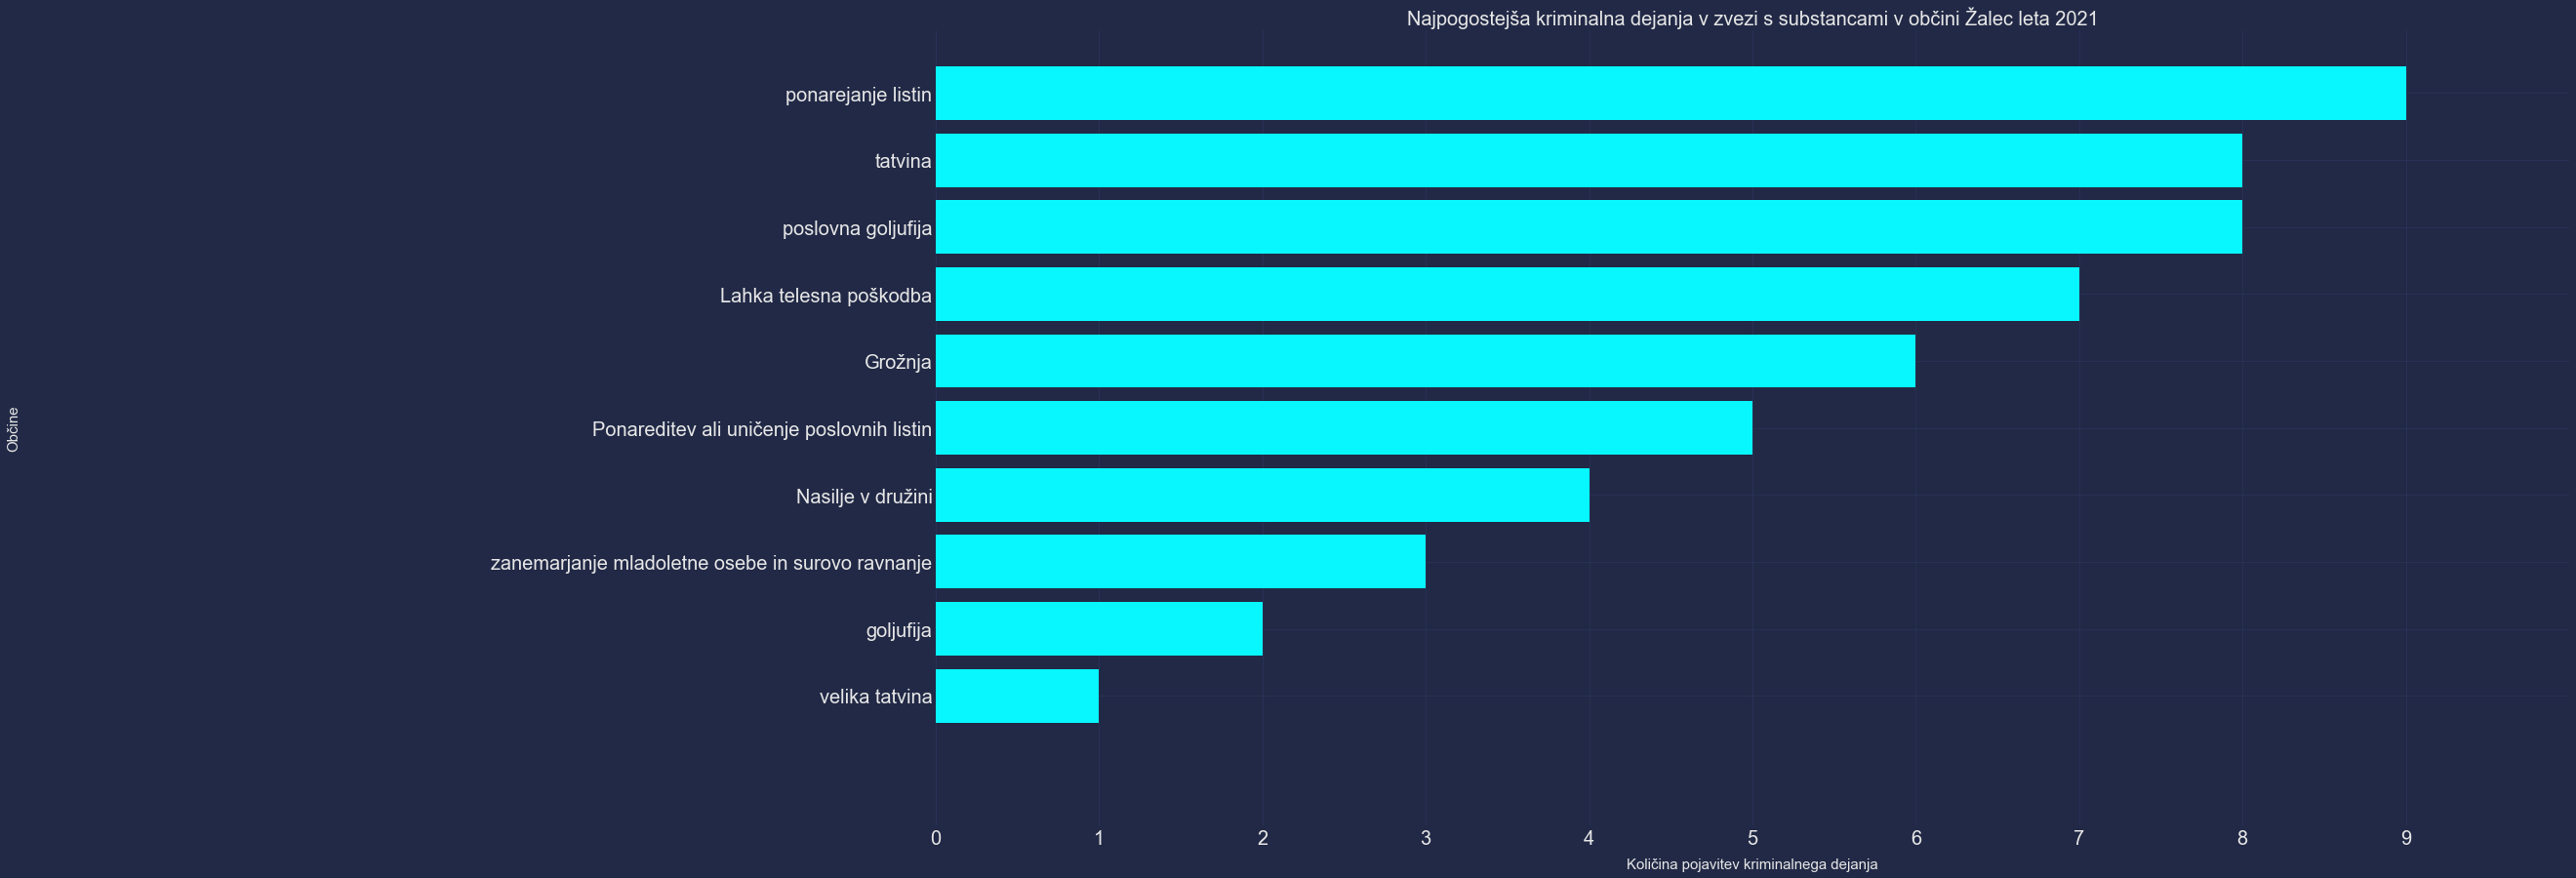

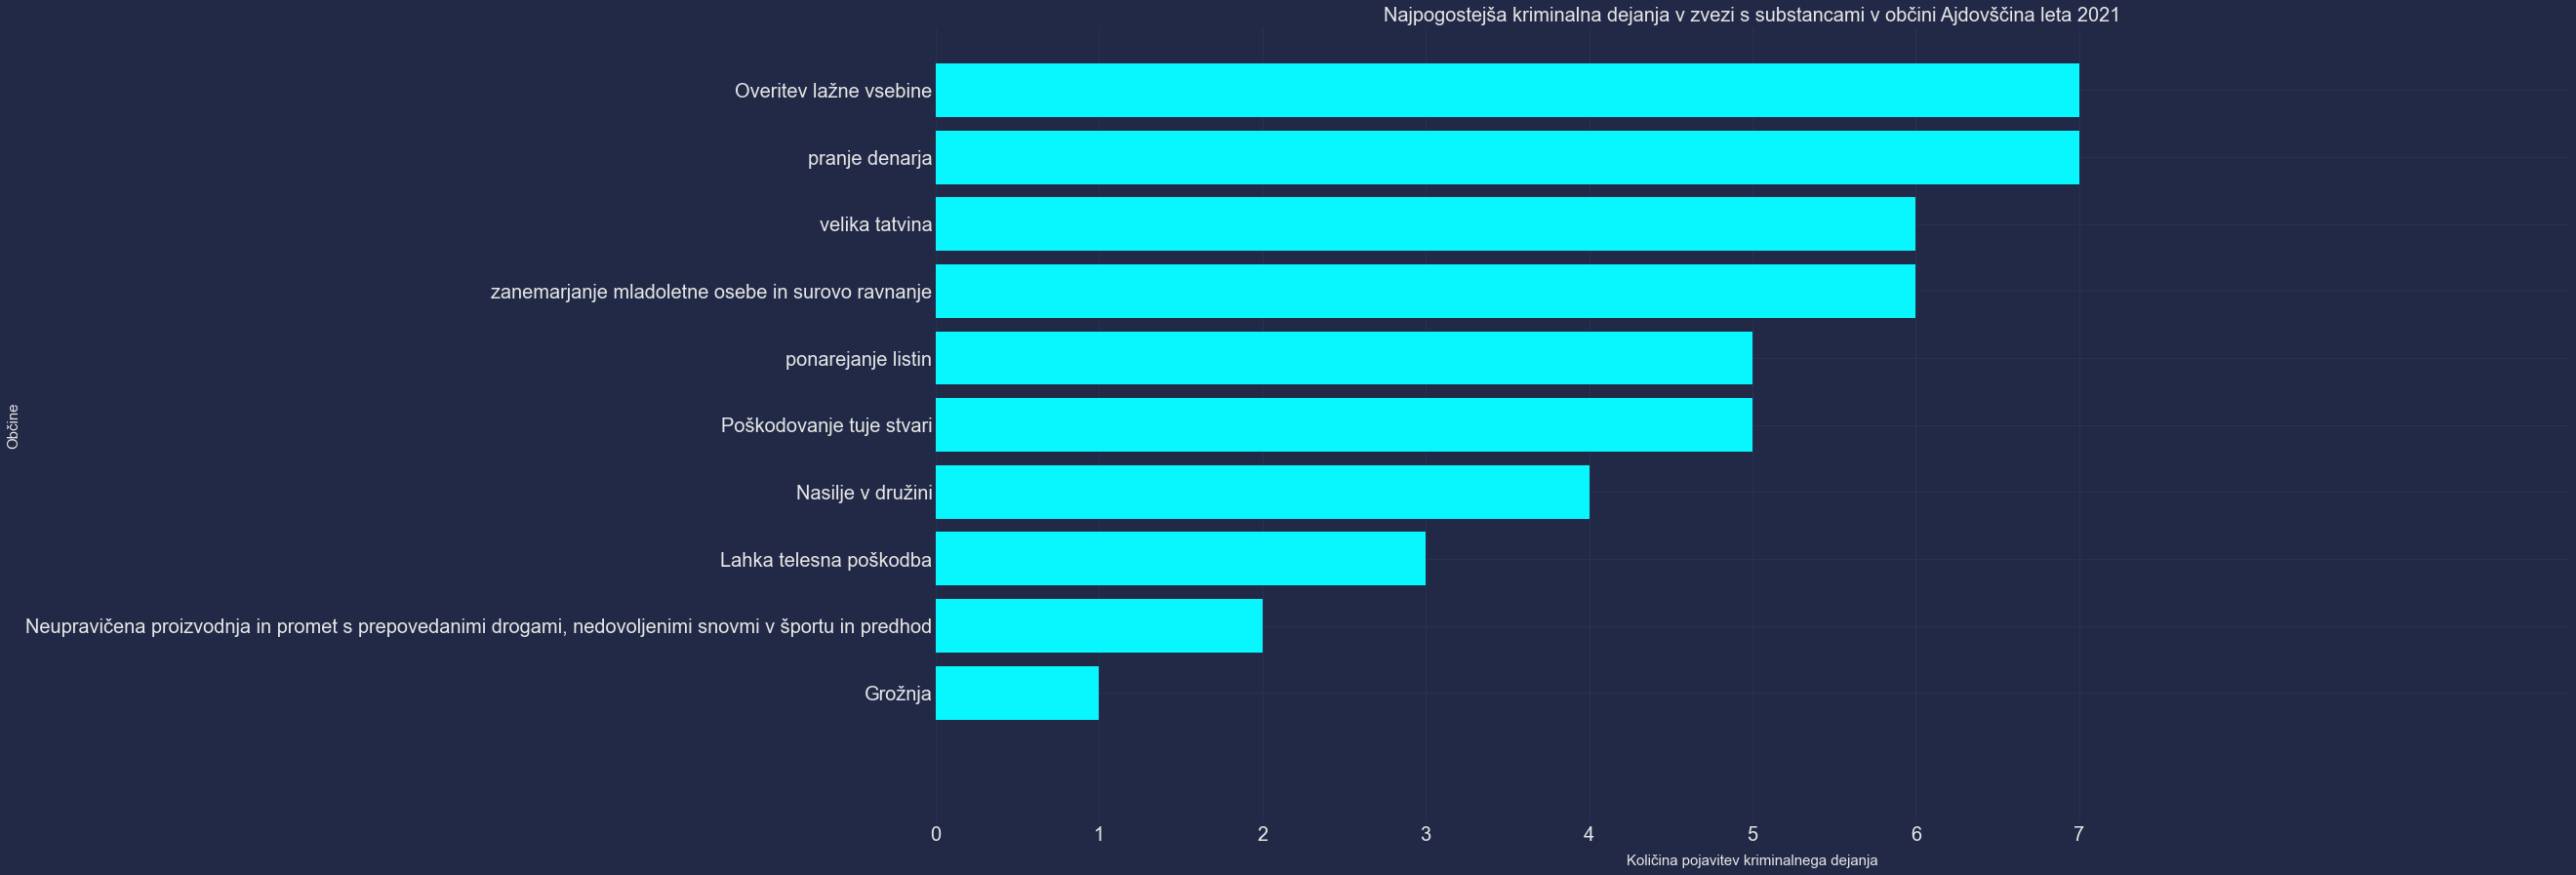

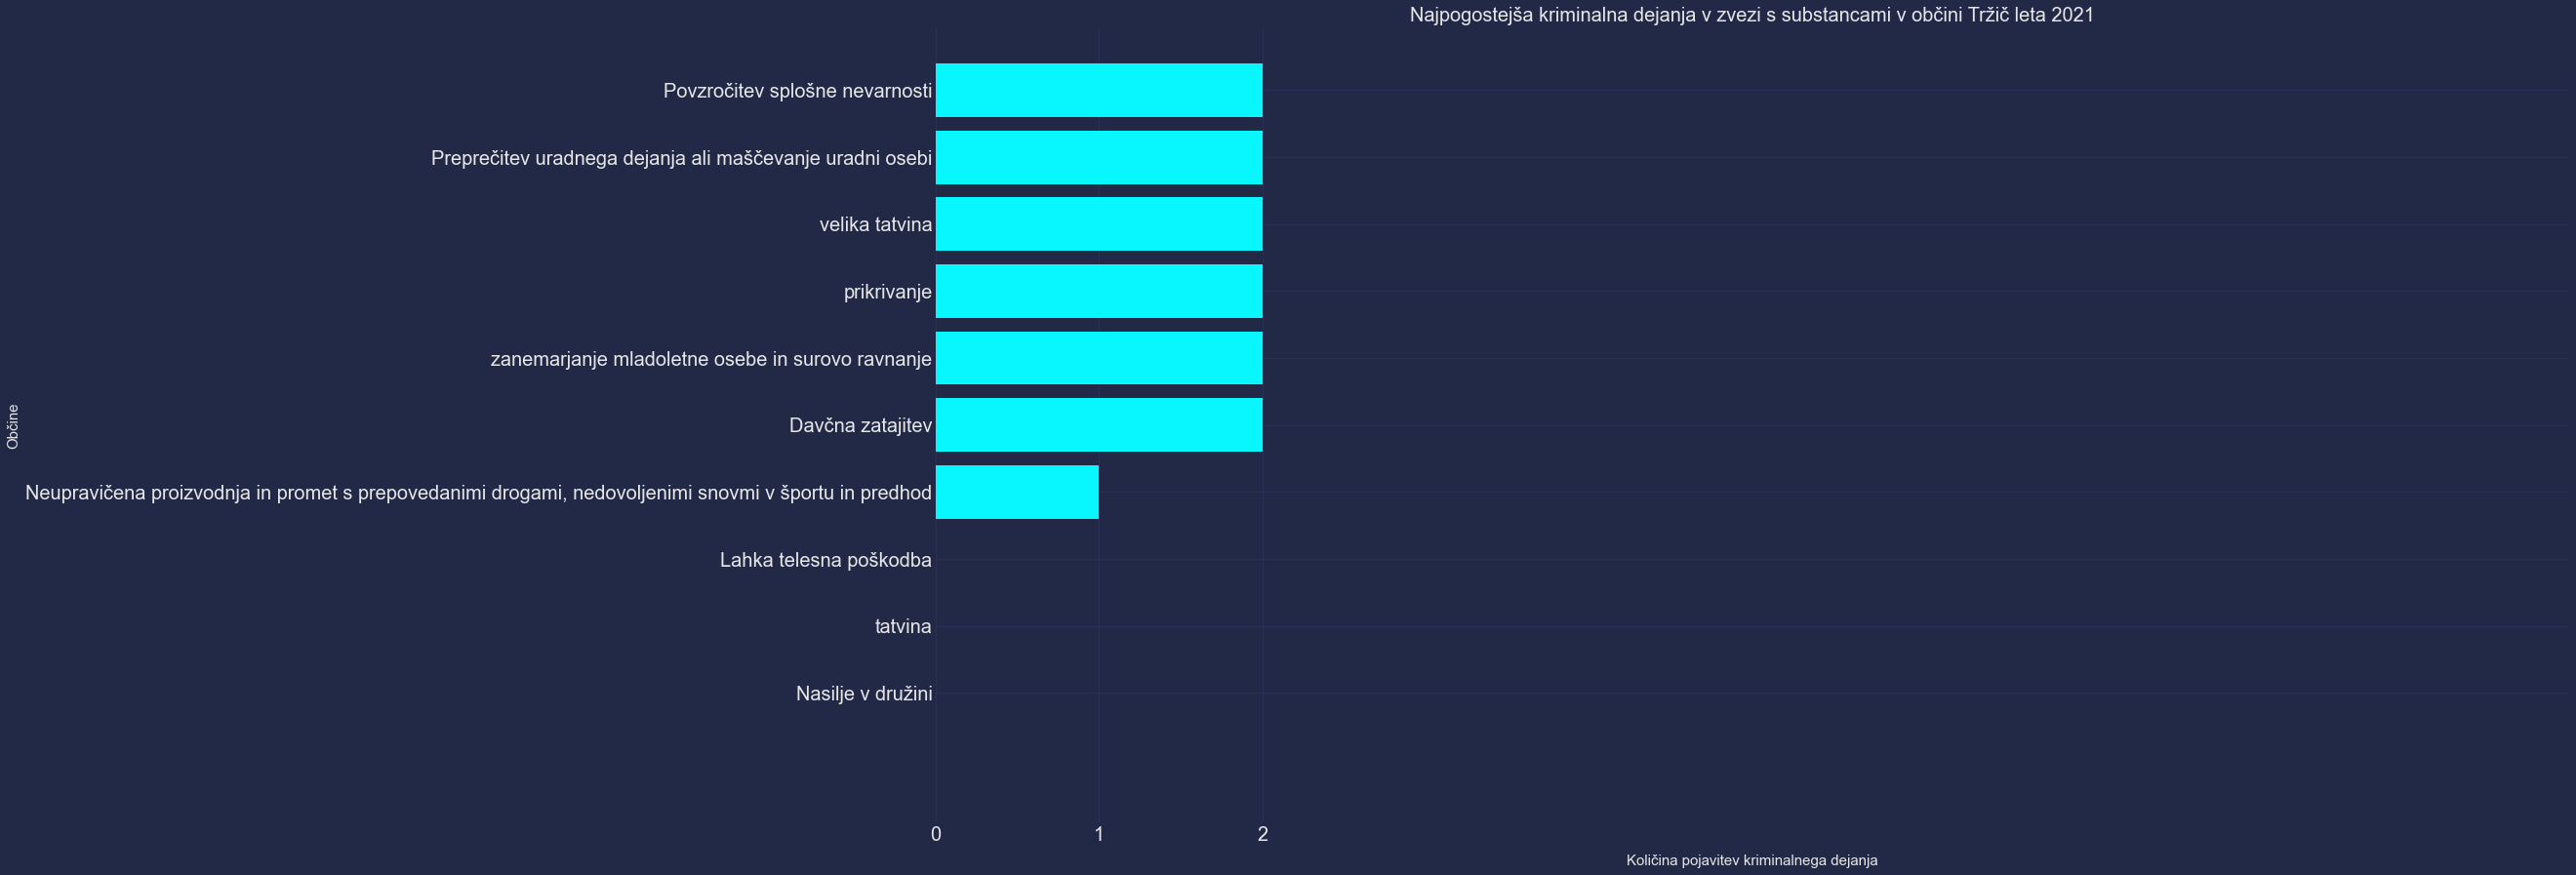

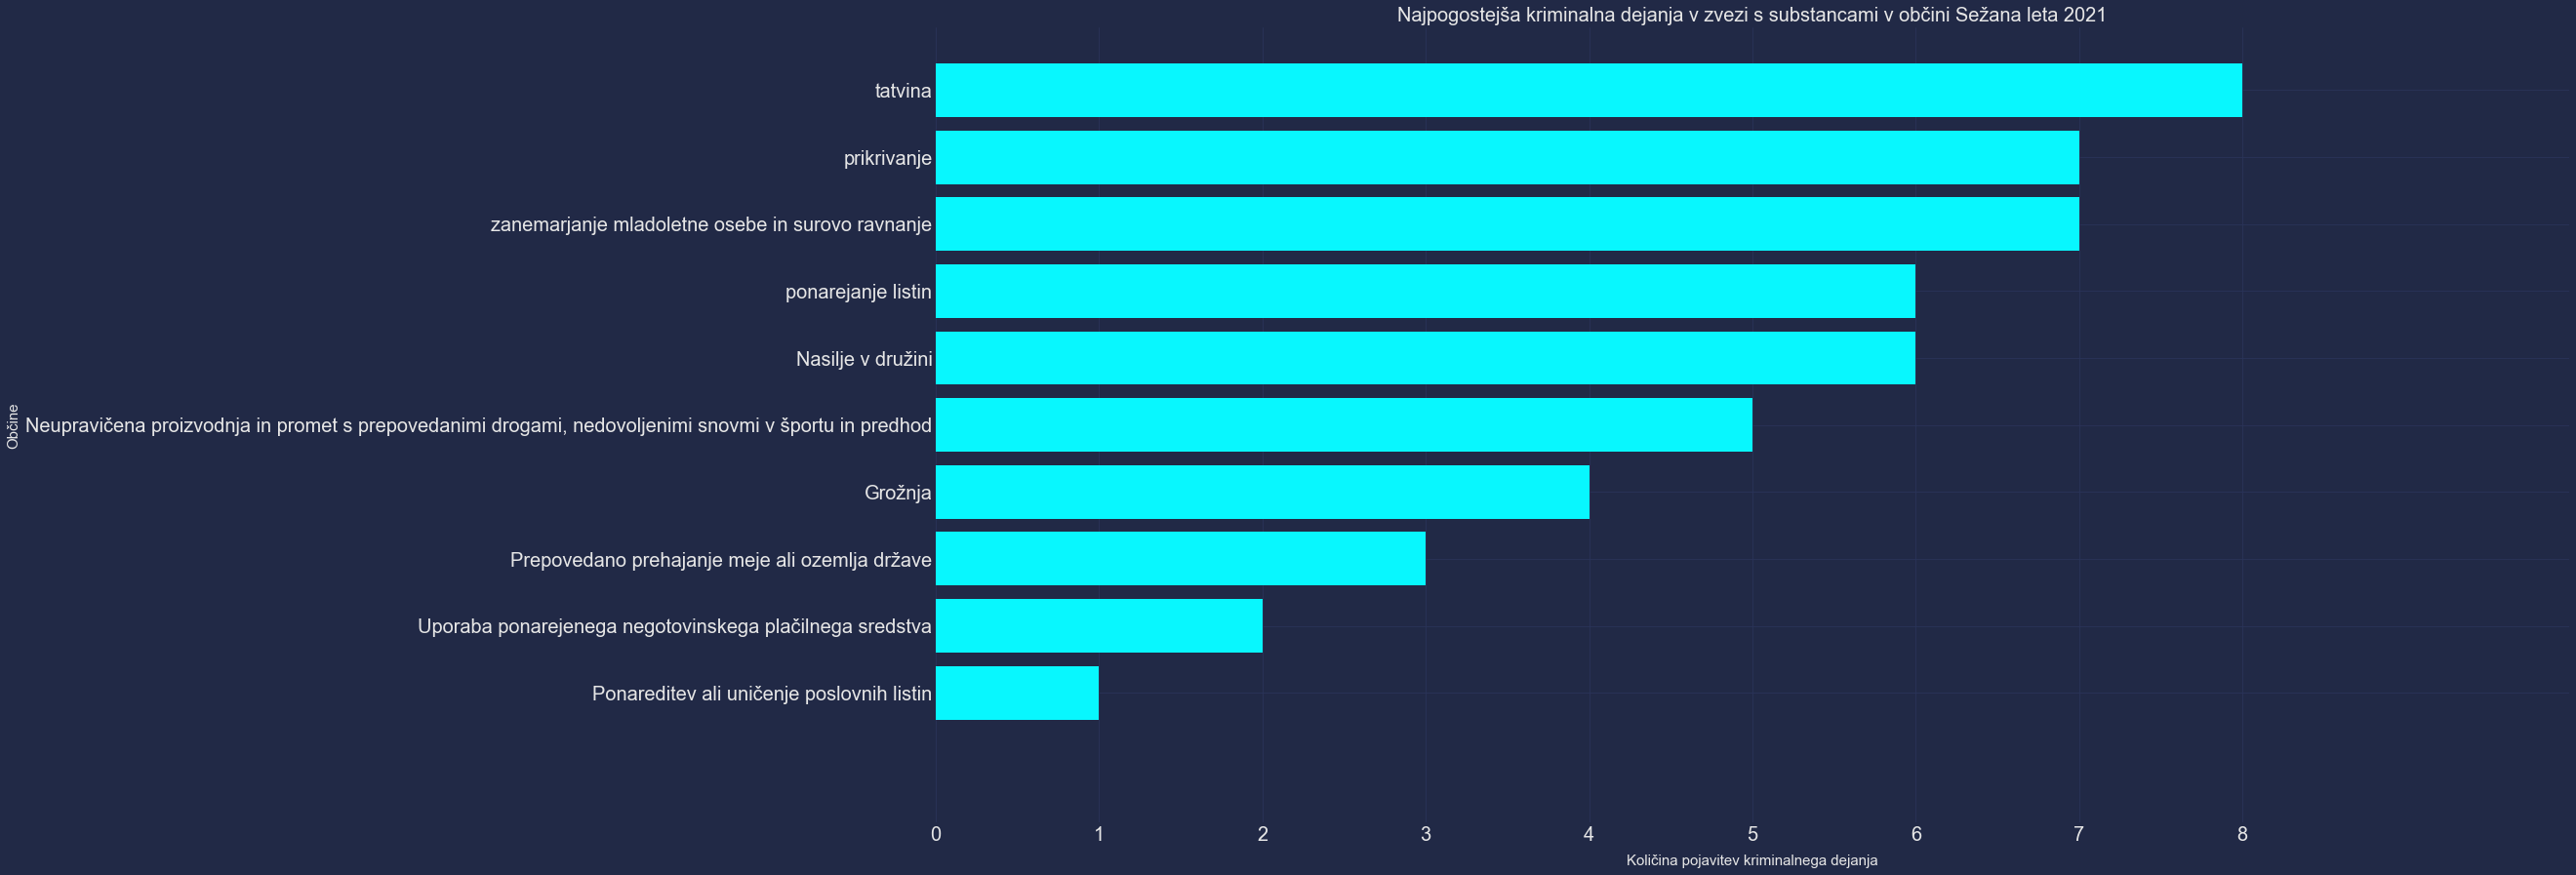

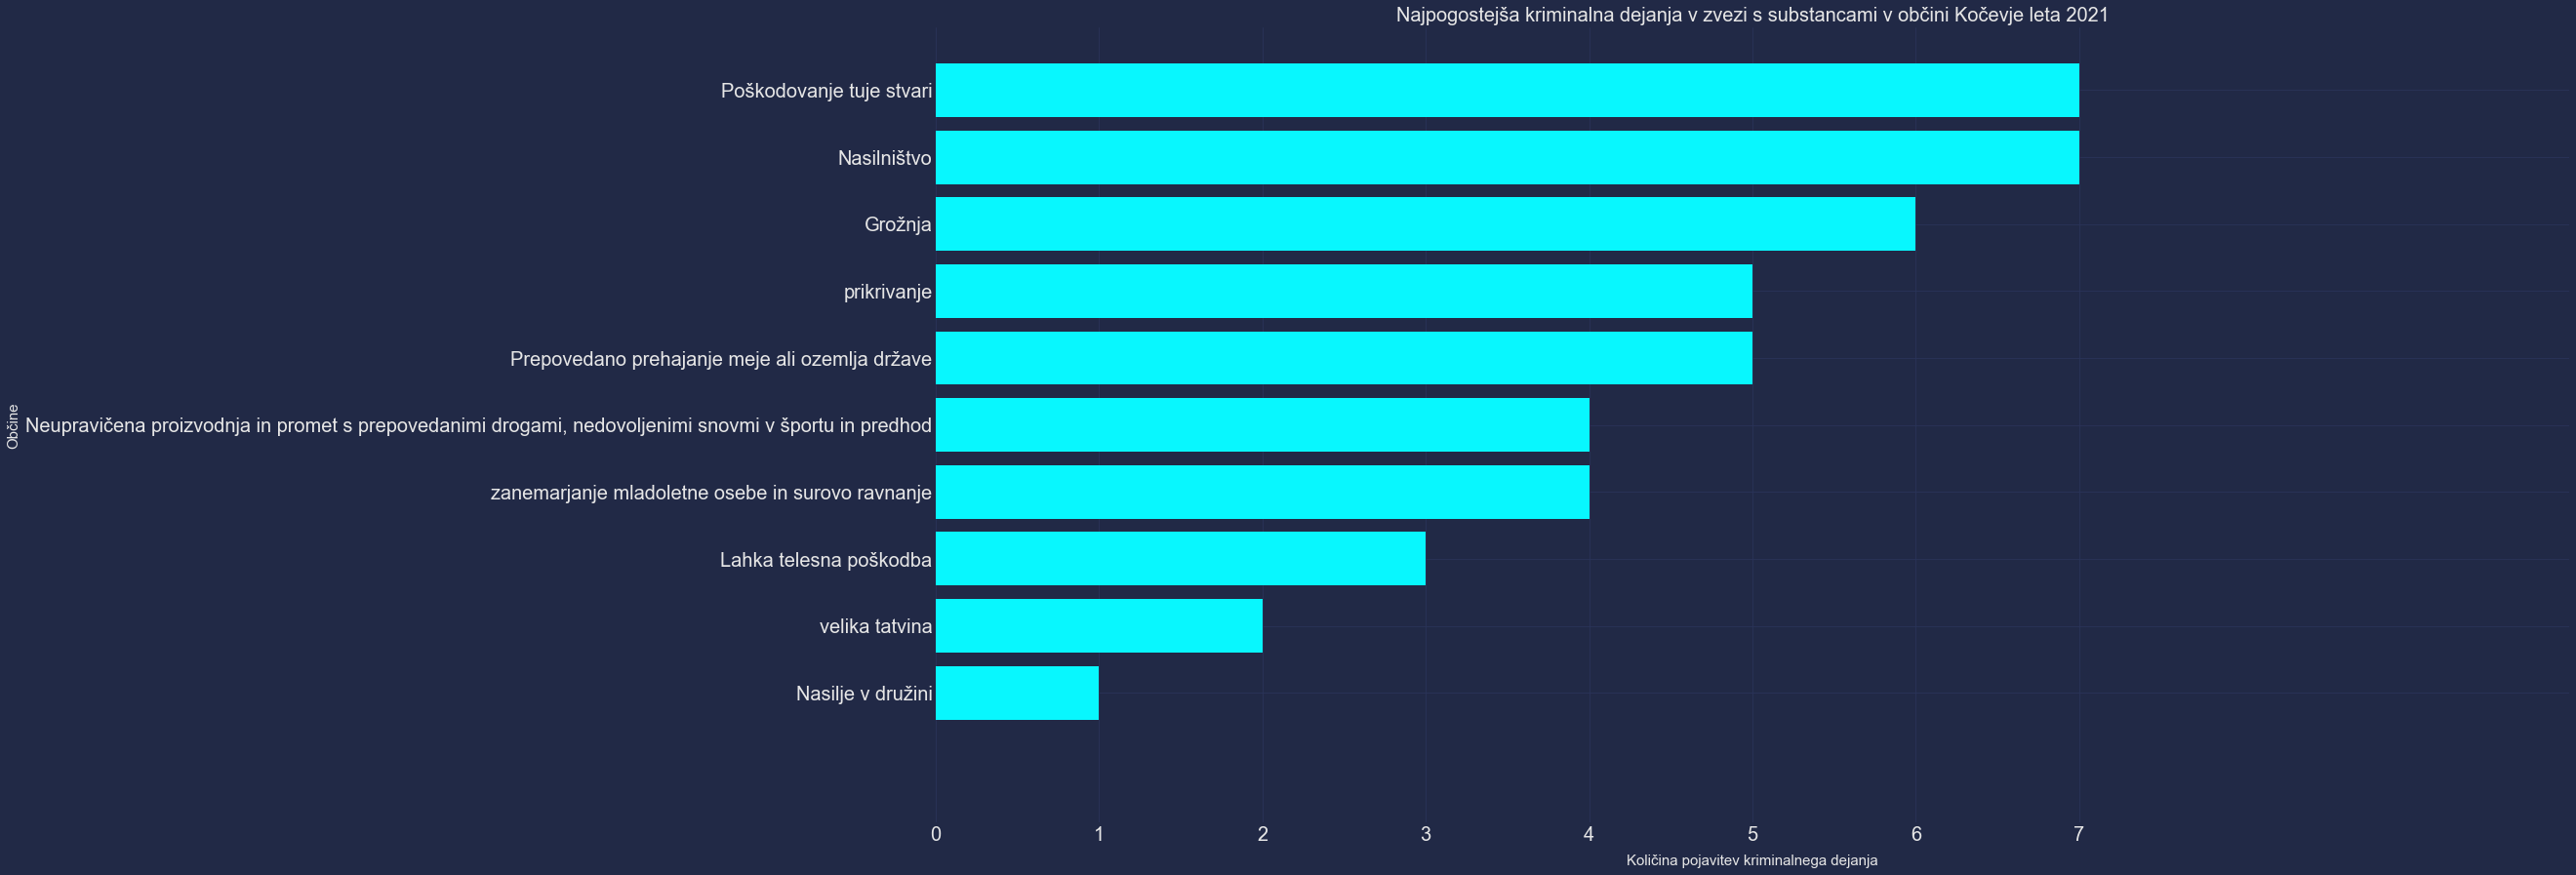

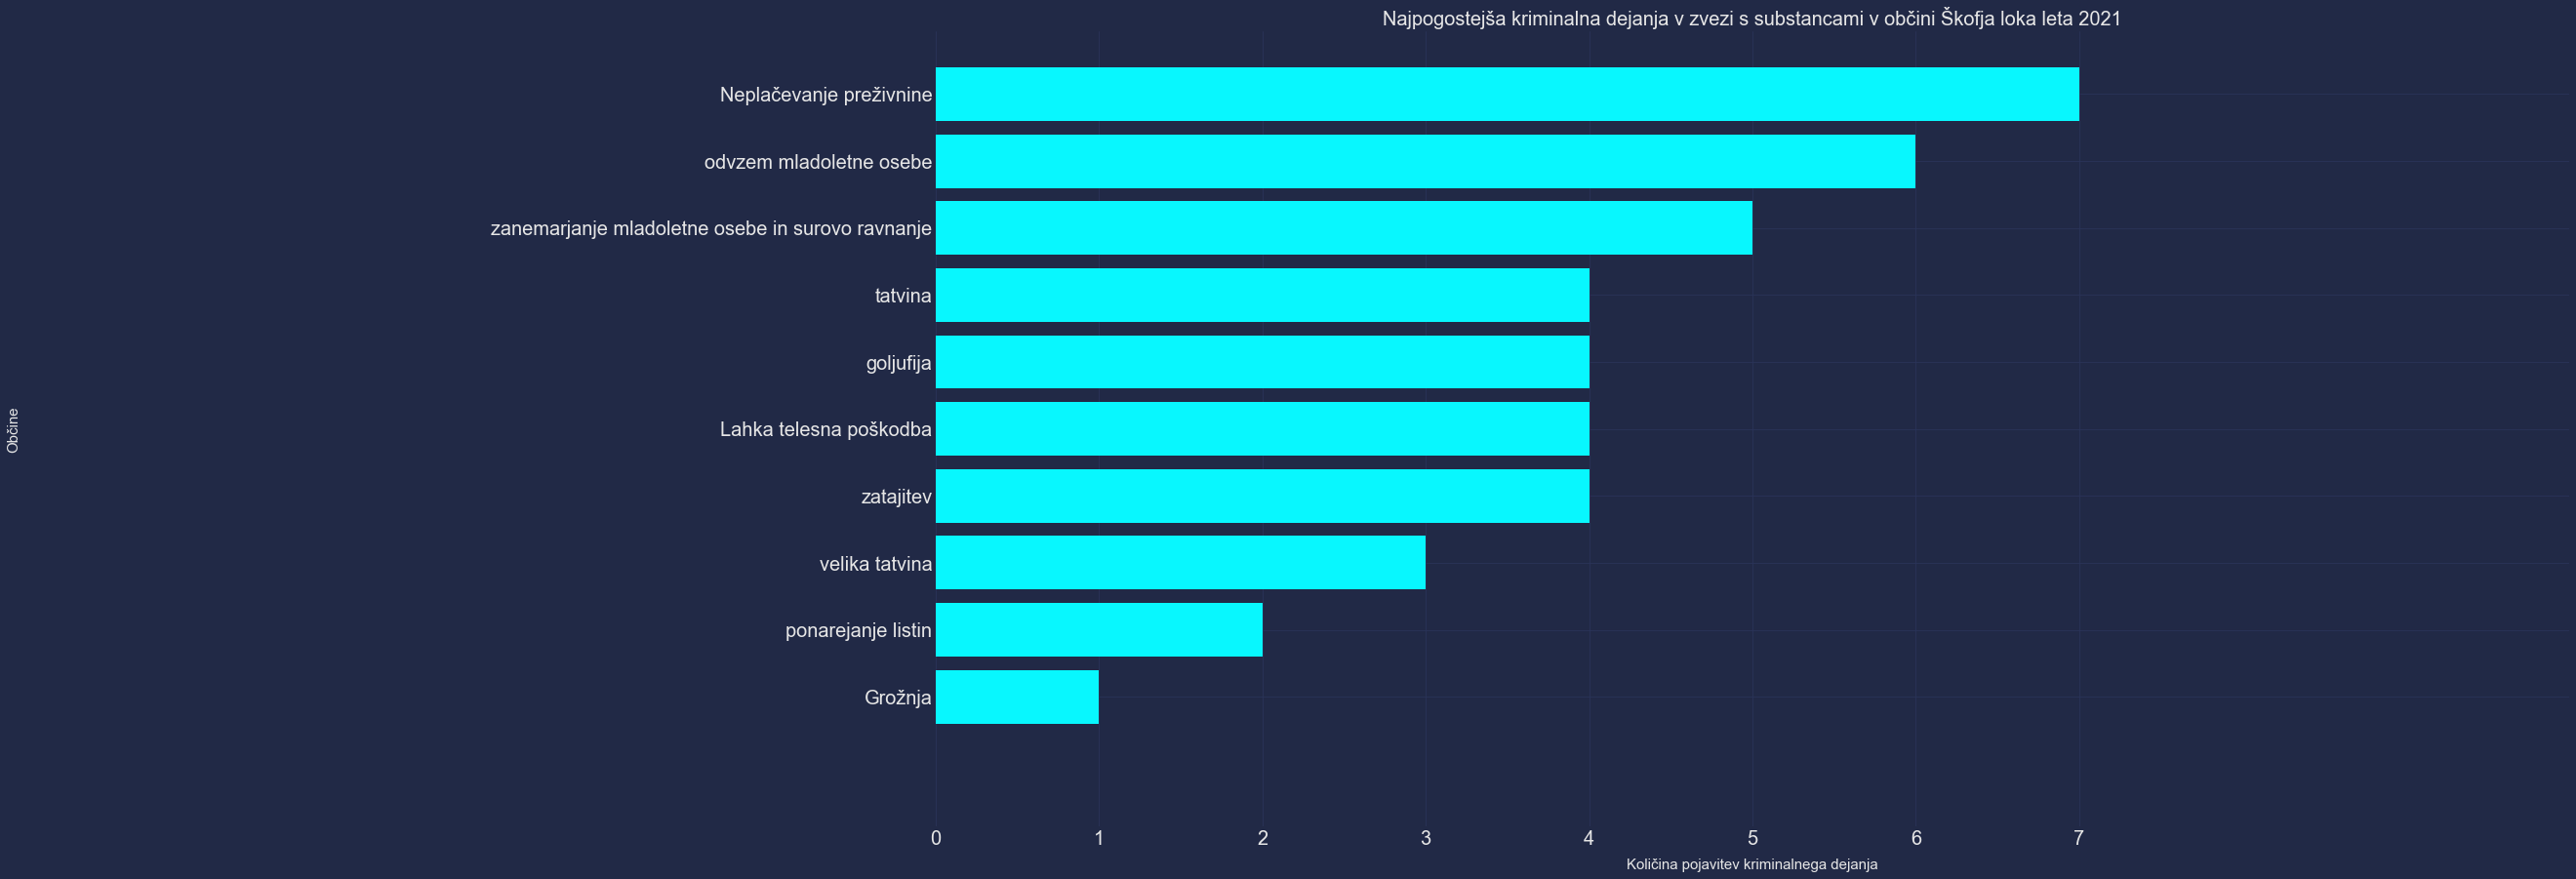

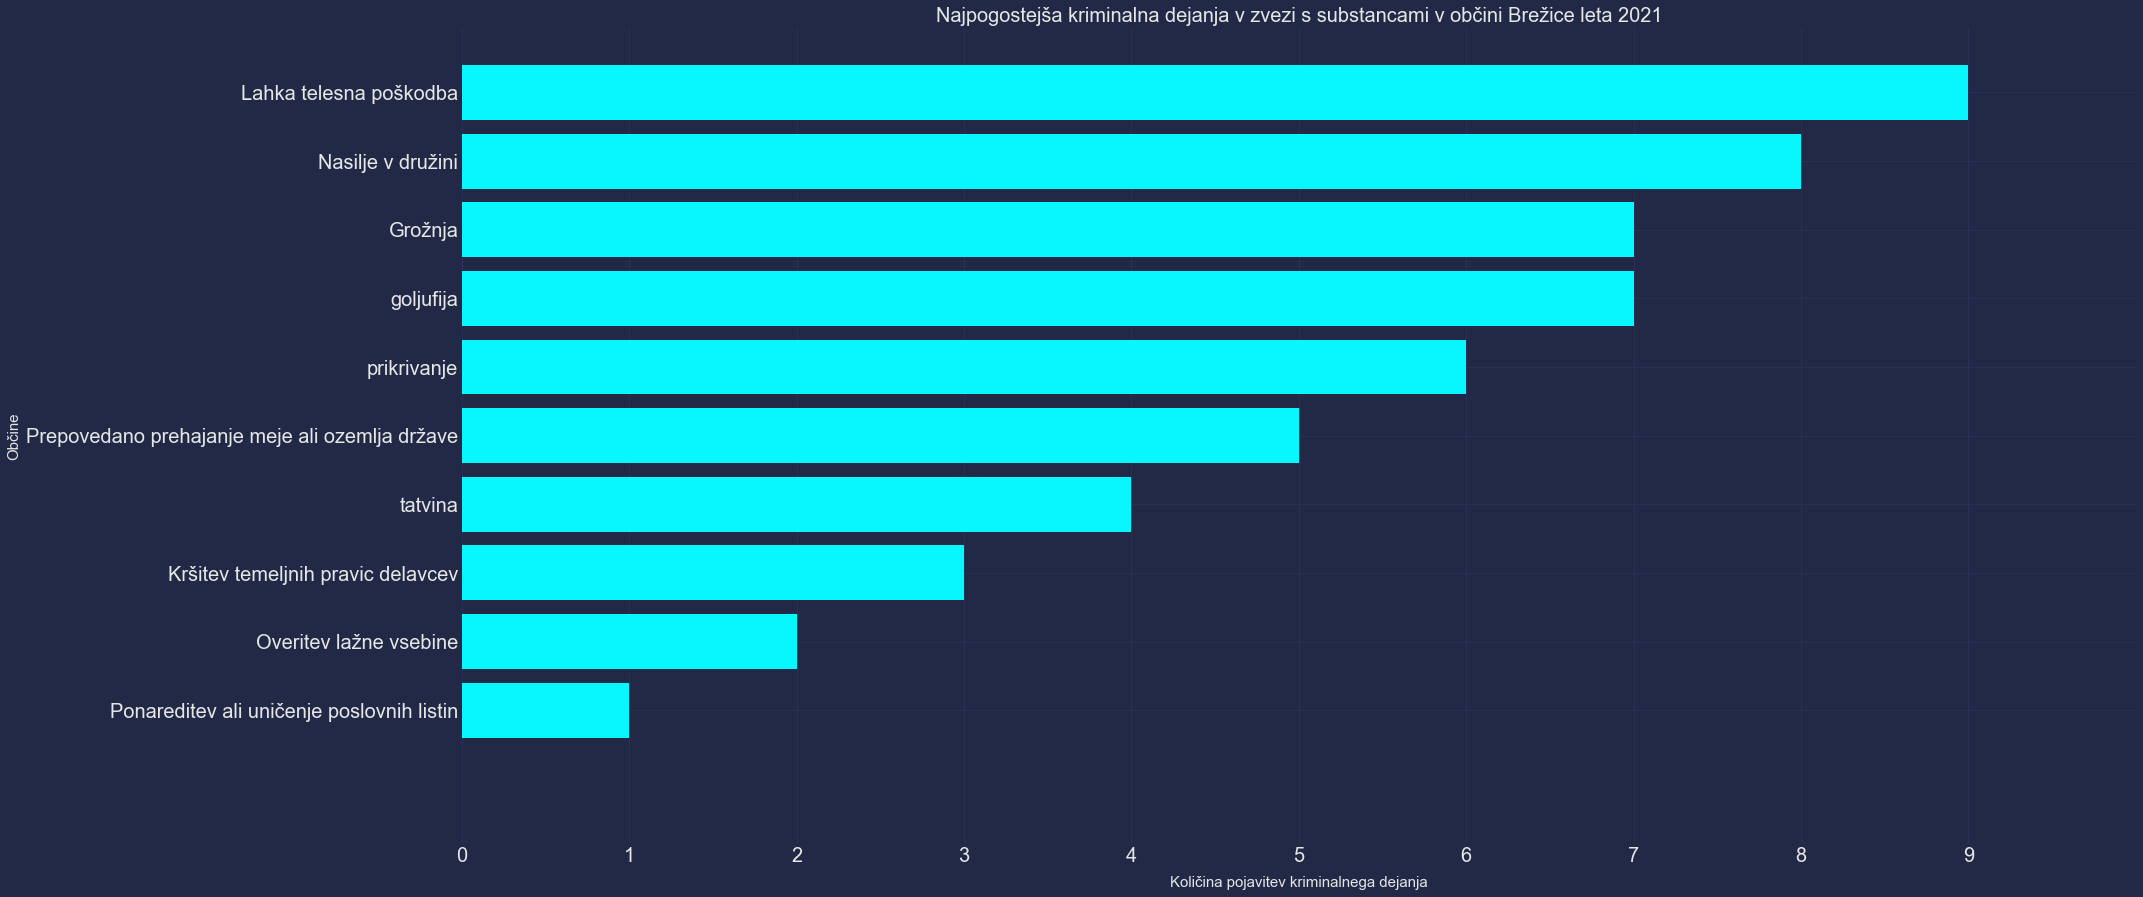

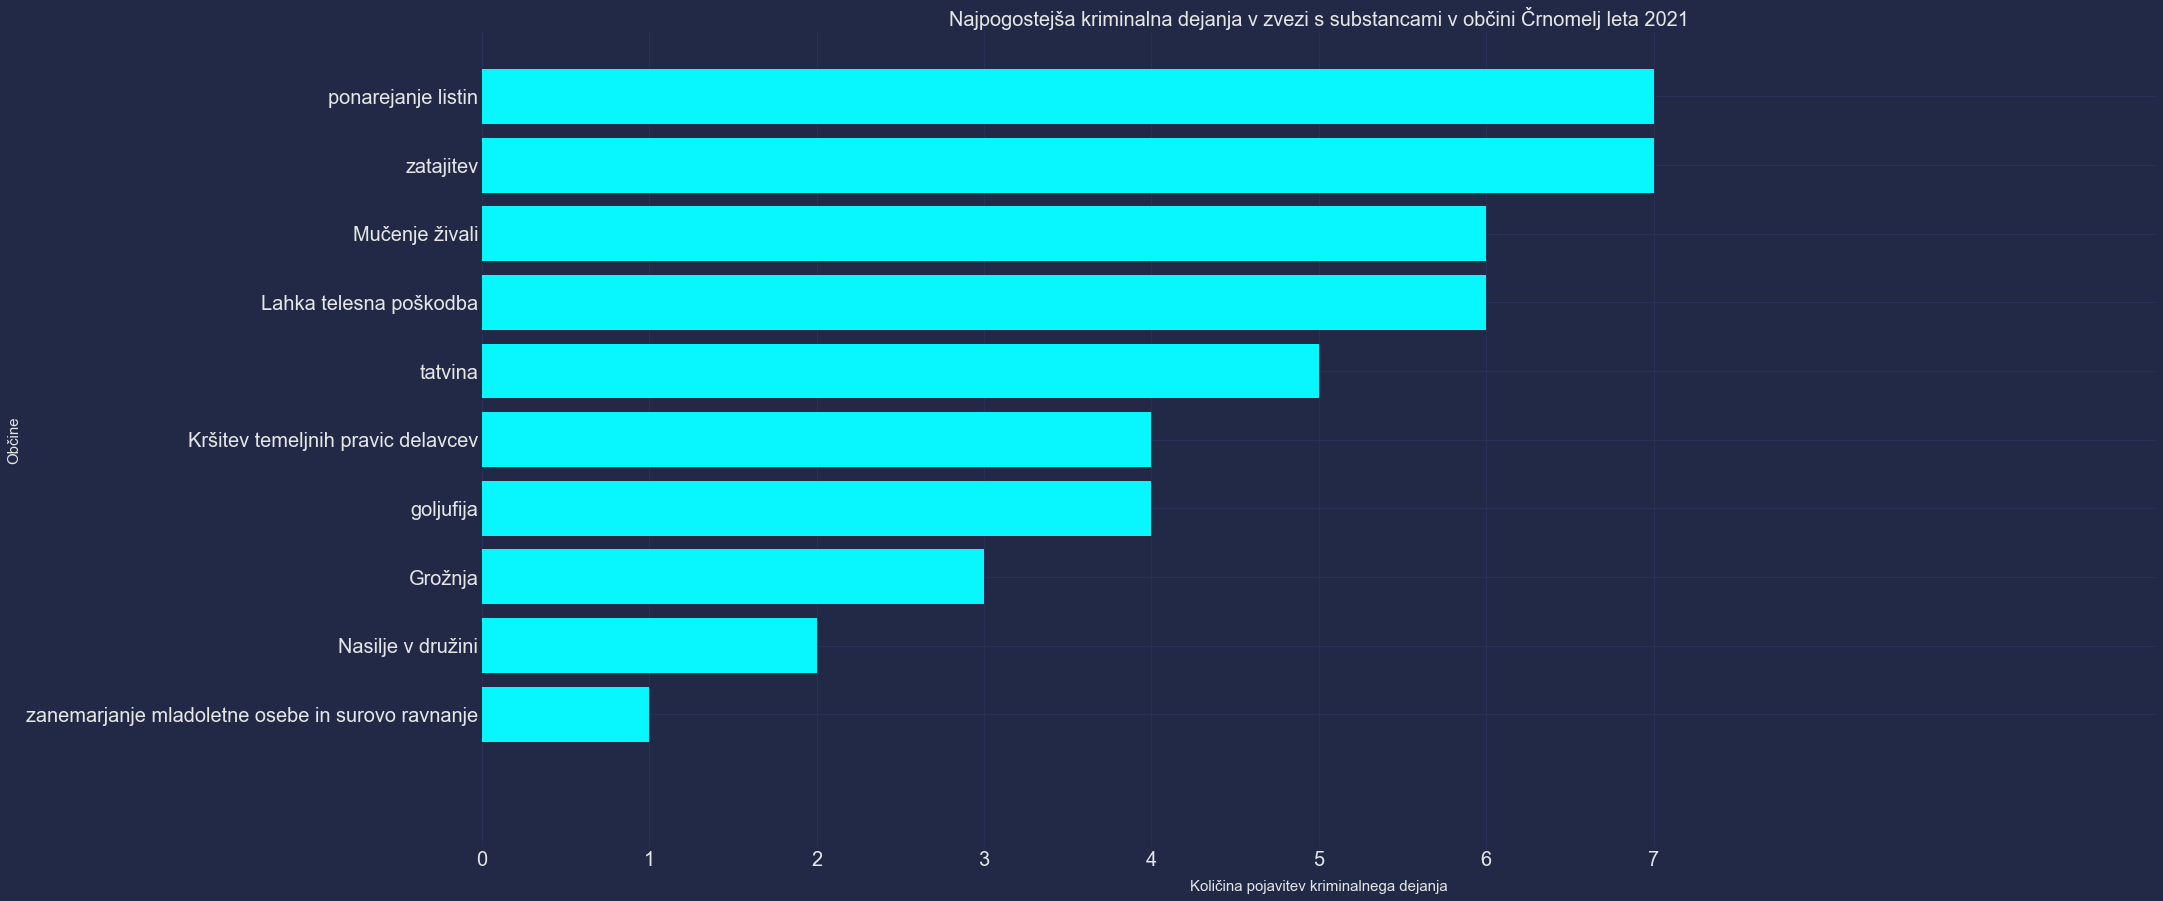

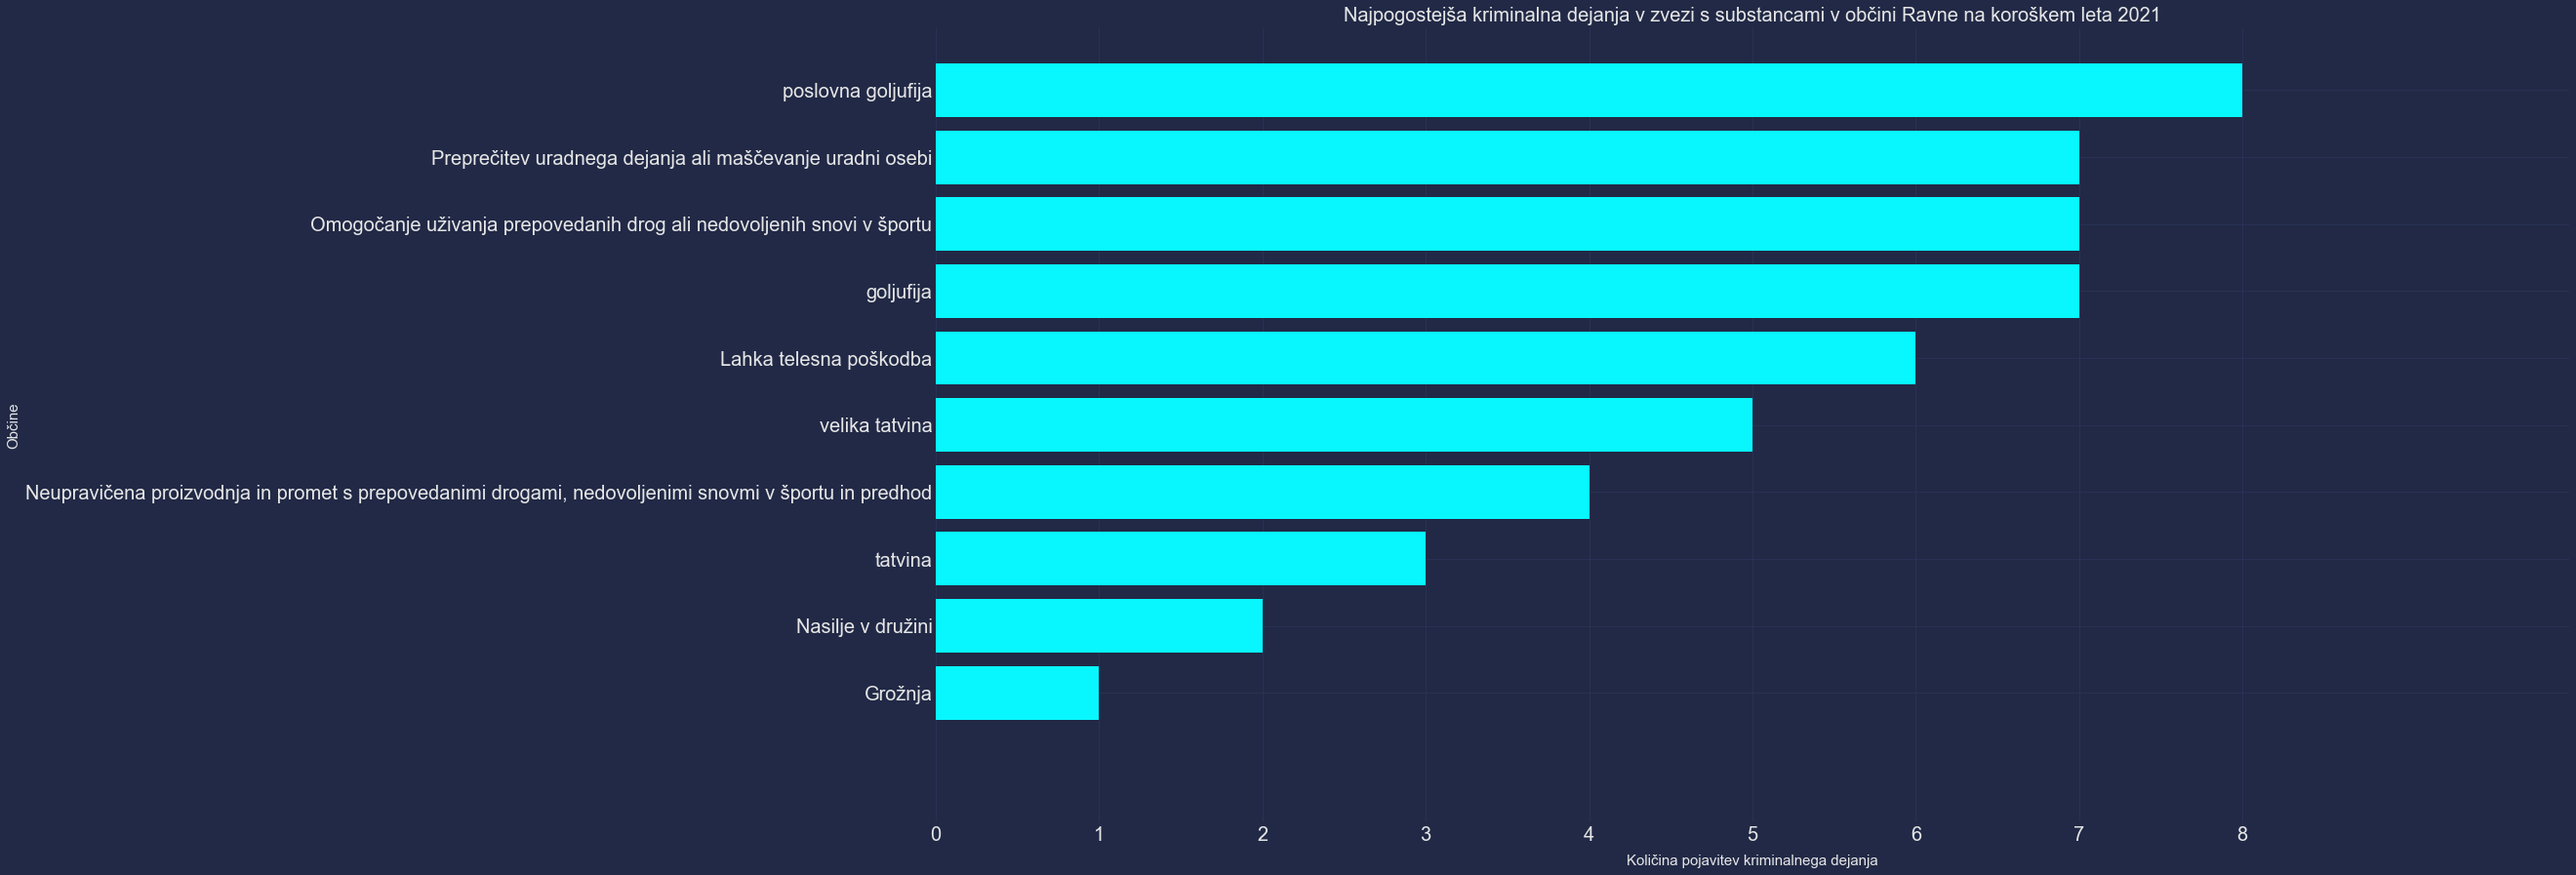

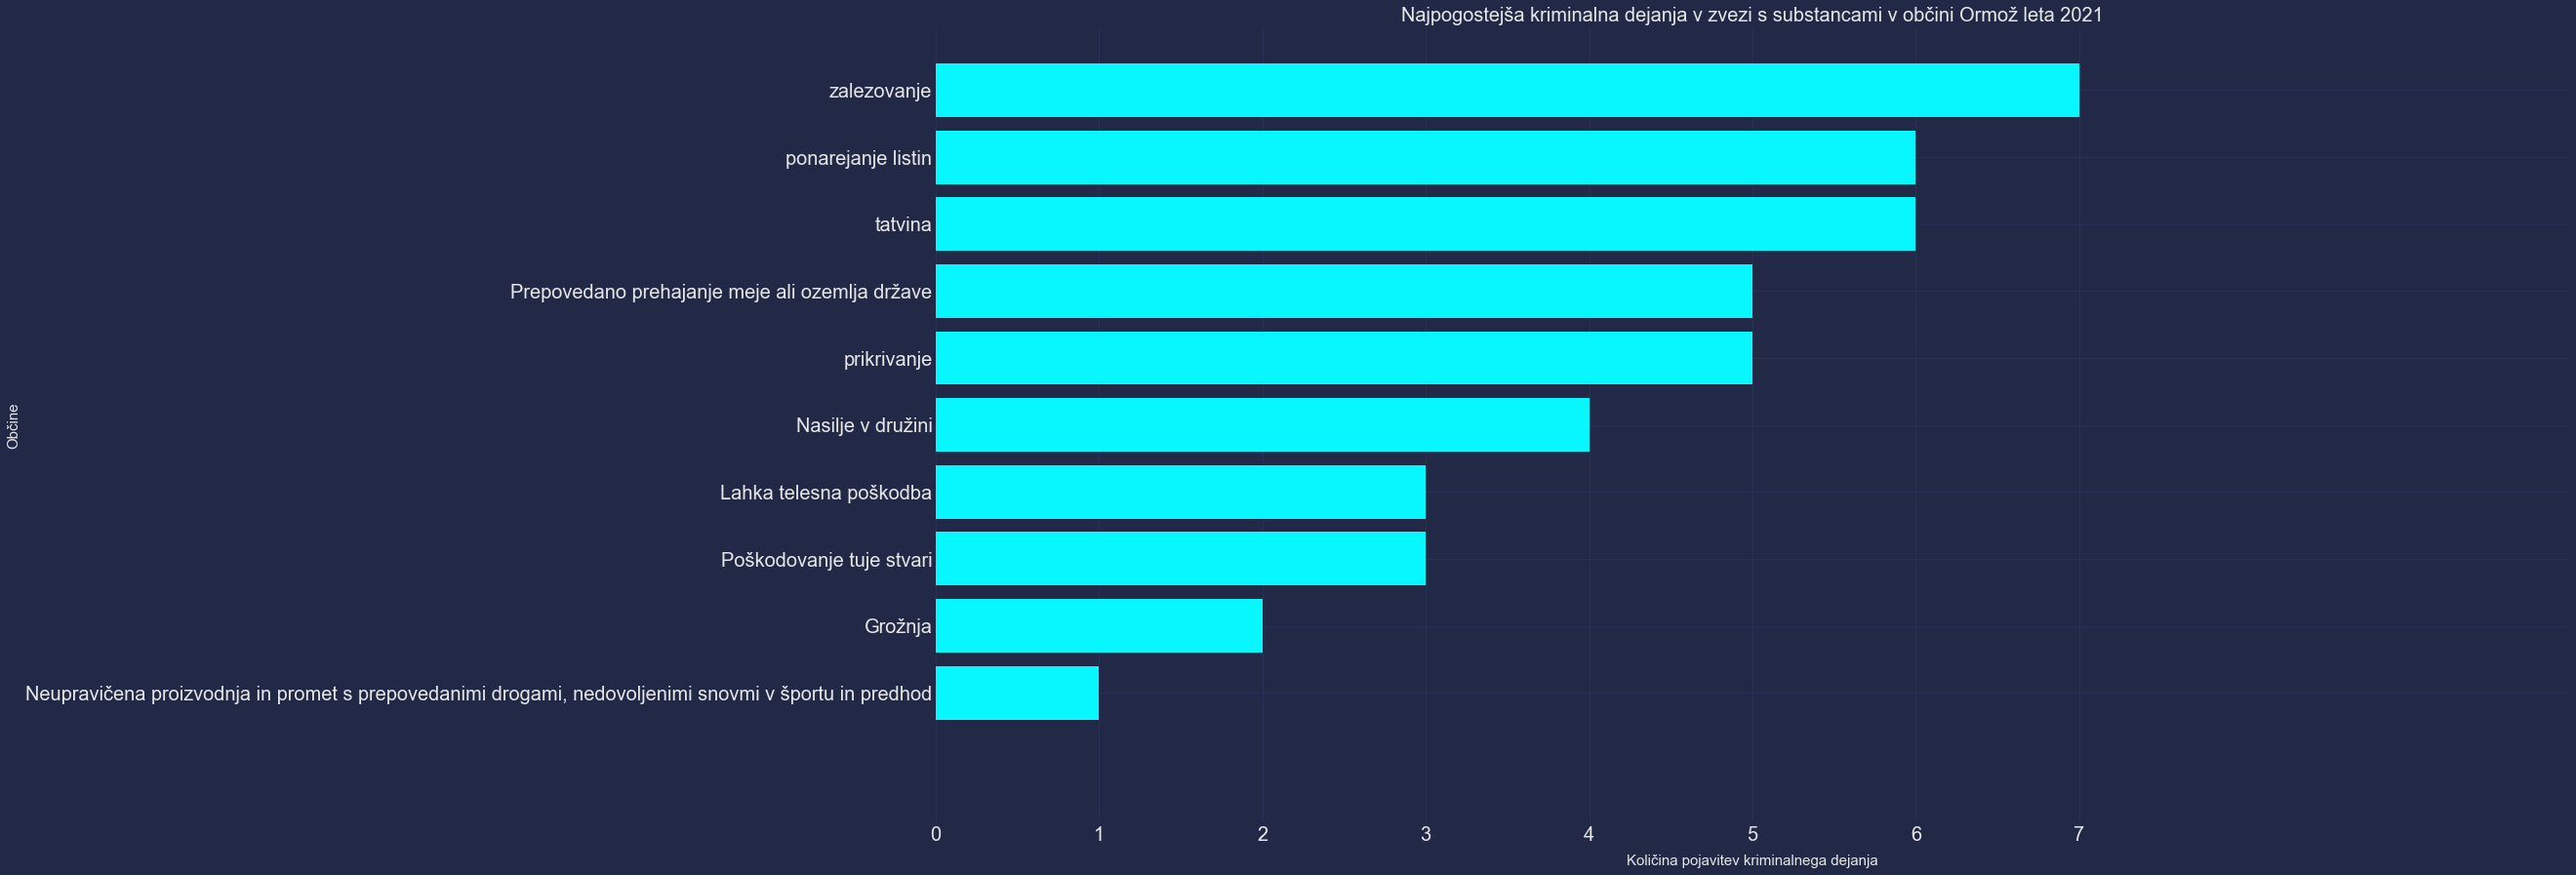

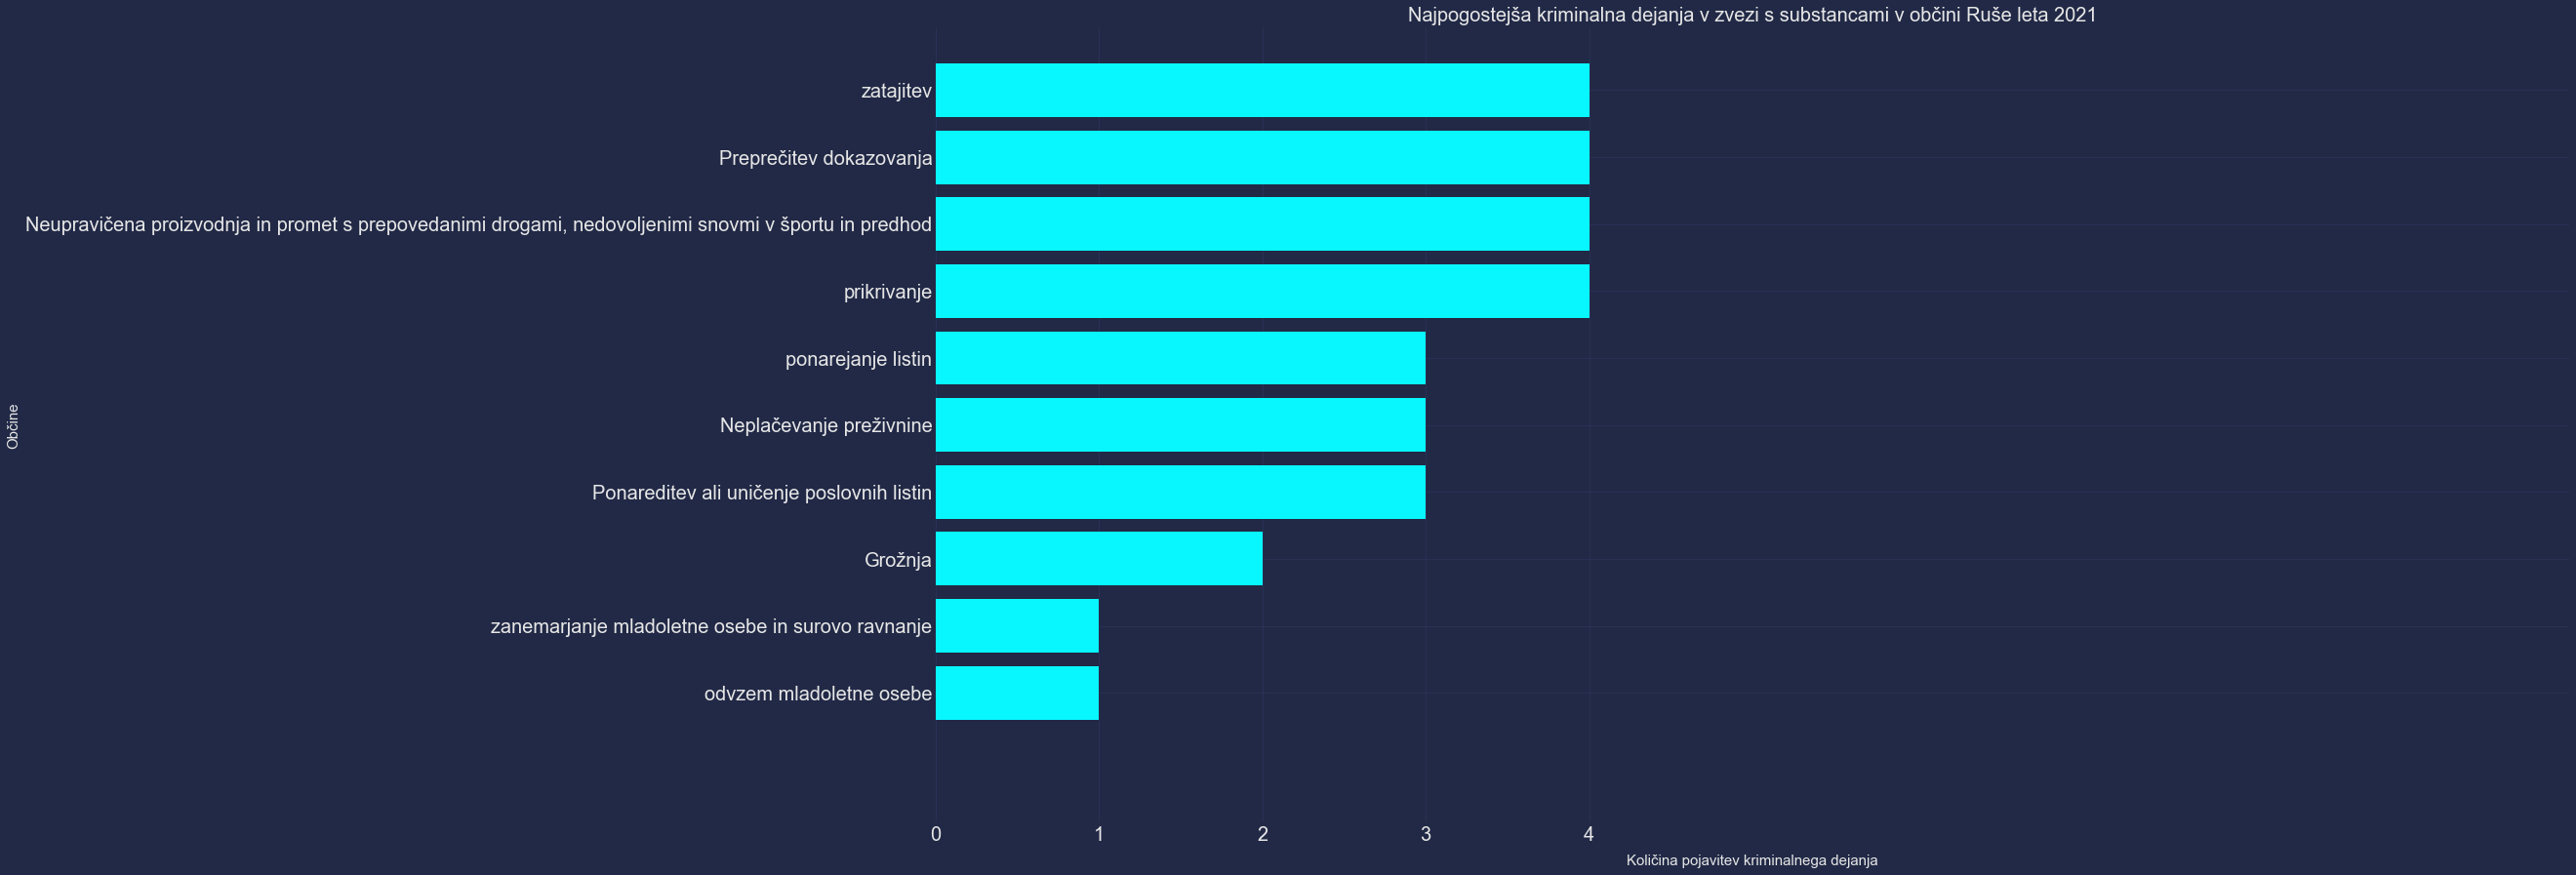

In [64]:
i = 0
yrs = [2018, 2019, 2020, 2021, 2019]
y = 0
title = ""
for year in dejanjaVObcinahPoLetihC:
    for obcina in year:
        if y == 4:
            title = "Najpogostejša kriminalna dejanja v občini"
        else:
            title = "Najpogostejša kriminalna dejanja v zvezi s substancami v občini"
        plotDejanjaVObcinah(year[obcina], obcina, yrs[y], title)
        i += 1
        if i == 5:
            break
    y += 1
